<h1>Some Concepts</h1>
<p>
We will use the <a href="http://konect.uni-koblenz.de/networks/moreno_zebra">Zebra Affiliation</a> dataset to explore some concepts linked to graph theory. <br>
    This undirected network contains interactions between 28 <b>Grévy's zebras</b> (Equus grevyi) in Kenya. A node represents a zebra and an edge between two zebras shows that there was an interaction between them during the study.
</p>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import community 


from itertools import combinations
from nxviz import ArcPlot
from nxviz import CircosPlot
from nxviz import MatrixPlot
from hiveplot import HivePlot
from matplotlib.lines import Line2D
from matplotlib import pyplot



warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
#load the network
dfzebras = pd.read_csv(
    'data/moreno_zebra/out.moreno_zebra_zebra', sep=' ', skiprows=2, header=None)
dfzebras = dfzebras[[0, 1]]
dfzebras.columns = ['zebra1', 'zebra2']

Gzebras = nx.Graph()
for row in dfzebras.iterrows():
    Gzebras.add_edge(row[1]['zebra1'], row[1]['zebra2'])

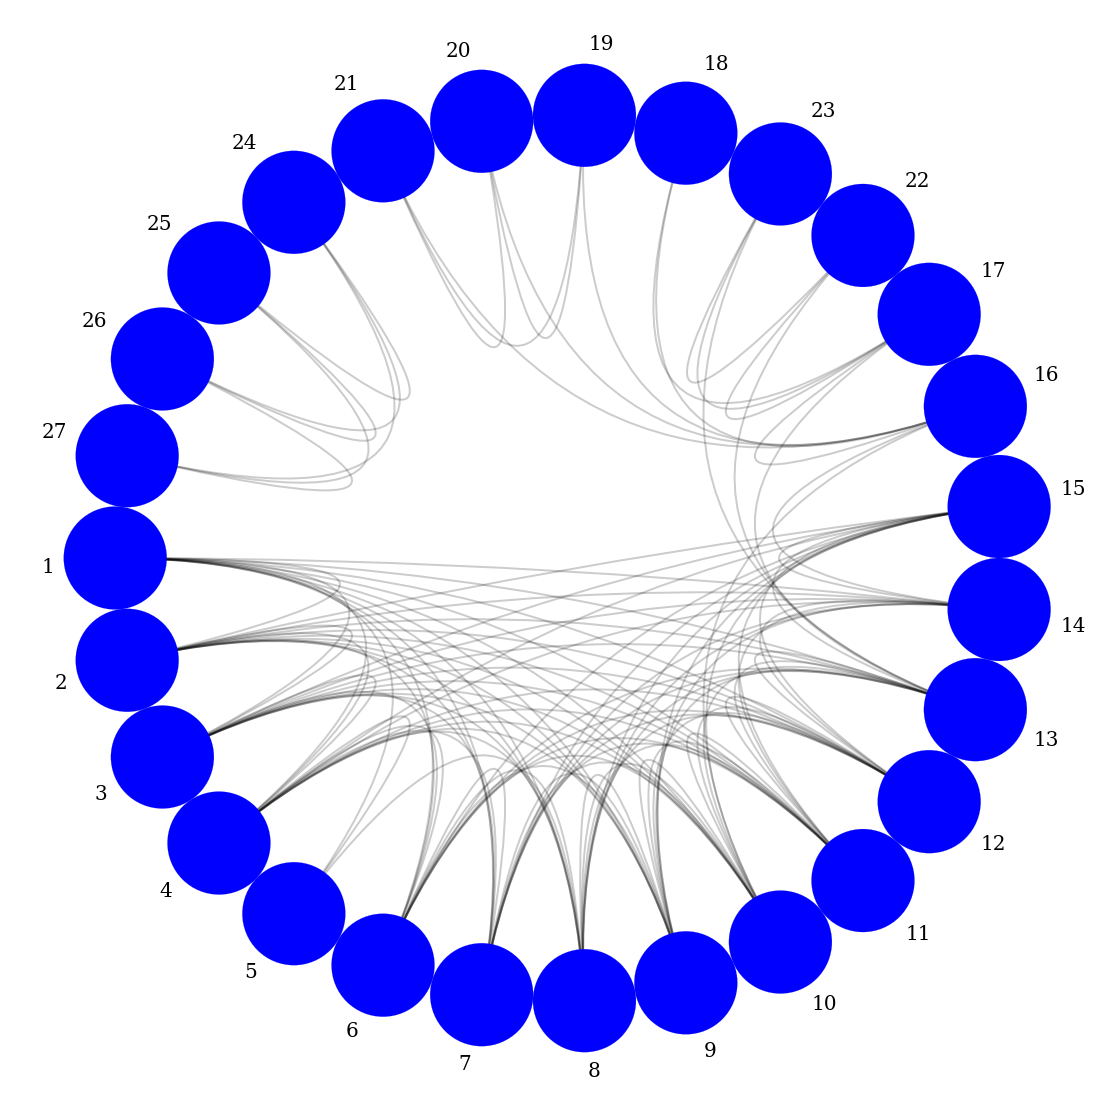

In [4]:
c = CircosPlot(Gzebras , node_labels=True , figsize = (10,10))
c.draw()

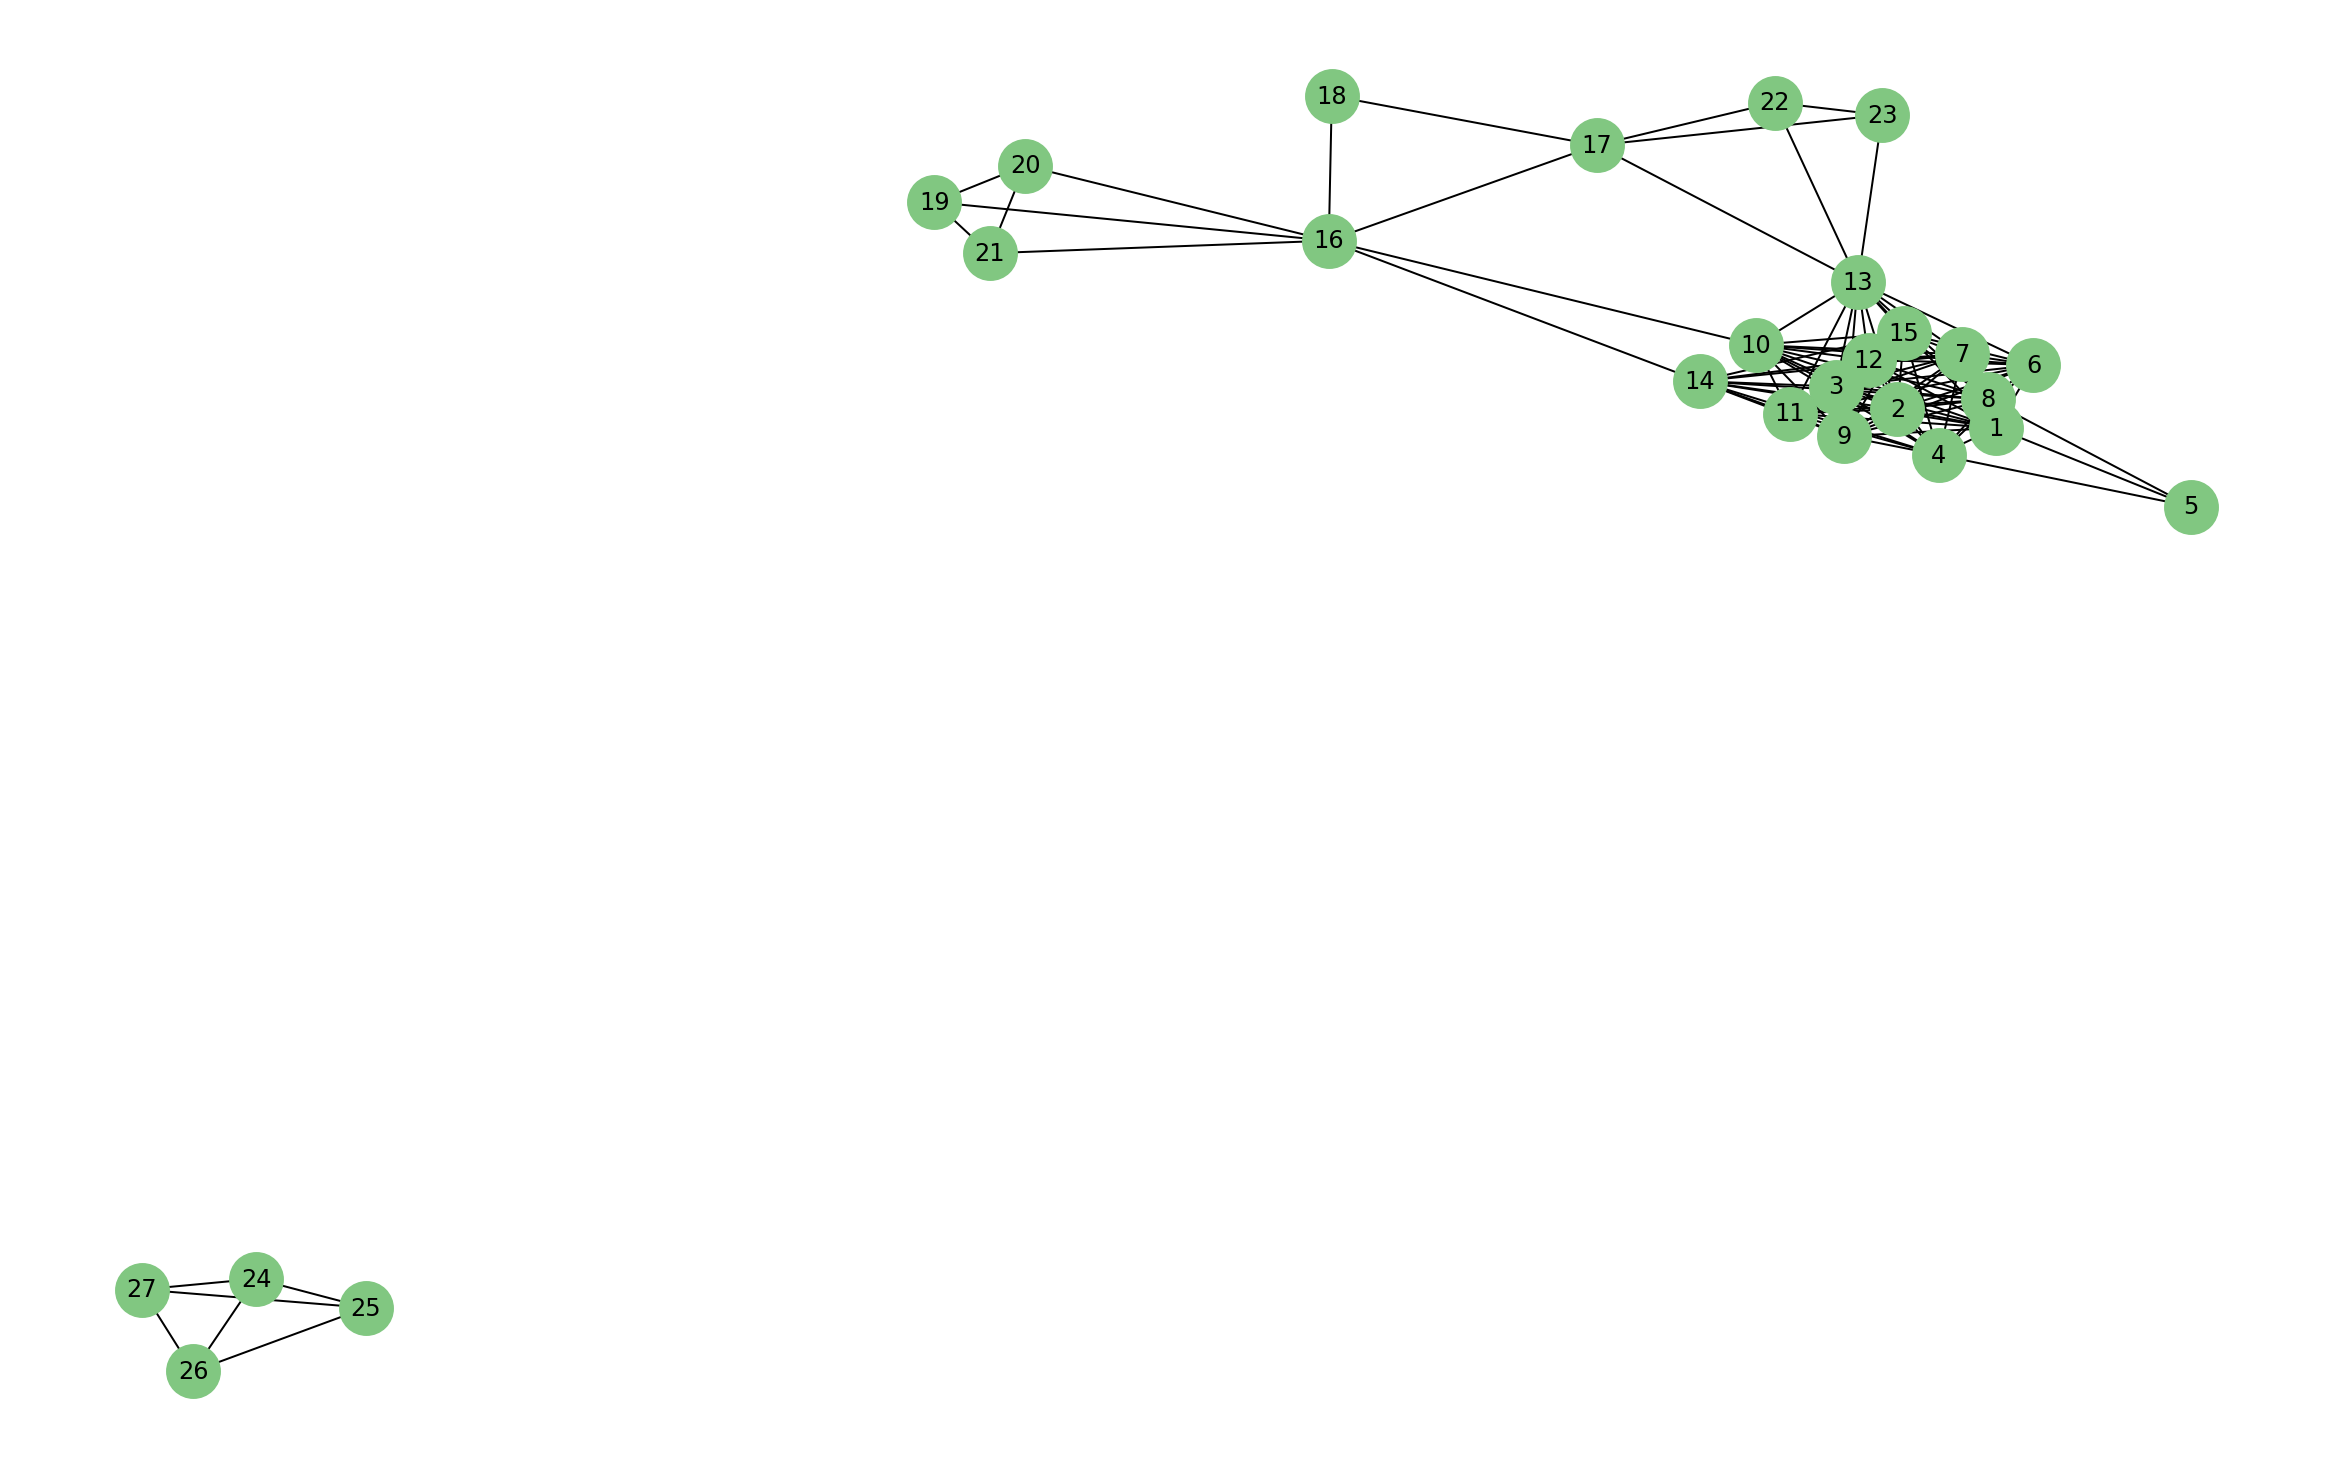

In [82]:
plt.rcParams["figure.figsize"] = (16,10)
nx.draw_spring(Gzebras , with_labels=True , node_color='#81c781' , node_size=700)

<h3>Connected Component</h3>

By looking at these graphs we can infer that the graph can be divided into two smaller subgraphs, which any two vertices are connected by paths and are connected to no additional vertices of the supergraph.

A subgraph that meets those criteria is called <b>Connected Component</b> (or simply Component).

A vertex with no incident edges is itself a component.

<code>networkx</code> implements a function to find connected component, <code>connected_components()</code>

In [5]:
nx.connected_components(Gzebras)

<generator object connected_components at 0x0000017D06EB6AC8>

In [6]:
# in order to use them better, it's useful to create a list of connected component subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

ccsubgraphszebras = list(connected_component_subgraphs(Gzebras))
ccsubgraphszebras

<p>
As we can see we can find two connected components in the graph. Let's highlight them:
</p>

In [7]:
# assign an attribute "subgraph" to the nodes
for i, g in enumerate(ccsubgraphszebras):
    for n in g.nodes():
        Gzebras.nodes[n]['subgraph'] = i

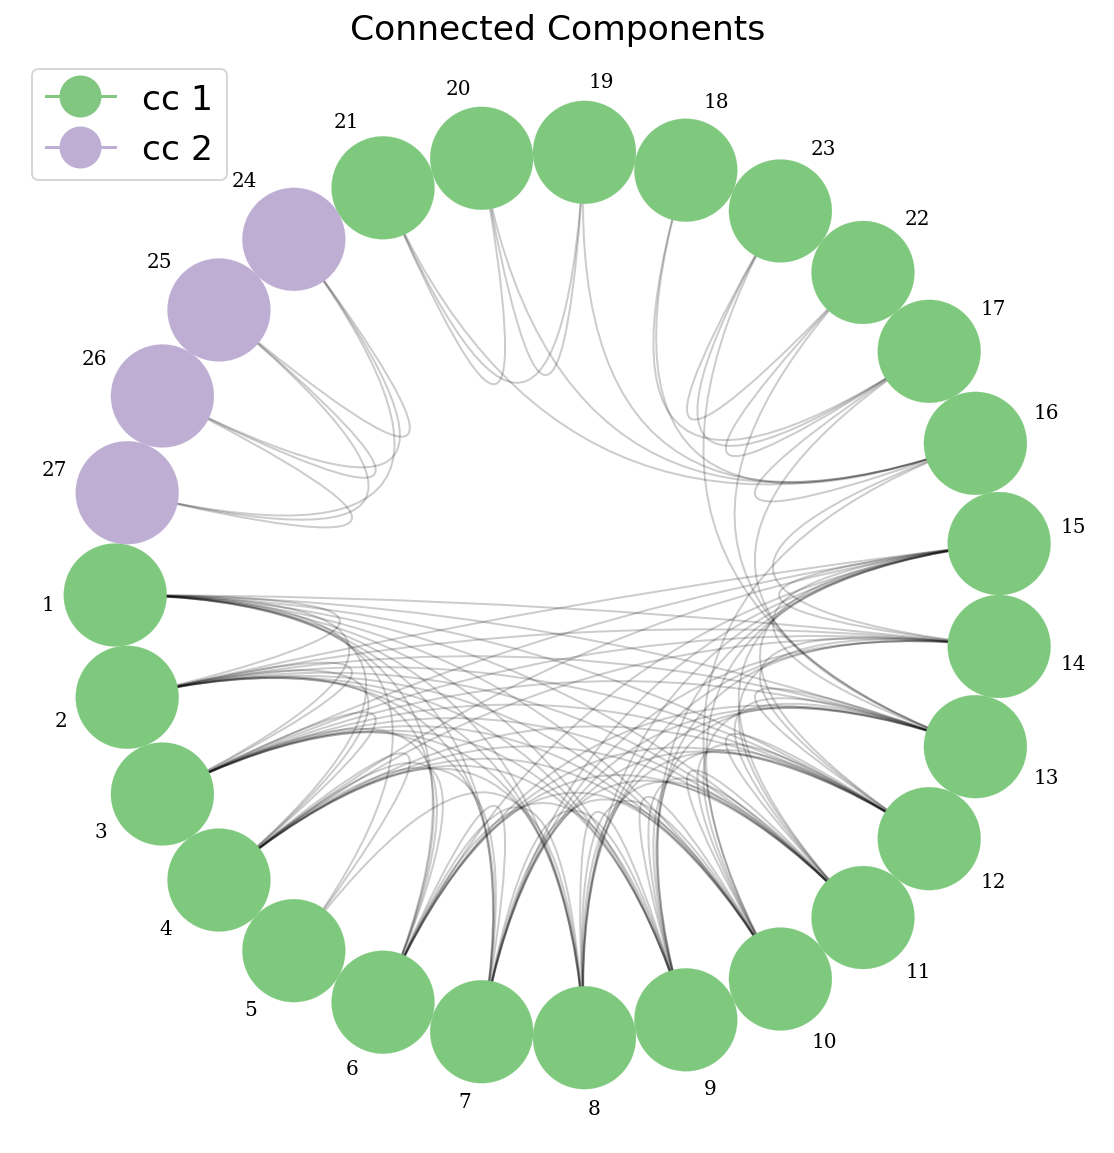

In [84]:
# we can use the attribute to highlight the connected component in a circos plot
c = CircosPlot(Gzebras, node_color='subgraph', node_order='subgraph', node_labels=True , figsize = (10,10))
c.draw()

legend_elements = [Line2D([0], [0], marker='o', color='#81c781', label='cc 1', markerfacecolor='#81c781', markersize=20),
                   Line2D([0], [0], marker='o', color='#beaed4', label='cc 2', markerfacecolor='#beaed4', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Connected Components" , fontsize='xx-large')
plt.show()

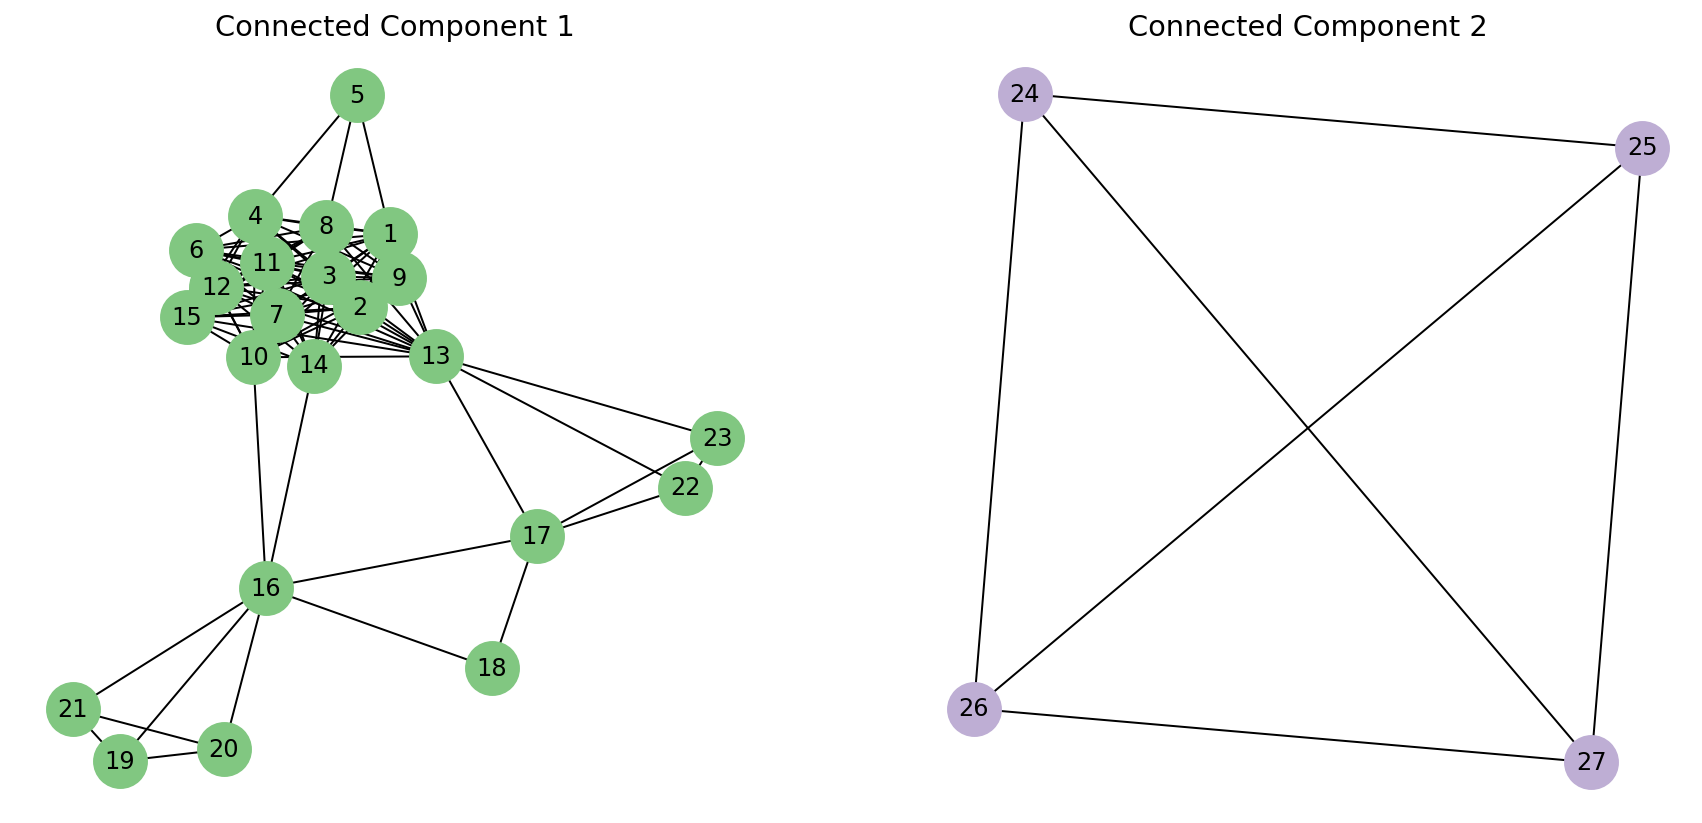

In [9]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
nx.draw(ccsubgraphszebras[0] , with_labels=True , node_color="#81c781" , node_size=700)
plt.title("Connected Component 1" , fontsize='x-large')


plt.subplot(1, 2, 2)
nx.draw(ccsubgraphszebras[1] , with_labels=True , node_color='#beaed4' , node_size=700)
plt.title("Connected Component 2" , fontsize='x-large')

plt.show()

<h3>Path</h3>

In a graph, a path is a sequence of edges which joins a sequence of distinct vertices.

In <code>networkx</code> we can check the existence of a path with <code>has_path(graph, nodeA, nodeB)</code>

We can check that nodes belonging to a connected component subgraph are connected by a path and that there is no path between nodes belonging to different connected components.

In [10]:
def has_all_paths(graphA , graphB):
    for a in graphA:
        for b in graphB:
            assert nx.has_path(Gzebras , a , b) , "Error: no path between nodes " + str (a) + " and " + str (b)
            
def has_no_paths(graphA , graphB):
    for a in graphA:
        for b in graphB:
            assert not nx.has_path(Gzebras , a , b) , "Error: no path between nodes " + str (a) + " and " + str (b)         

In [11]:
has_all_paths(ccsubgraphszebras[0] , ccsubgraphszebras[0])

In [12]:
has_all_paths(ccsubgraphszebras[1] , ccsubgraphszebras[1])

In [13]:
has_no_paths(ccsubgraphszebras[1] , ccsubgraphszebras[0])

<p>
    <code>networkx</code> also offers methods that implement <a href="https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html"> algorithms</a> to work with paths, especially regarding the analysis of shortest paths.
</p>

<h3>Neighbourhood </h3>

Two nodes are called <b>adjacent</b> if they are connected by an edge.
The <b>neighbourhood</b> of a node n is the graph made of the nodes adjacent to n and the edges connecting them.

In <code>networkx</code> we can use <code>graph.neighbors(node)</code> to find the nodes adjacent to the given node.

In [14]:
# neighbors returns a dict_keyiterator, we'll cast it to list to make it printable
list(Gzebras.neighbors(16))

[10, 14, 17, 18, 19, 20, 21]

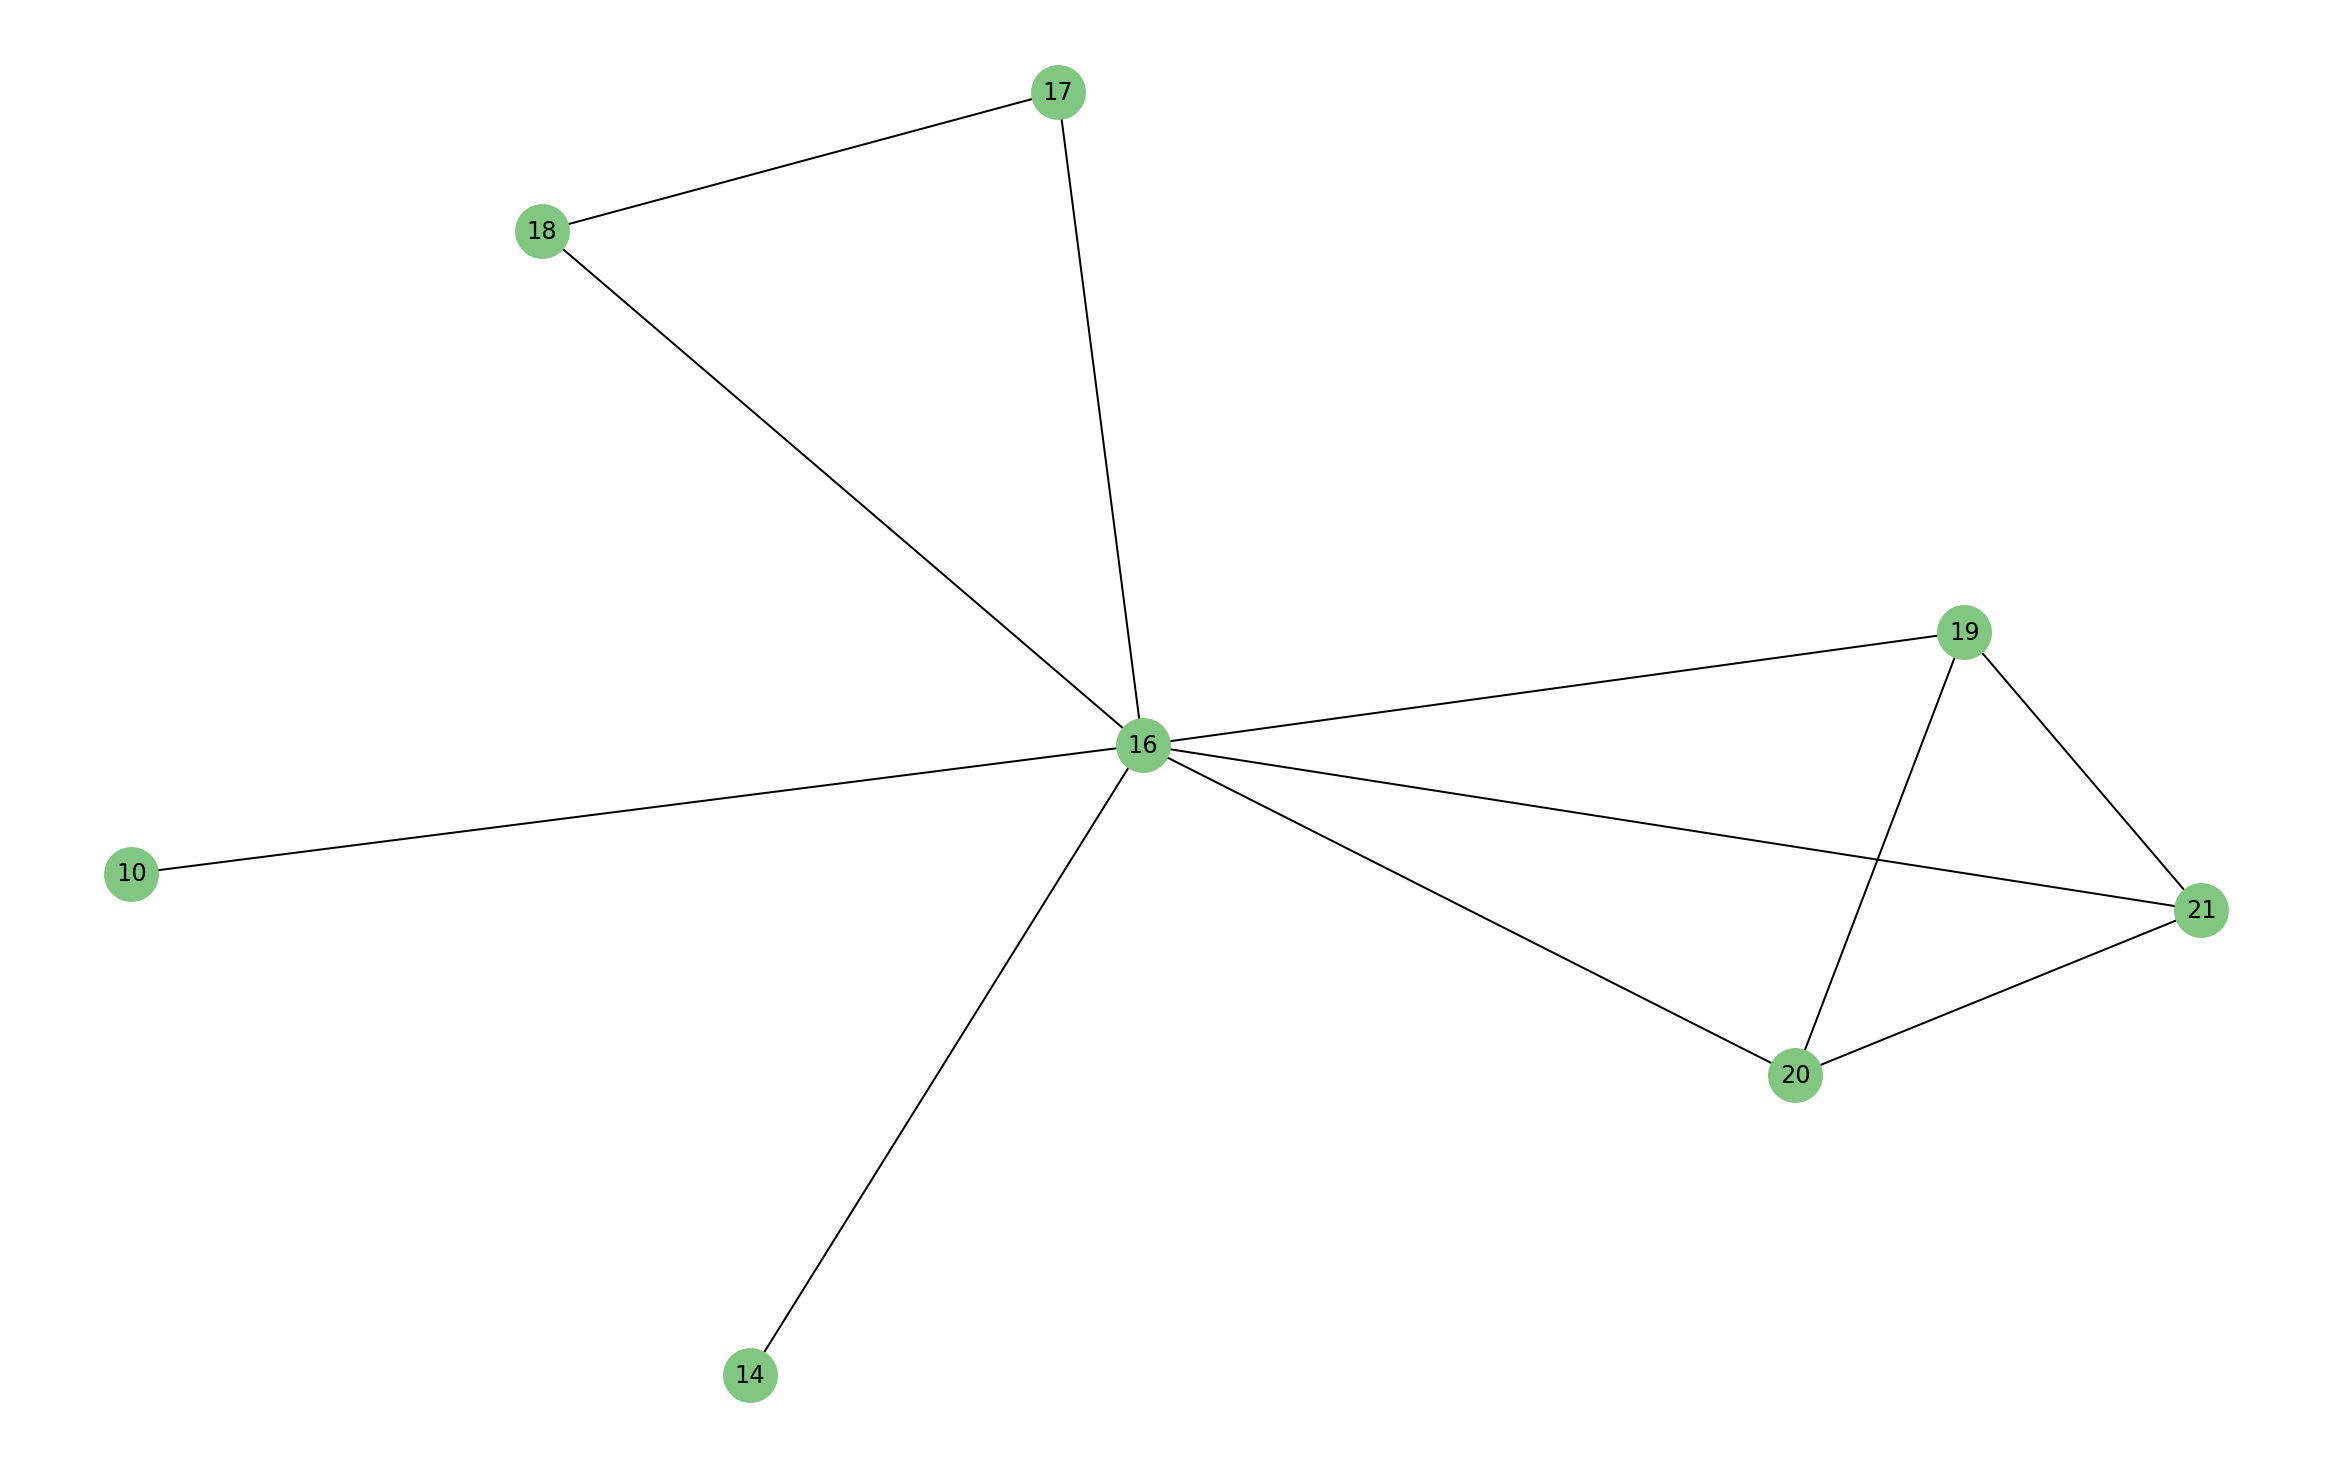

In [15]:
# let's print the subgraph containing the node 16 and his neighbourhood
neighbors16 =  list(Gzebras.neighbors(16))
neighbors16.append(16) # add node 16 to his neighbours
nx.draw(Gzebras.subgraph(neighbors16), with_labels=True , node_color="#81c781" , node_size=700)

<h3>Clique</h3>

In the graph theory, a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent.
In a social network involving people, cliques are groups in which everybody knows everybody.


<code>networkx</code> has a function <code>find_cliques(graph)</code> that find all the maximal cliques (i.e. largest complete subgraph containing a given node) in a graph.

In [16]:
list(nx.find_cliques(Gzebras))

[[4, 1, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 1, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 1, 2, 3, 9, 11, 12, 14, 8],
 [4, 1, 2, 3, 9, 11, 12, 14, 7],
 [4, 1, 5, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 15, 2, 3, 9, 11, 12, 14, 8],
 [4, 15, 2, 3, 9, 11, 12, 14, 7],
 [13, 17, 22, 23],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 15],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 15],
 [14, 16],
 [16, 19, 20, 21],
 [16, 17, 18],
 [16, 10],
 [24, 25, 26, 27]]

We can also use <code>cliques_containing_node(graph, nodes=node)</code> to lists the cliques that any given node is involved in.
<p>
We have already printed the neighbourhood of node 16, to finish we can print the maximal cliques that he is involved in.
</p>

In [20]:
nx.cliques_containing_node(Gzebras, nodes=16)

[[14, 16], [16, 19, 20, 21], [16, 17, 18], [16, 10]]

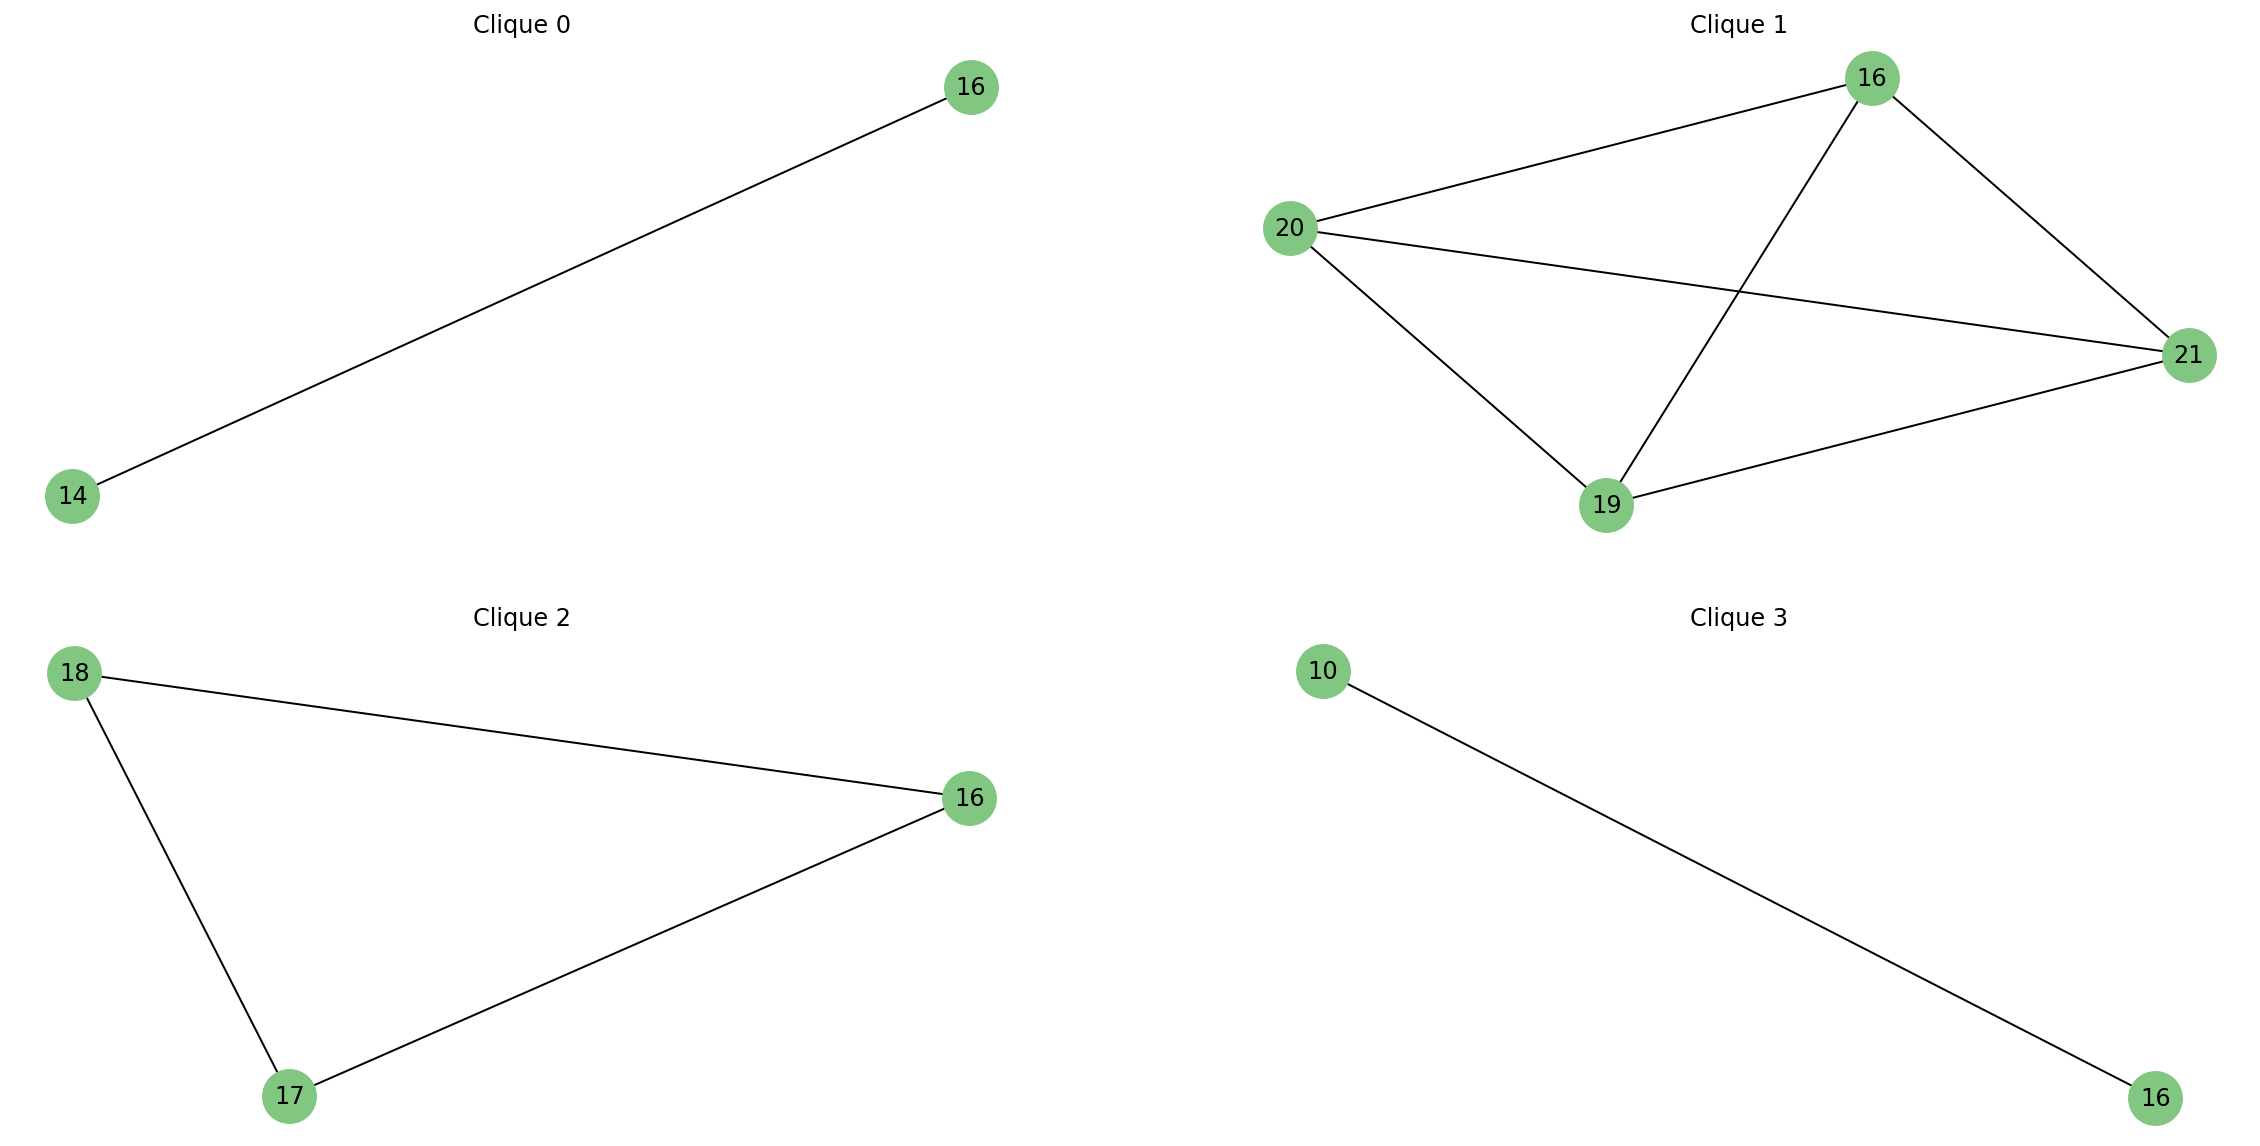

In [21]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[0]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 0')

plt.subplot(2, 2, 2)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[1]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 1')

plt.subplot(2, 2, 3)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[2]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 2')

plt.subplot(2, 2, 4)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[3]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 3')

plt.show()

We can use <code>number_of_cliques(graph, nodes=node)</code> in orer to find the number of cliques a node is involved in.

In [18]:
nx.number_of_cliques(Gzebras)

{1: 7,
 2: 12,
 3: 12,
 4: 9,
 5: 1,
 6: 8,
 7: 6,
 8: 7,
 9: 12,
 10: 9,
 11: 12,
 12: 12,
 13: 5,
 14: 5,
 15: 6,
 16: 4,
 17: 2,
 22: 1,
 23: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1}

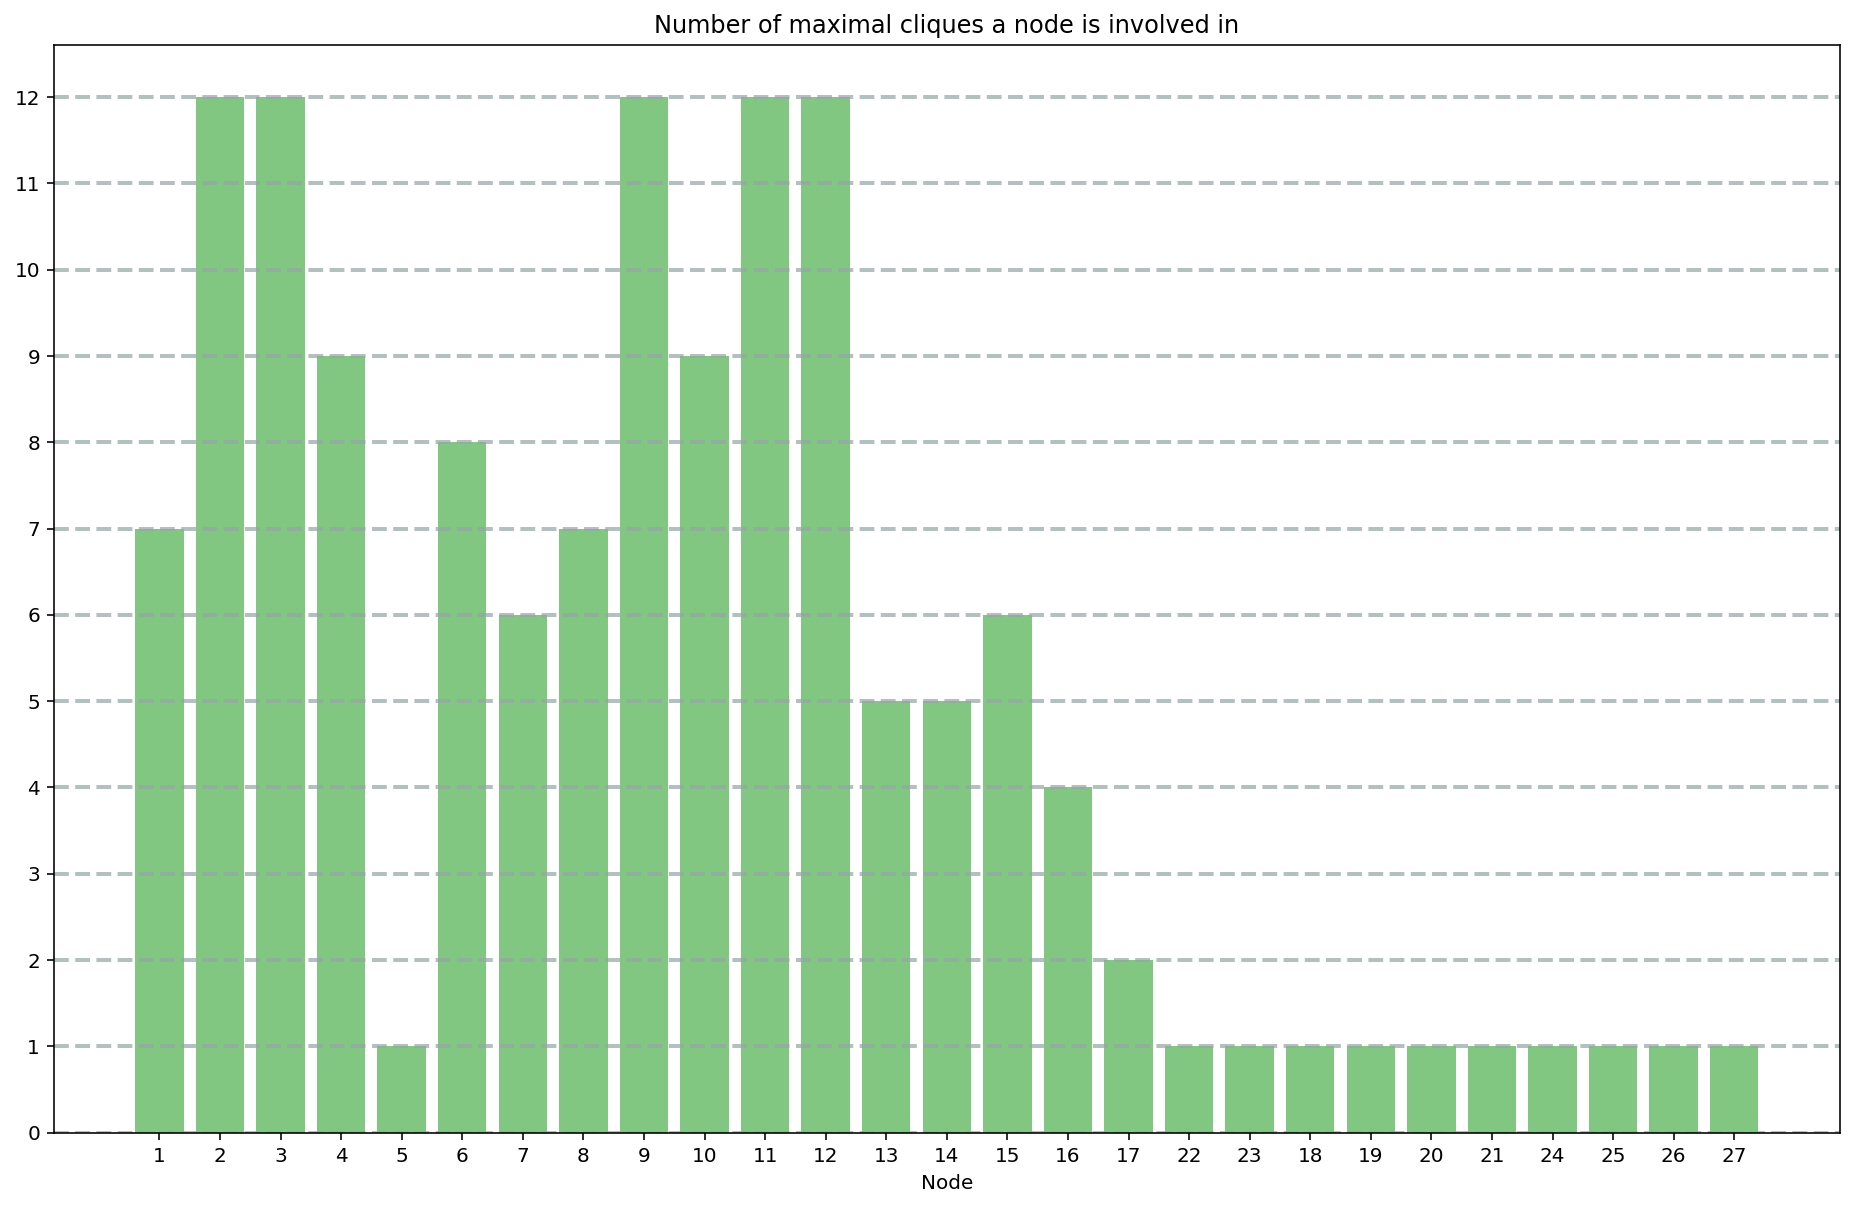

In [19]:
data = nx.number_of_cliques(Gzebras).values()
labels = Gzebras.nodes()
plt.xticks(range(len(data)), labels)
plt.yticks(np.arange(0, 13, step=1))
plt.xlabel('Node')
plt.title('Number of maximal cliques a node is involved in')
plt.bar(range(len(data)), data , color='#81c781') 
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

<p>
As we can see more than half of the zebra individuals are involved in many cliques, but some are involved in just one.
Hence, we can make the hypothesis that Grevy's zebra are quite sociable animals, but some of them might be more selective in their association choices.
</p>

<br><a href="http://konect.uni-koblenz.de/networks/ucidata-zachary"><h1>A case study: Zachary's Karate Club</h1></a>

Zachary's Karate Club is a well known social network, representing the interactions between members of a university karate club. It was described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.
Each node represents a member of the club, and each edge represents a tie (based on interactions they made outside of the club) between two members of the club.

In [22]:
zkcdf = pd.read_csv('data/ucidata-zachary/out.ucidata-zachary', skiprows=2, header=None, sep=' ')
zkcdf.columns = ['member1', 'member2']
ZKCG = nx.from_pandas_edgelist(zkcdf, source='member1', target='member2')
print(nx.info(ZKCG))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


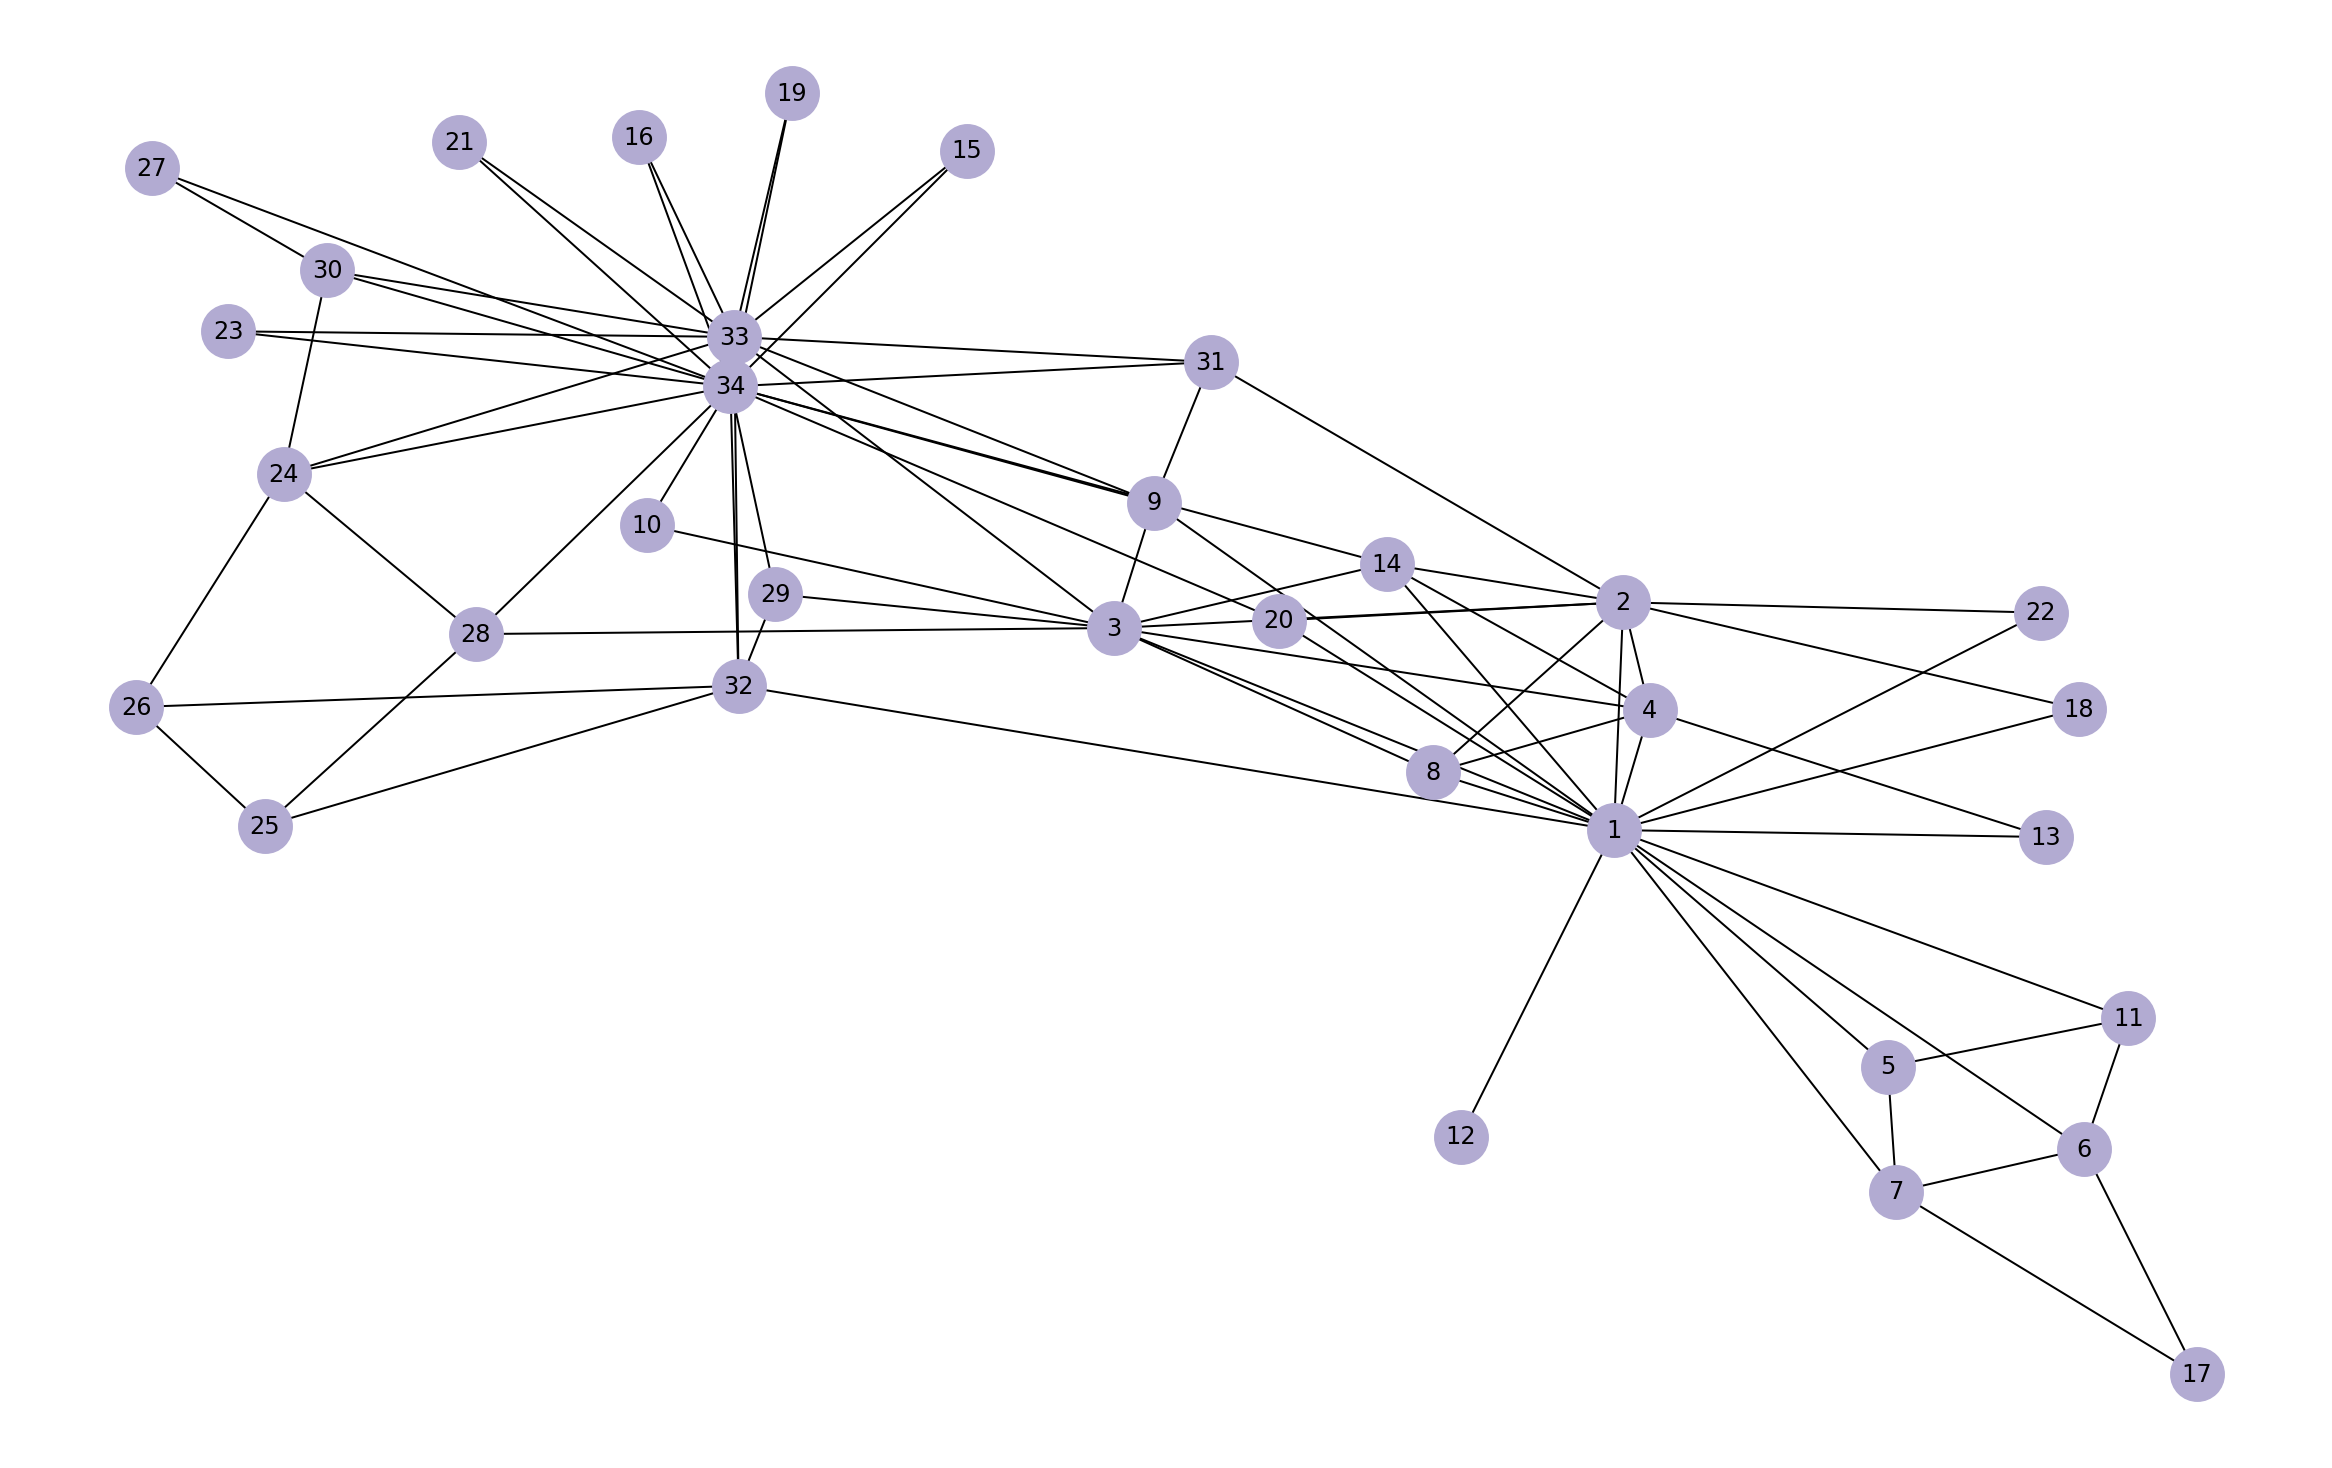

In [73]:
plt.rcParams["figure.figsize"] = (16,10)
nx.draw_spring(ZKCG , with_labels=True , node_color='#b2abd2' , node_size=700)

Looking at this plot the suspicion arises that there might be some communities in the network.
That is made even clearer by the use of an <code>ArcPlot</code>

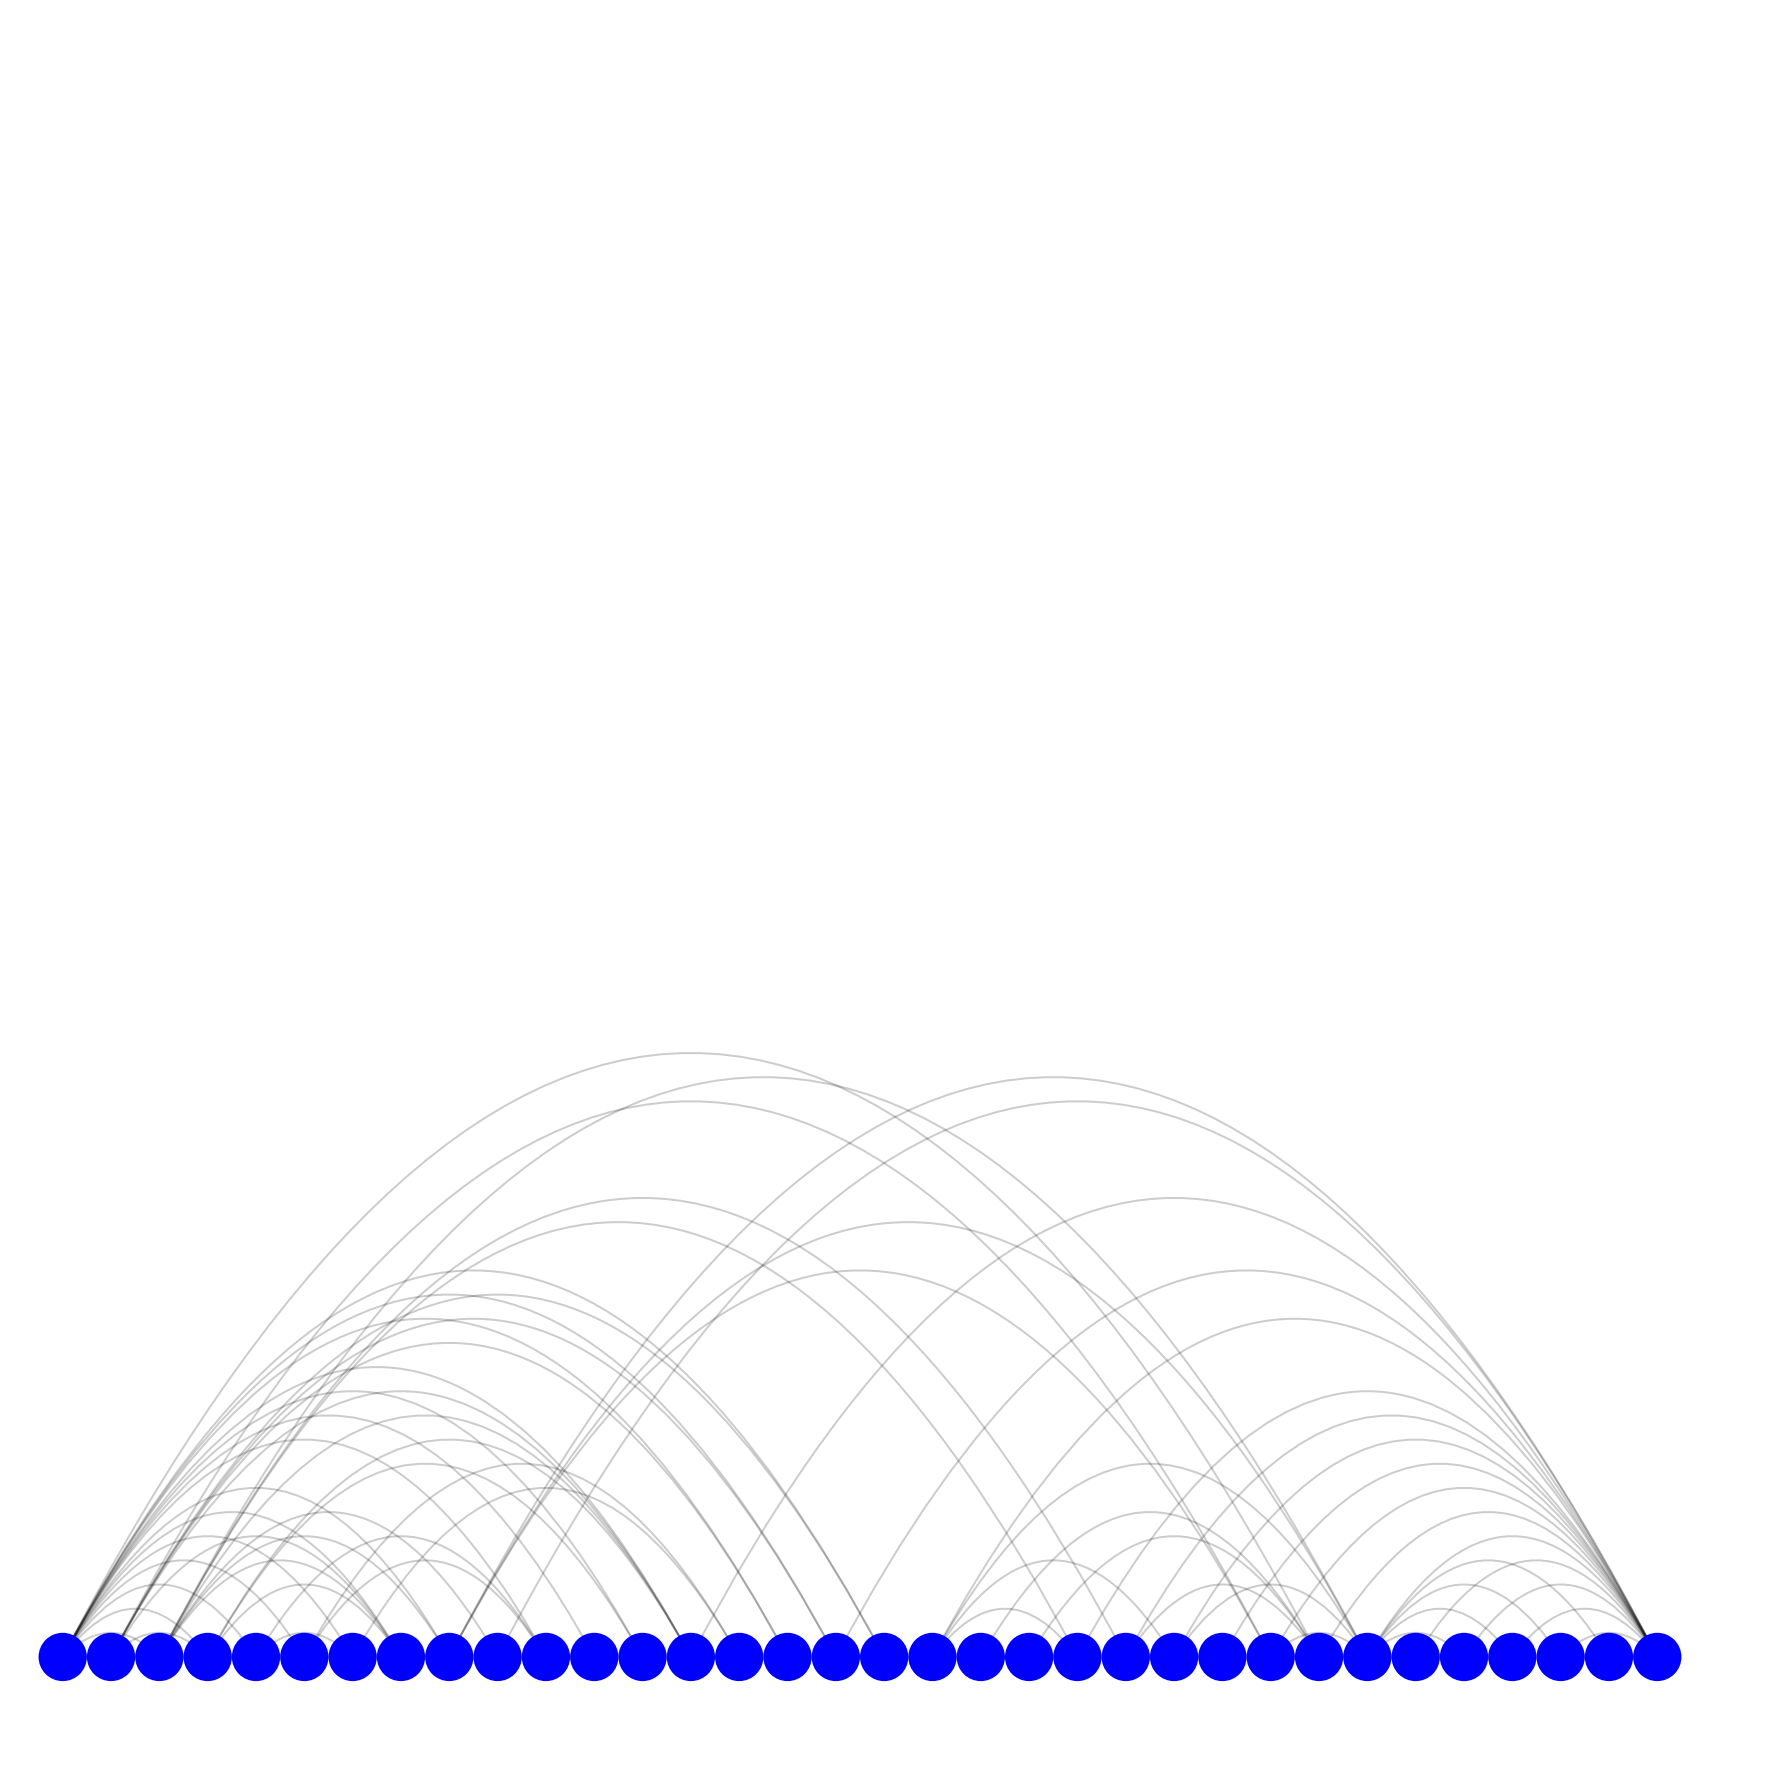

In [24]:
a = ArcPlot(ZKCG , figsize = (16,16))
a.draw()

In order to verify our suspicion, we will use the Louvain community detection algorithm to find the communities in our graph.

In [25]:
partition = community.best_partition(ZKCG)
partition

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 0,
 9: 2,
 10: 0,
 11: 1,
 12: 0,
 13: 0,
 14: 0,
 17: 1,
 18: 0,
 20: 0,
 22: 0,
 24: 3,
 26: 3,
 25: 3,
 28: 3,
 29: 3,
 30: 2,
 27: 2,
 31: 2,
 32: 3,
 33: 2,
 15: 2,
 16: 2,
 19: 2,
 21: 2,
 23: 2,
 34: 2}

As we can see the algorithm has found four different communities (0, 1, 2 and 3)

In [26]:
# create a subgraph for each partition
sub0 = []
for n in partition:
    if partition[n] == 0:
        sub0.append(n)
        
sub1 = []
for n in partition:
    if partition[n] == 1:
        sub1.append(n)
        
sub2 = []
for n in partition:
    if partition[n] == 2:
        sub2.append(n)
        
sub3 = []
for n in partition:
    if partition[n] == 3:
        sub3.append(n)

# use them to assign a 'subgraph' attribute to the nodes
commsubgraphs = [ZKCG.subgraph(sub0), ZKCG.subgraph(sub1), ZKCG.subgraph(sub2), ZKCG.subgraph(sub3)]

for i, g in enumerate(commsubgraphs):
    for n in g.nodes():
        ZKCG.nodes[n]['subgraph'] = i
        
list(ZKCG.nodes(data=True))[8:19]

[(9, {'subgraph': 2}),
 (10, {'subgraph': 0}),
 (11, {'subgraph': 1}),
 (12, {'subgraph': 0}),
 (13, {'subgraph': 0}),
 (14, {'subgraph': 0}),
 (17, {'subgraph': 1}),
 (18, {'subgraph': 0}),
 (20, {'subgraph': 0}),
 (22, {'subgraph': 0}),
 (24, {'subgraph': 3})]

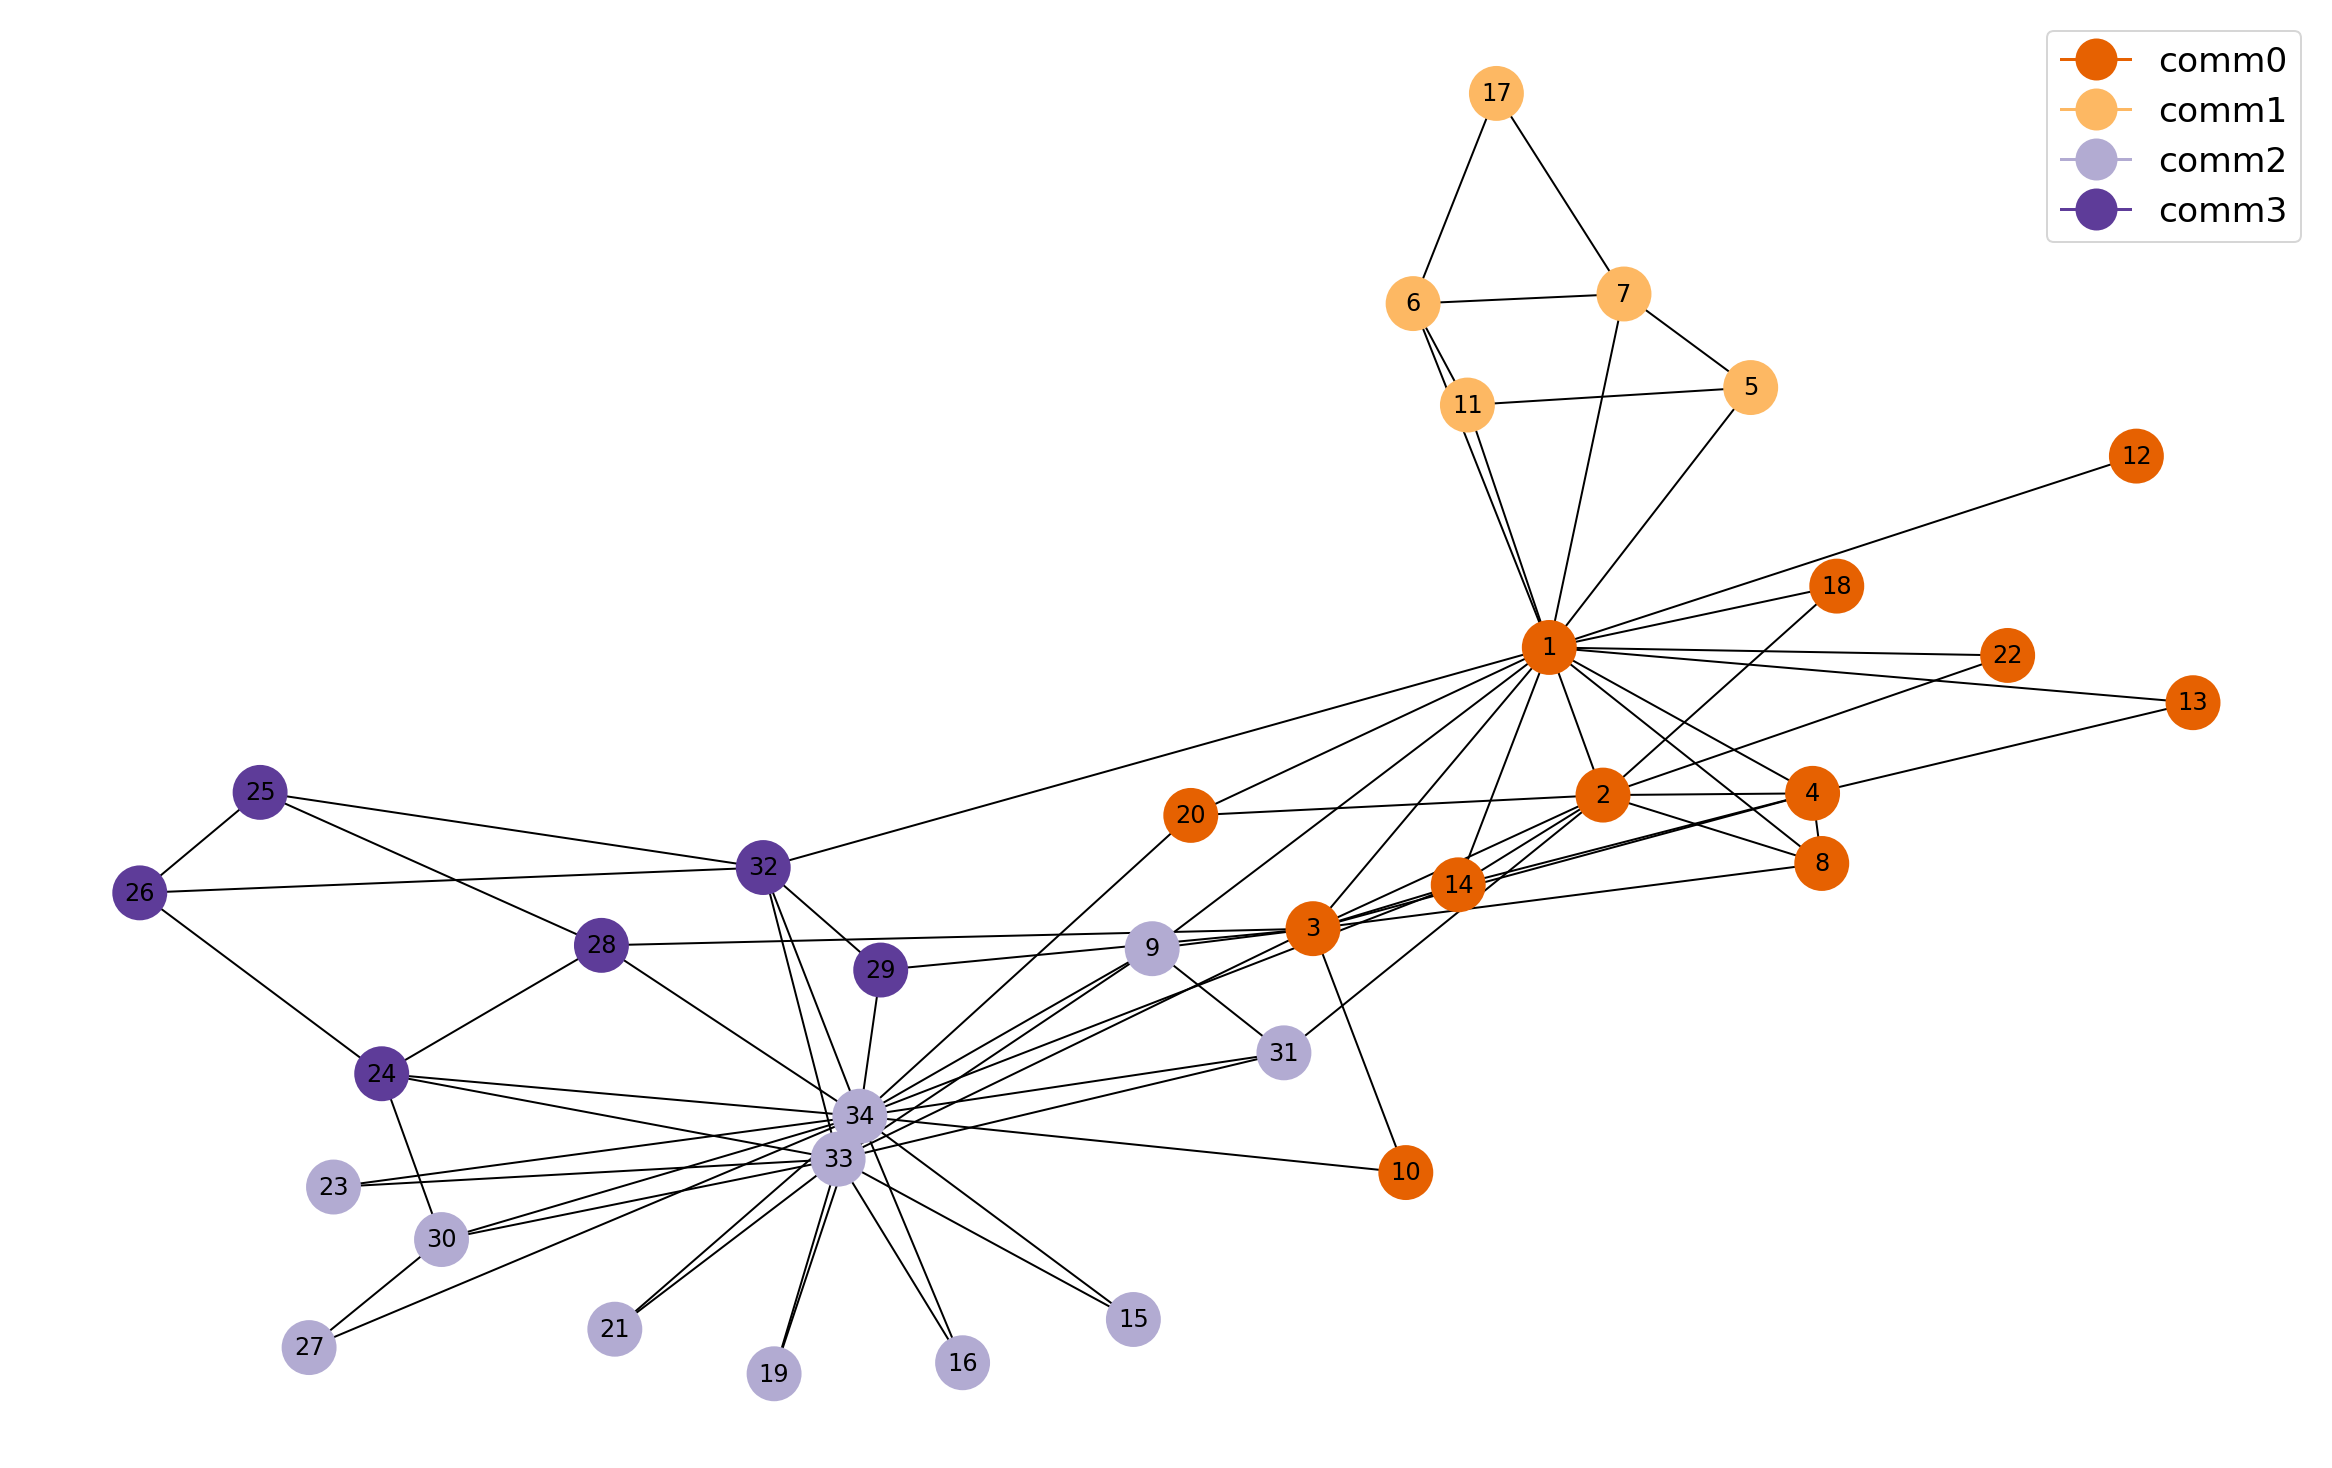

In [88]:
Zcolor_map = []
for node in ZKCG:
    if ZKCG.nodes[node]['subgraph'] == 0:
        Zcolor_map.append('#e66101')
    else:
        if ZKCG.nodes[node]['subgraph'] == 1:
            Zcolor_map.append('#fdb863')
        else:
            if ZKCG.nodes[node]['subgraph'] == 2:
                Zcolor_map.append('#b2abd2')
            else:
                Zcolor_map.append('#5e3c99')

# drawing with a spring layout can help visualize the communities
nx.draw_spring(ZKCG, node_color=Zcolor_map, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#e66101', label='comm0', markerfacecolor='#e66101', markersize=20),
                   Line2D([0], [0], marker='o', color='#fdb863', label='comm1', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='comm2', markerfacecolor='#b2abd2', markersize=20),
                   Line2D([0], [0], marker='o', color='#5e3c99', label='comm3', markerfacecolor='#5e3c99', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.show()

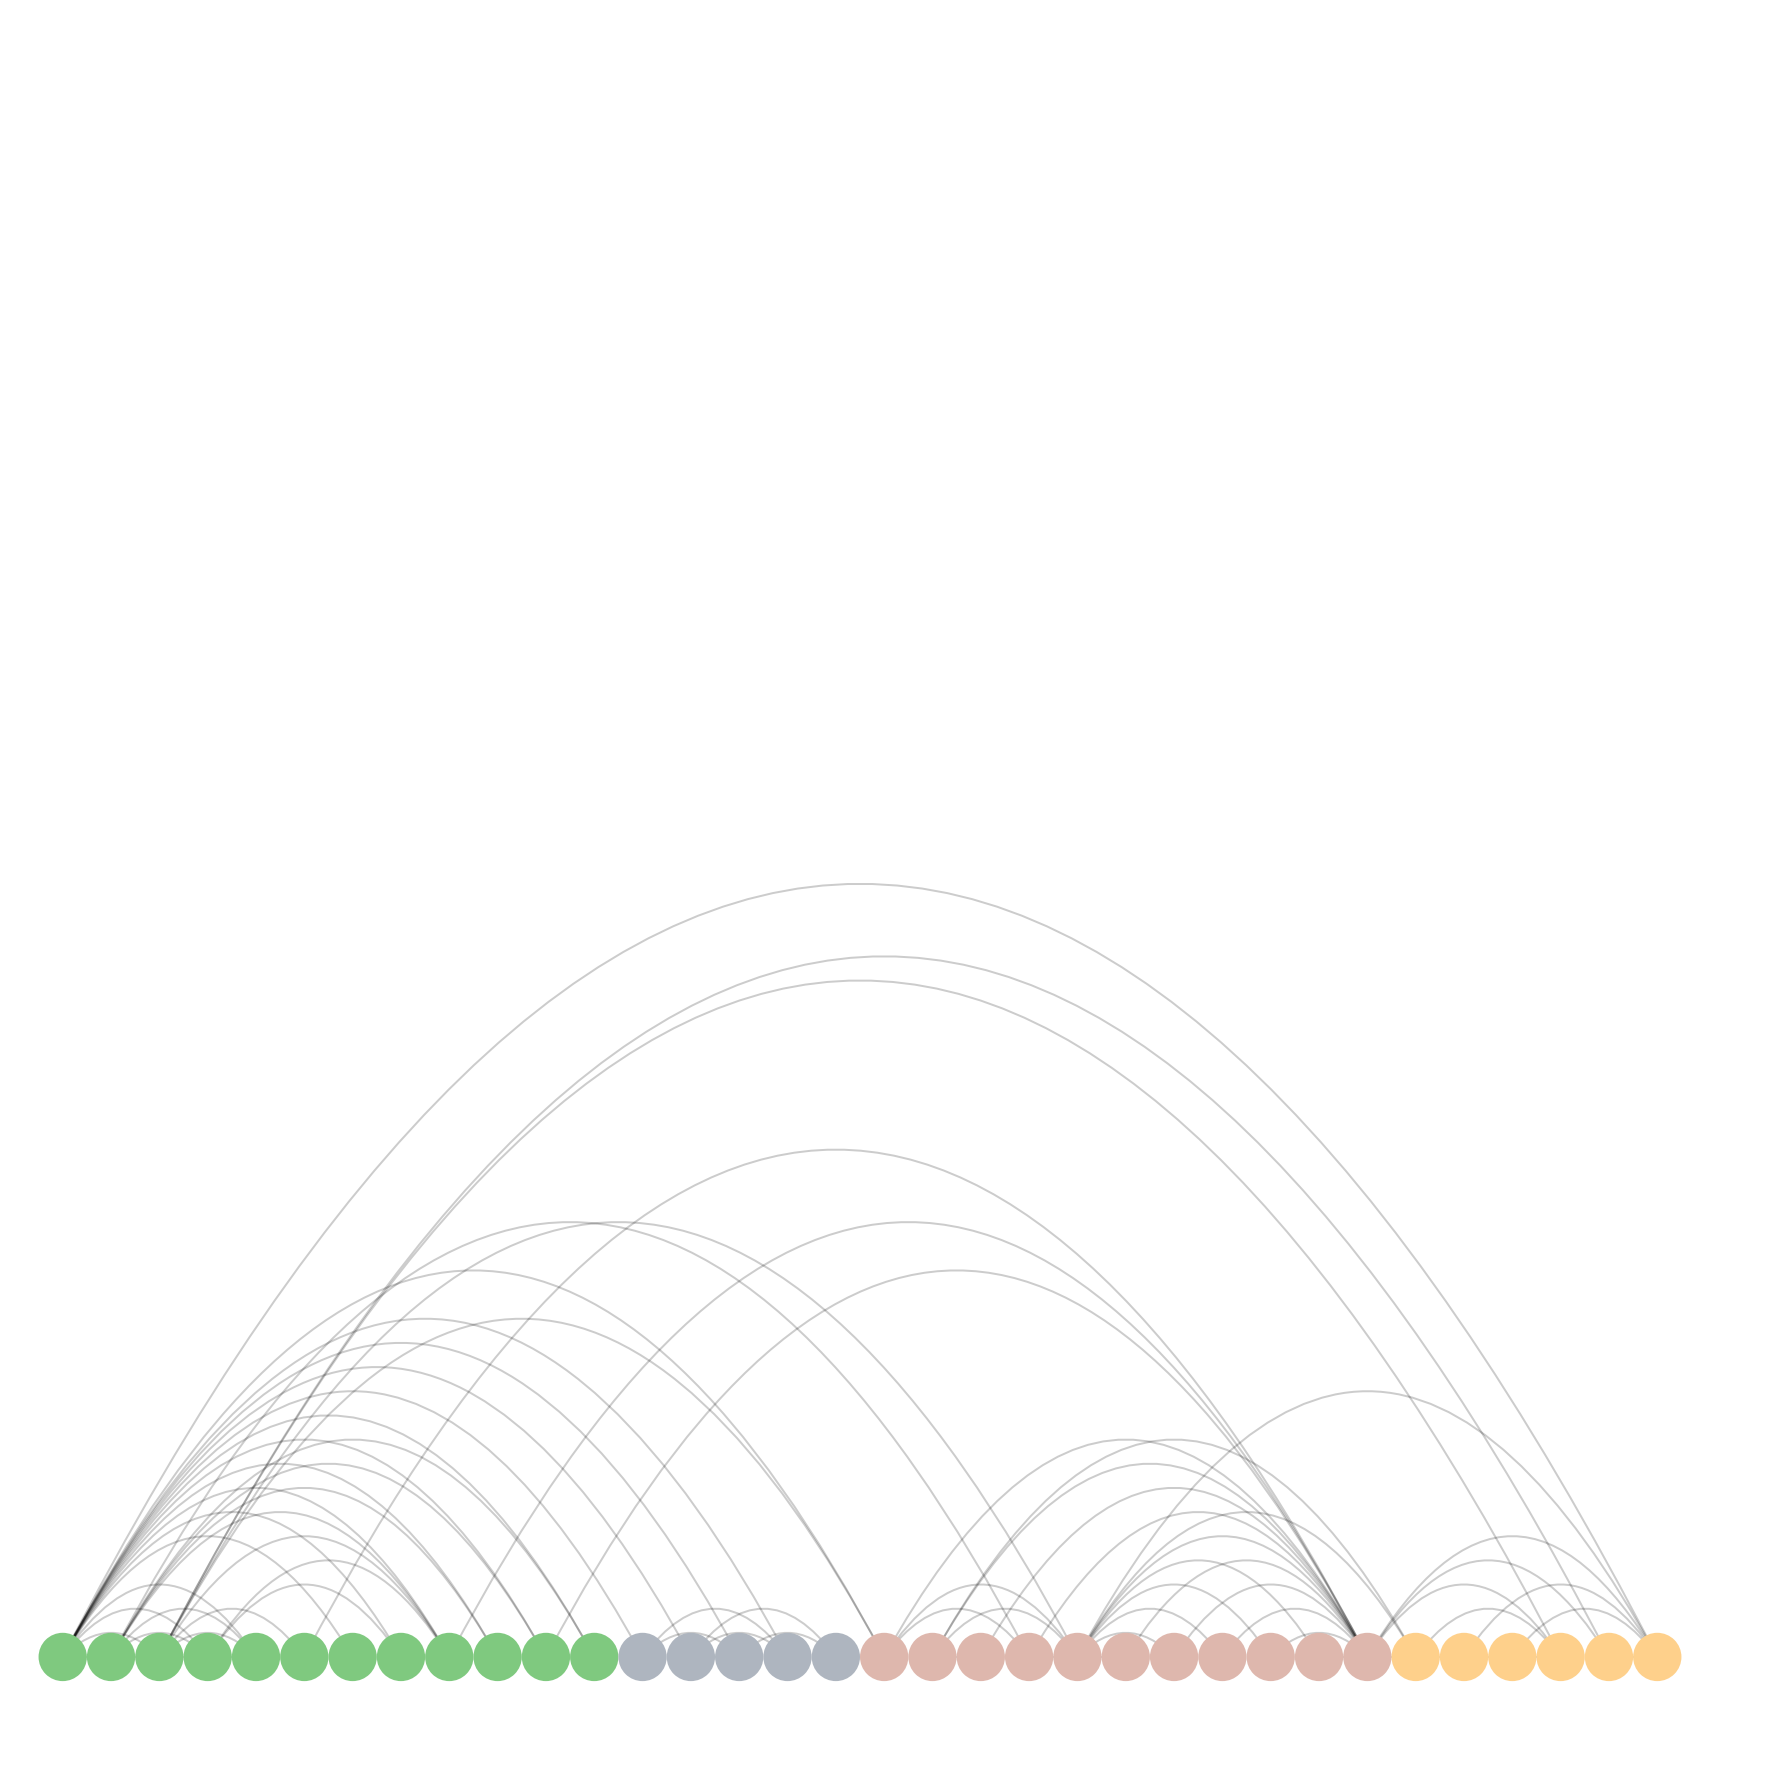

In [27]:
a = ArcPlot(ZKCG, node_color='subgraph', node_order='subgraph' , figsize = (16,16))
a.draw()

By plotting the graph with the four communities found, we realize that the groups 0 and 1 and the groups 2 and 3 are strongly connected between them, but they don't have strong connections with the other 2.
Hence, since we are interested in splitting the graph in two, we can have a simpler visualization by putting them together in one community.

In [29]:
com0 = []
for n in partition:
    if partition[n] == 0 or partition[n] == 1:
        com0.append(n)
        
com1 = []
for n in partition:
    if partition[n] == 2 or partition[n] == 3:
        com1.append(n)

        
commsubgraphs2 = [ZKCG.subgraph(com0), ZKCG.subgraph(com1)]

ZKCG2 = ZKCG.copy()

for i, g in enumerate(commsubgraphs2):
    for n in g.nodes():
        ZKCG2.nodes[n]['subgraph'] = i

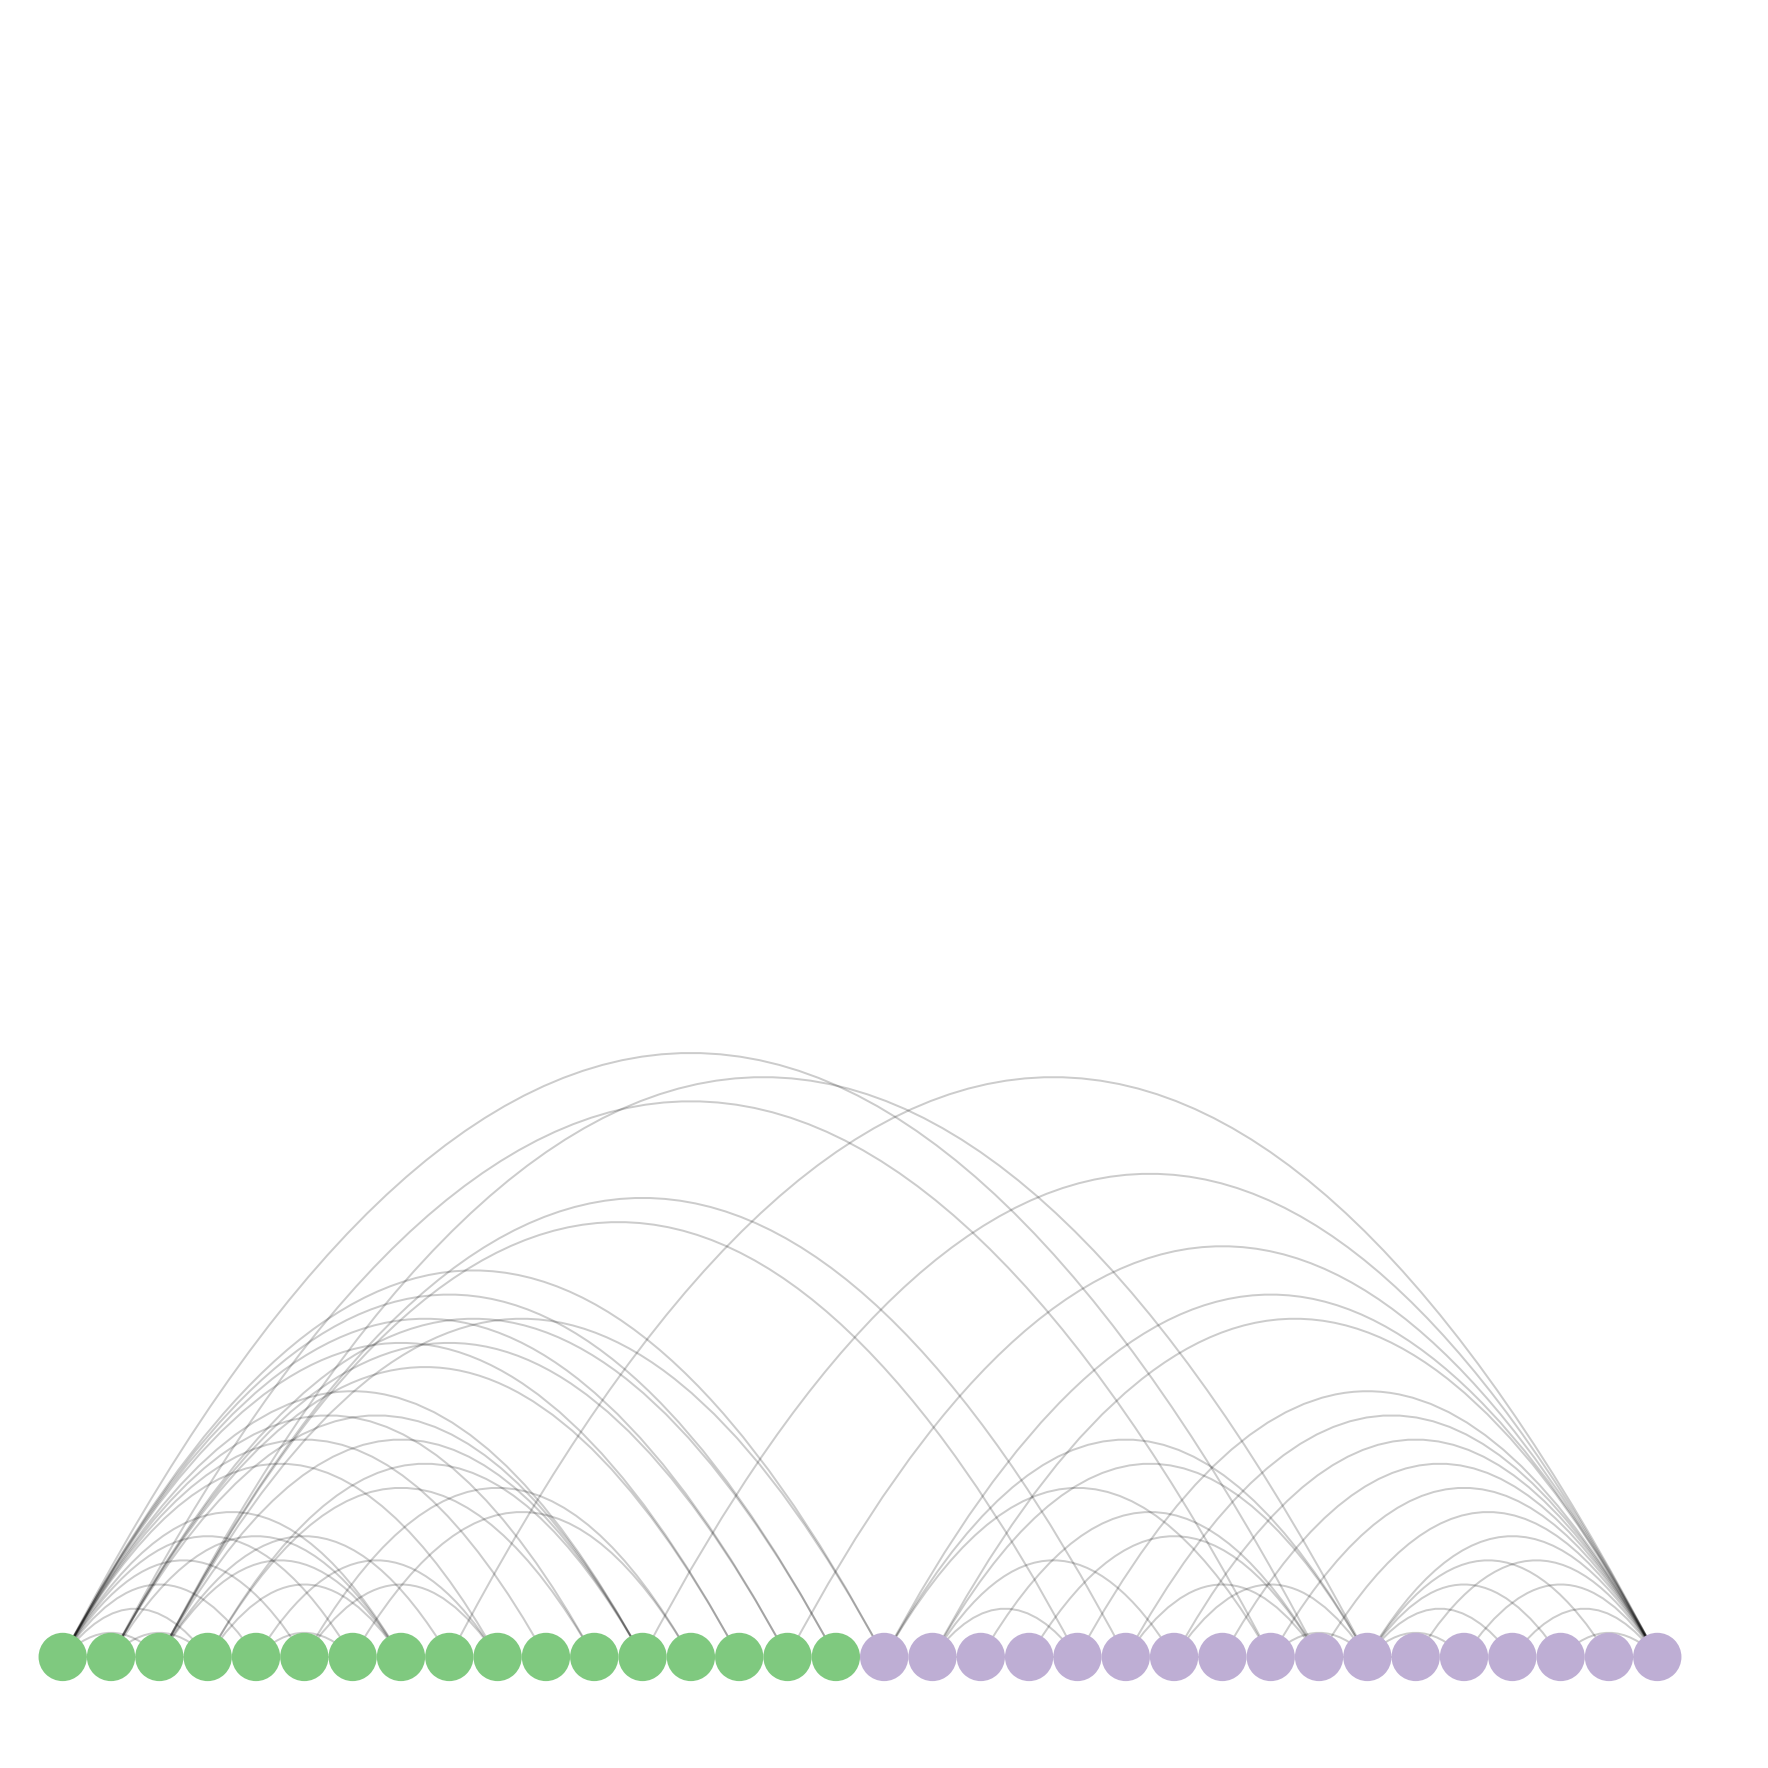

In [30]:
a = ArcPlot(ZKCG2, node_color='subgraph', node_order='subgraph' , figsize = (16,16))
a.draw()

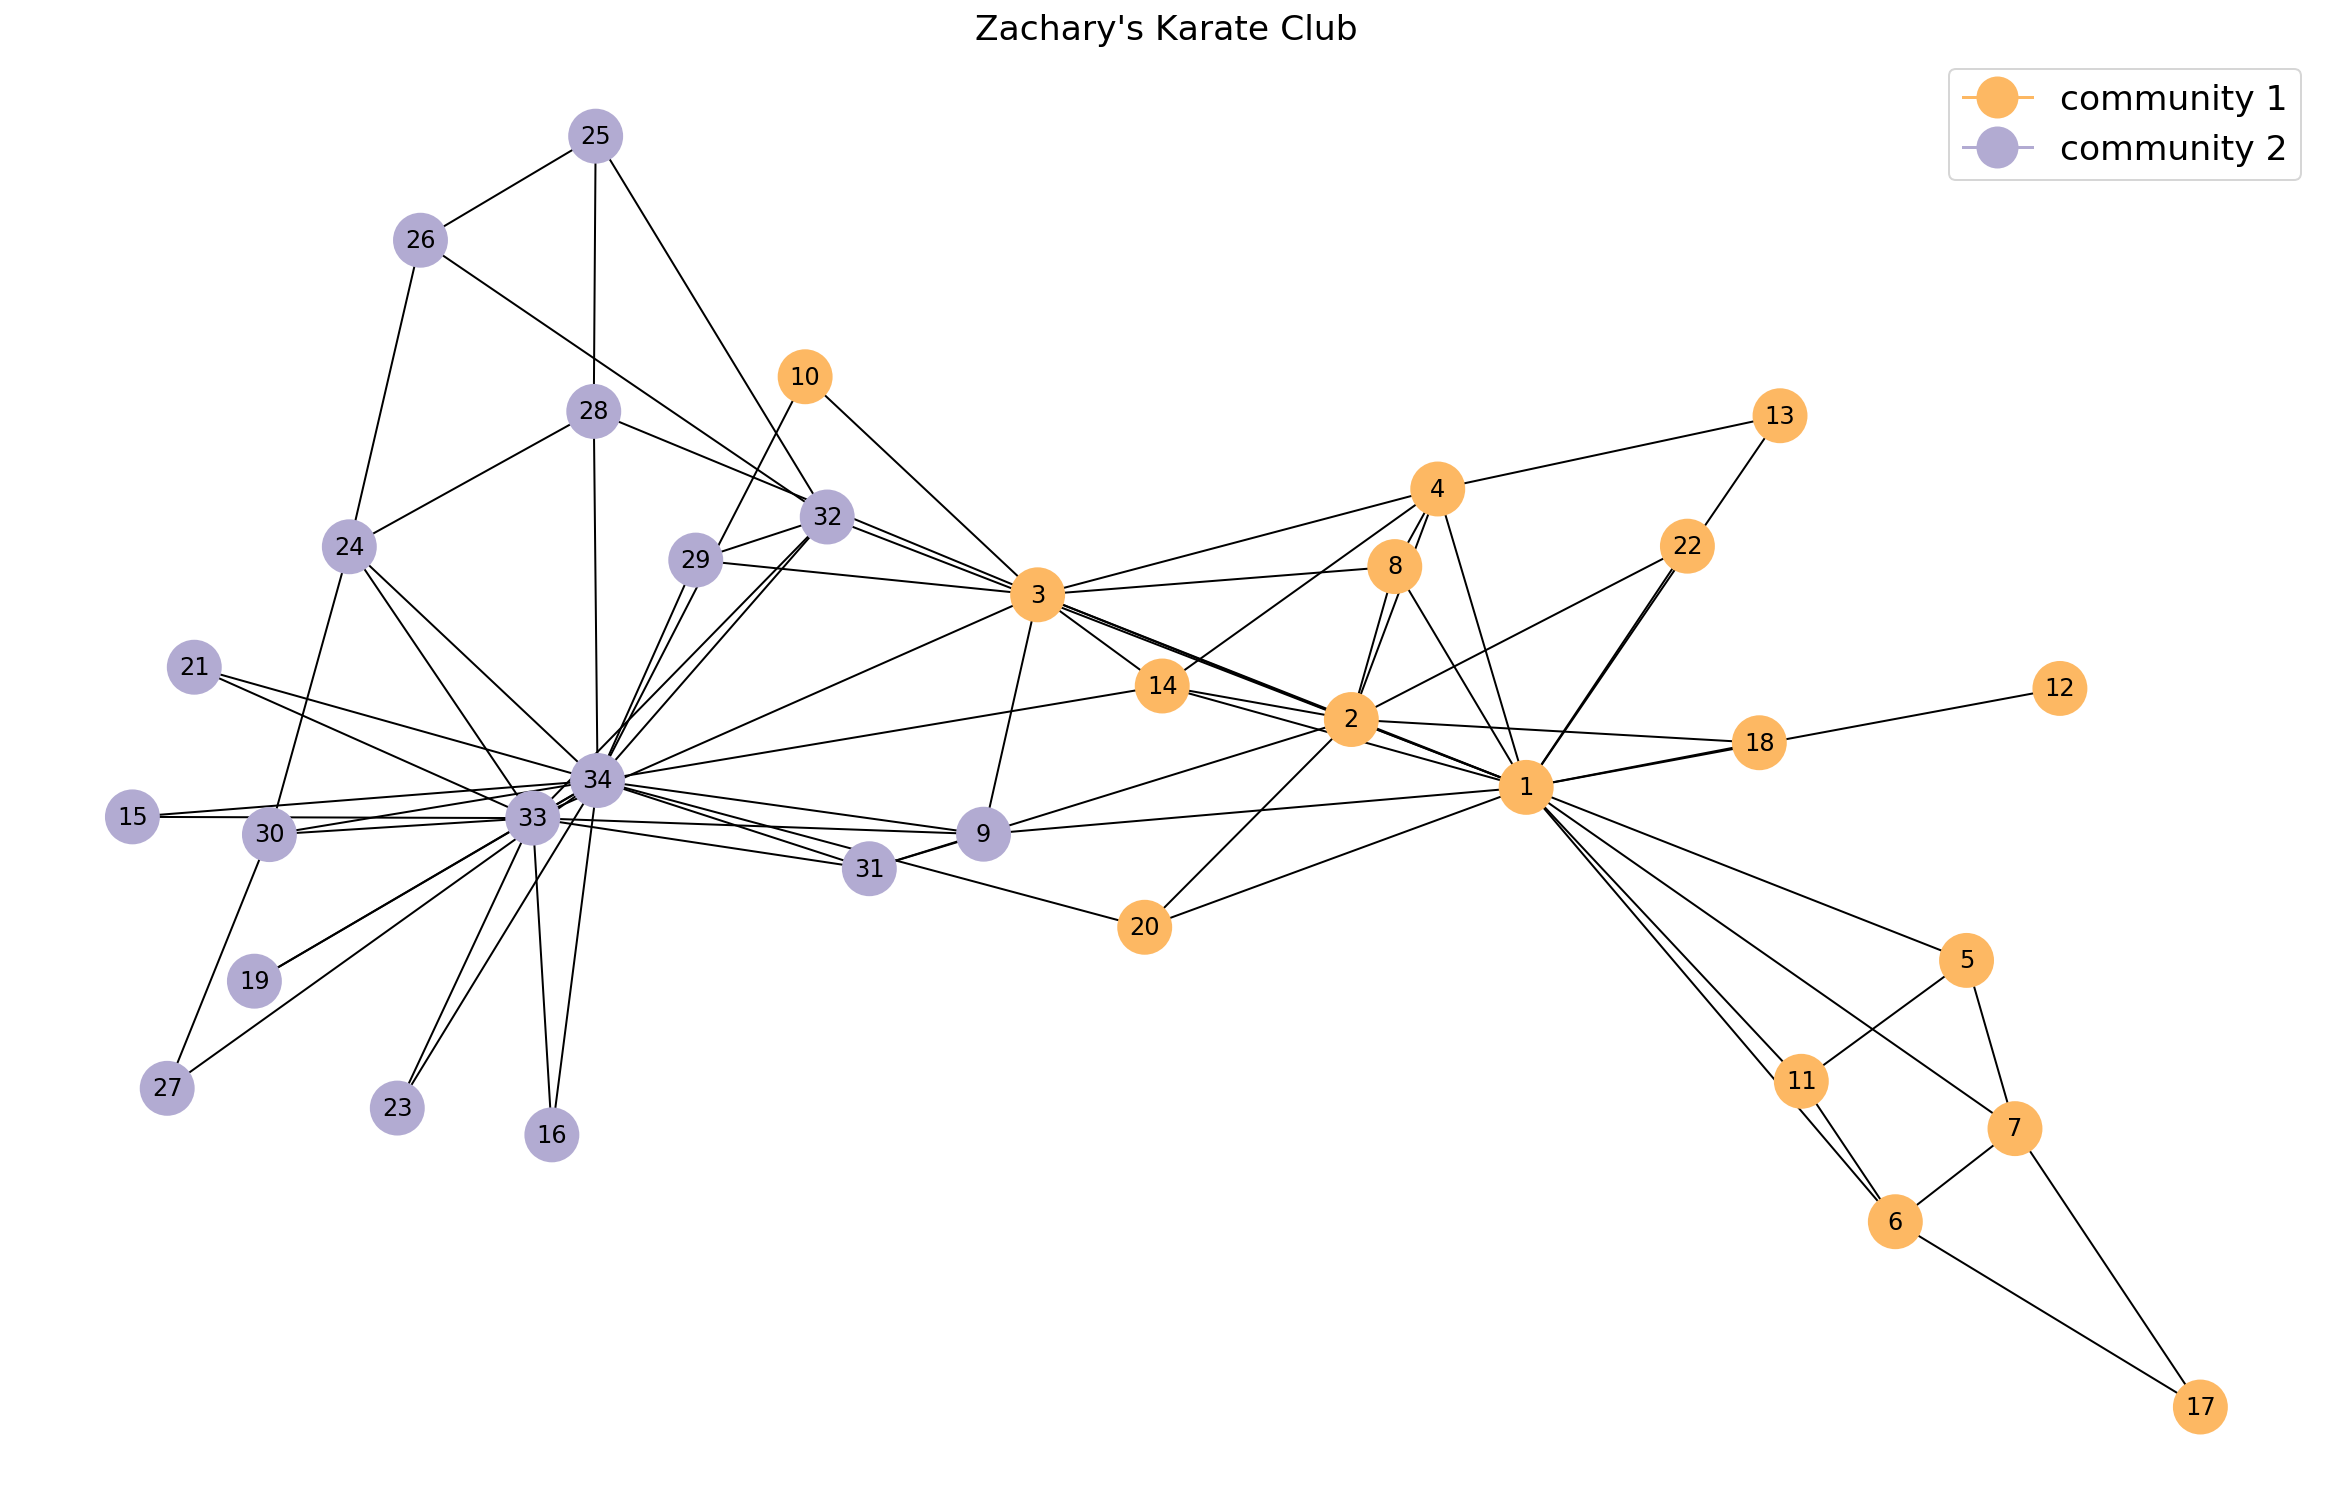

In [31]:
zcolor_map2 = []
for node in ZKCG2:
    if ZKCG2.nodes[node]['subgraph'] == 0:
        zcolor_map2.append('#fdb863')
    else: 
        zcolor_map2.append('#b2abd2')      

nx.draw_spring(ZKCG2, node_color=zcolor_map2, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#fdb863', label='community 1', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='community 2', markerfacecolor='#b2abd2', markersize=20),
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Zachary's Karate Club" , fontsize='xx-large')
plt.show()

We divided our graph into two communities. What about the interactions between them? To find out we can use an hiveplot

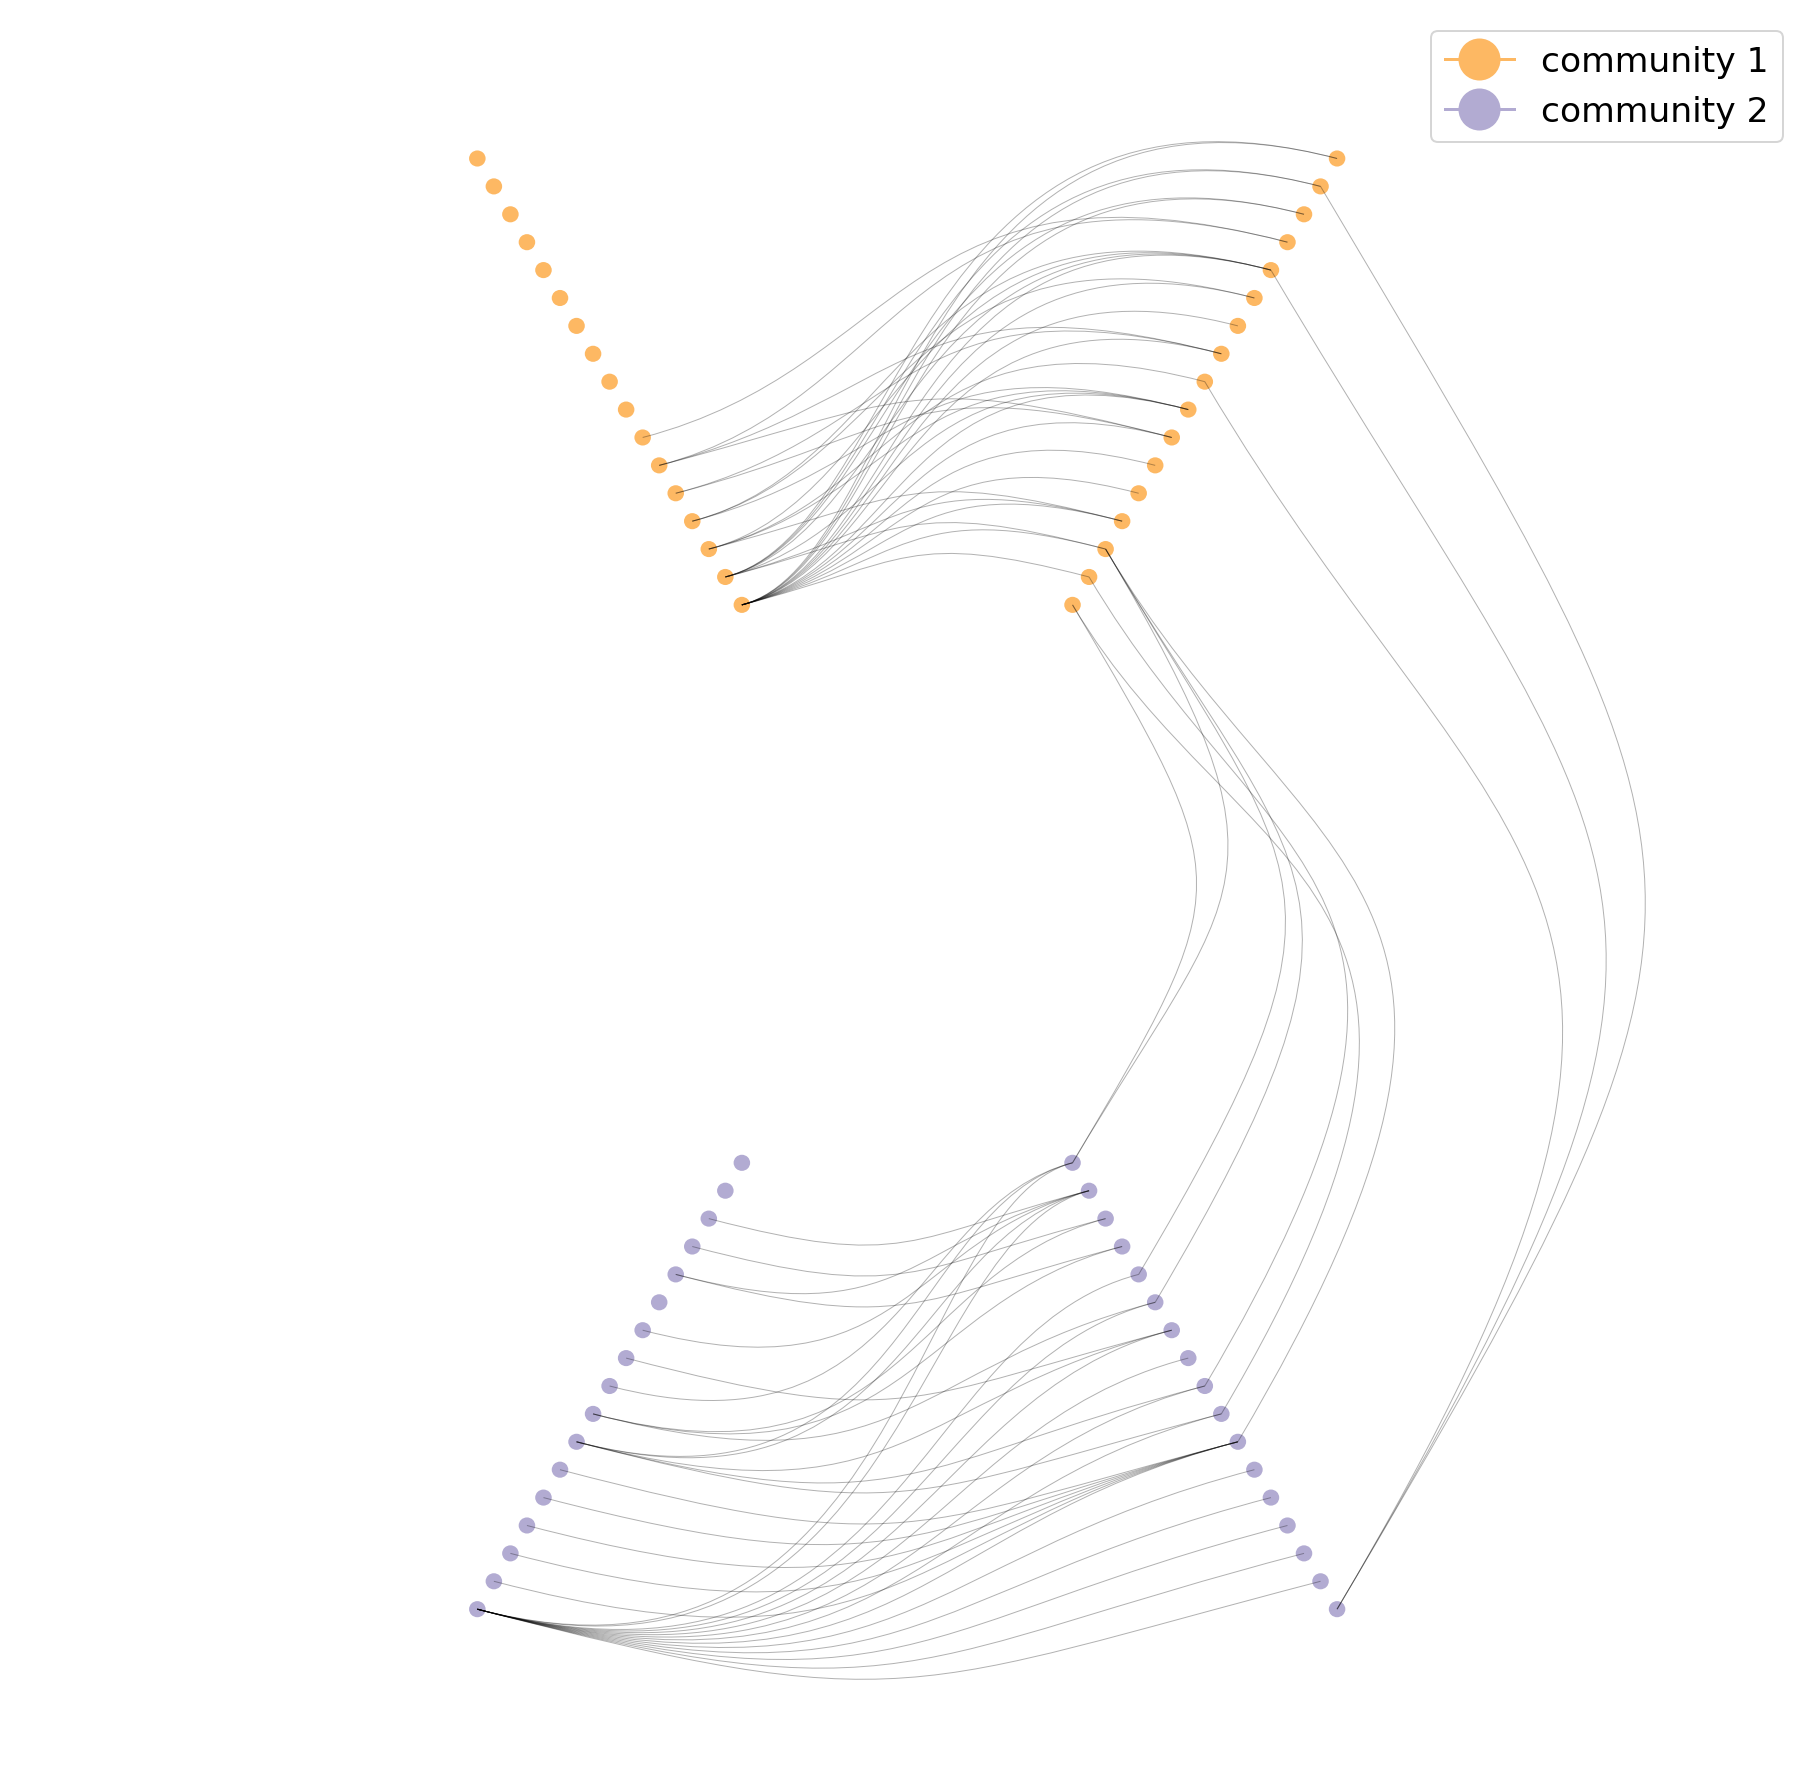

In [32]:
nodes = dict()
nodes['0'] = [n for n,d in ZKCG2.nodes(data=True) if d['subgraph'] == 0]
nodes['1'] = [n for n,d in ZKCG2.nodes(data=True) if d['subgraph'] == 1]

edges = dict()
edges['group1'] = ZKCG2.edges(data=True)

nodes_cmap = dict()
nodes_cmap['0'] = '#fdb863'
nodes_cmap['1'] = '#b2abd2'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

fig = plt.figure(figsize=(16, 16))
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap, scale=10 , fig=fig)
legend_elements = [Line2D([0], [0], marker='o', color='#fdb863', label='community 1', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='community 2', markerfacecolor='#b2abd2', markersize=20),
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
h.draw()

As we can see, members of the two communities tend to have interactions only inside their community.


Another hypothesis that we can make by looking at this graph is that the two communities seem to have each a central figure, who has lots of interactions with the members of his community.

In order to verify this hypothesis, we can find the two nodes who have the highest <b>degree centrality</b> (that counts the number of neighbours) in each community.

In [33]:
degree_centralities_com0 = nx.degree_centrality(ZKCG.subgraph(com0))
degree_centralities_com0

{1: 0.875,
 2: 0.5,
 3: 0.375,
 4: 0.375,
 5: 0.1875,
 6: 0.25,
 7: 0.25,
 8: 0.25,
 10: 0.0625,
 11: 0.1875,
 12: 0.0625,
 13: 0.125,
 14: 0.25,
 17: 0.125,
 18: 0.125,
 20: 0.125,
 22: 0.125}

In [34]:
max_com0 = max(degree_centralities_com0, key=degree_centralities_com0.get)
print(max_com0)
print(degree_centralities_com0[max_com0])

1
0.875


In [35]:
degree_centralities_com1 = nx.degree_centrality(ZKCG.subgraph(com1))
degree_centralities_com1

{9: 0.1875,
 24: 0.3125,
 26: 0.1875,
 25: 0.1875,
 28: 0.1875,
 29: 0.125,
 30: 0.25,
 27: 0.125,
 31: 0.1875,
 32: 0.3125,
 33: 0.6875,
 15: 0.125,
 16: 0.125,
 19: 0.125,
 21: 0.125,
 23: 0.125,
 34: 0.875}

In [36]:
max_com1 = max(degree_centralities_com1, key=degree_centralities_com1.get)
print(max_com1)
print(degree_centralities_com1[max_com1])

34
0.875


We found out that the two central nodes are node 1 for the community 0 and node 34 for the community 1.

In the karate club, <b>Node 1 stands for the instructor, node 34 for the club president</b>. During the study, a conflict arose between them, which led to the <b>split of the club into two</b>.
Based on the analysis of the data, Zachary was able to correctly assign all but one member to the group they joined after the split.

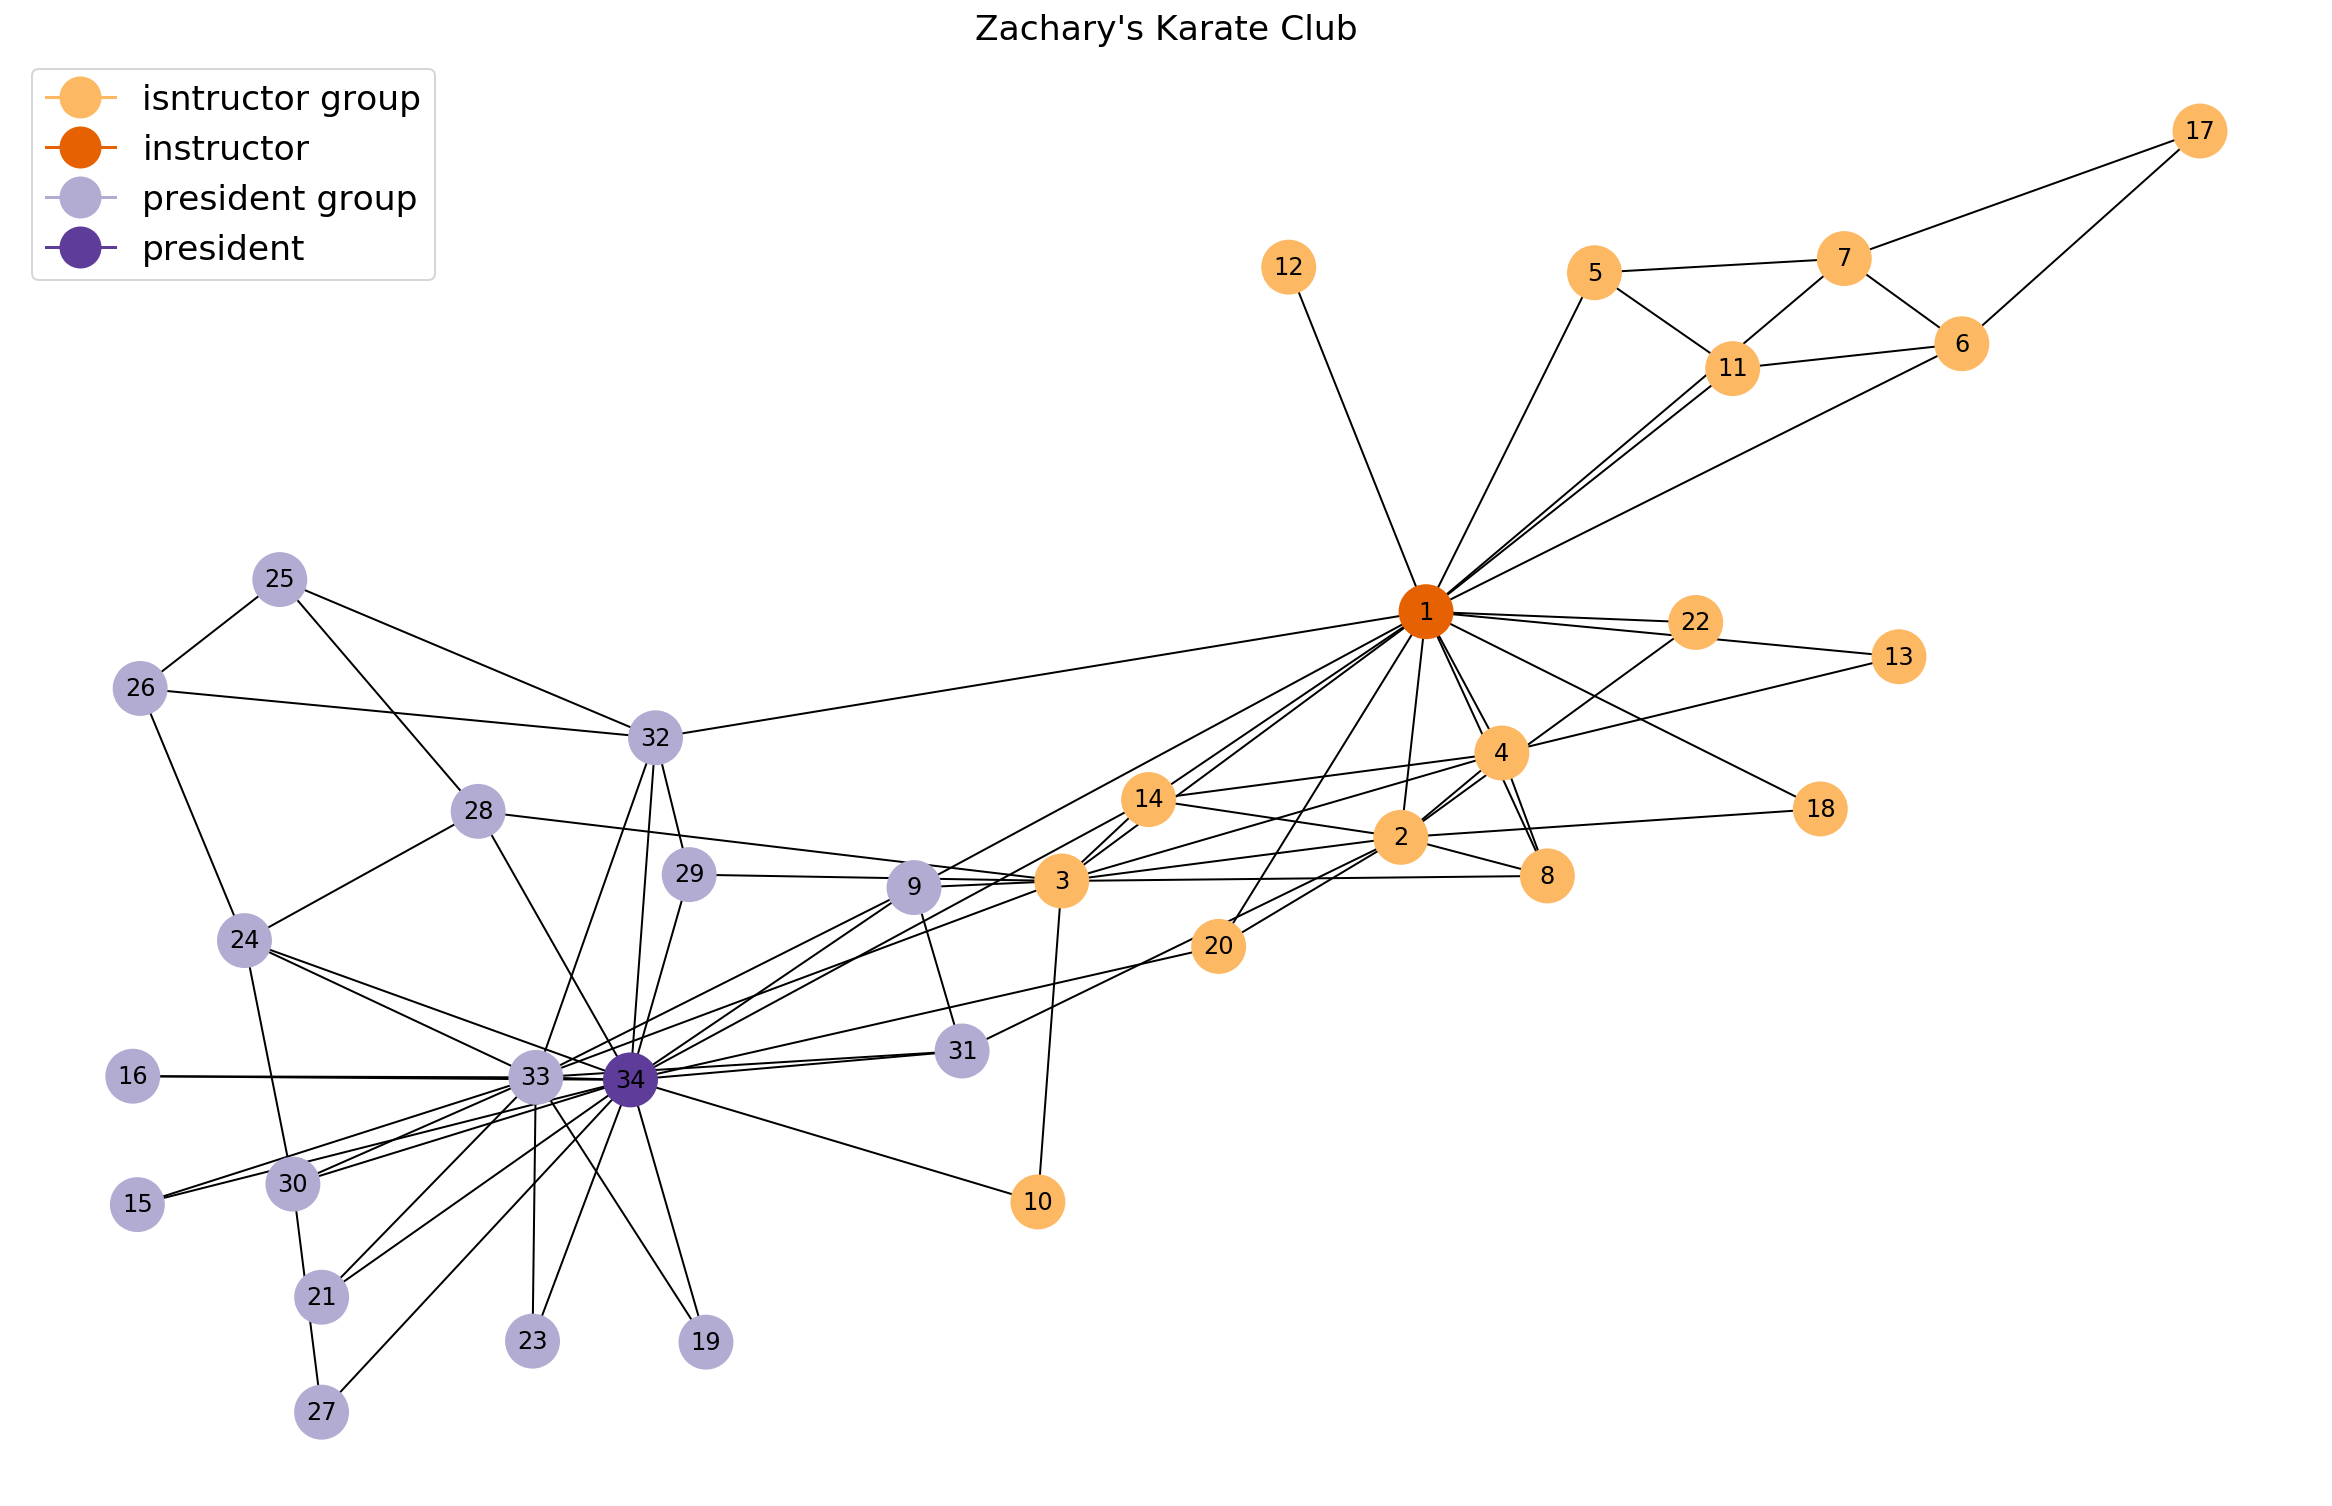

In [77]:
zcolor_map3 = []
for node in ZKCG2:
    if node == 1:
        zcolor_map3.append('#e66101')
    else:
        if node == 34:
            zcolor_map3.append('#5e3c99')
        else:
            if ZKCG2.nodes[node]['subgraph'] == 0:
                zcolor_map3.append('#fdb863')
            else: 
                zcolor_map3.append('#b2abd2')

nx.draw_spring(ZKCG2, node_color=zcolor_map3, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#fdb863', label='isntructor group', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#e66101', label='instructor', markerfacecolor='#e66101', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='president group', markerfacecolor='#b2abd2', markersize=20),
                   Line2D([0], [0], marker='o', color='#5e3c99', label='president', markerfacecolor='#5e3c99', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Zachary's Karate Club" , fontsize='xx-large')
plt.show()

<br><a href="http://konect.uni-koblenz.de/networks/subelj_euroroad"><h1>Not only social networks: E-Roads Network</h1></a>
<br>
<p>
Network analysis is not limited to only social networks: we can use most of the concepts and techniques that we have seen to analyze other types of networks, for example, this <b>Street Network</b>.
</p>
<p>
This dataset represents the international E-road network, a road network located mostly in Europe. The network is undirected; nodes represent cities and an edge between two nodes denotes that they are connected by an E-road.
</p>
<p>
The full dataset is very big and it would create a large representation, difficult to understand at first glance.
In order to obtain a simpler visualization, we took only the data regarding Italian cities.
To avoid having nodes very close to each other at the point of being undistinguished, we also united the cities that are very near (such as Roma and Fiano Romano) in a single node.
</p>

In [38]:
import sys
sys.path.append('scripts')
# To avoid putting a lot of repetitive code in this notebook, we made a script file containing the dictionary 
# of the coordinates of the nodes. If you are interested you are free to check it out in the directory "scripts"
import italian_cities_pos as icp
pos=icp.pos()

In [39]:
eroadsdf = pd.read_csv('data/subelj_euroroad/myout.euroroad', skiprows=2, header=None, sep=',')
eroadsdf.columns = ['city1', 'city2']
eroadsG = nx.from_pandas_edgelist(eroadsdf, source='city1', target='city2')

print(nx.info(eroadsG))

Name: 
Type: Graph
Number of nodes: 69
Number of edges: 87
Average degree:   2.5217


In [40]:
# print the nodes, that represents the crossroad cities for the Italian portion of the E-road network
eroadsG.nodes

NodeView(('Aosta', 'Ivrea', 'Vercelli', 'Torino', 'Alessandria', 'Genova', 'Asti', 'Grosseto', 'Roma', 'Pisa', 'La Spezia', 'Buonfornello', 'Palermo', 'Sassari', 'Cagliari', 'Olbia', 'Como', 'Milano', 'Piacenza', 'Brescia', 'Gravellona Toce', 'Parma', 'Modena', 'Alcamo', 'Mazara del Vallo', 'Verona', 'Bologna', 'Firenze', 'Pescara', 'Fortezza', 'Bolzano', 'San Candido', 'Trento', 'Mestre', 'Cesena', 'Perugia', 'Ravenna', 'Rimini', 'Napoli', 'Salerno', 'Avellino', 'Sicignano degli Alburni', 'Cosenza', 'Potenza', 'Lamezia', 'Reggio Calabria', 'Catanzaro', 'Crotone', 'Metaponto', 'Savona', 'Messina', 'Catania', 'Siracusa', 'Enna', 'Gela', 'Tarvisio', 'Udine', 'Trieste', 'Fano', 'Ancona', 'Arezzo', 'Canosa di Puglia', 'Bari', 'Benevento', 'Brindisi', 'Taranto', 'Susa', 'Cuneo', 'Trapani'))

<p>
What could be a good way to represent a <b>Street Network</b>?
</p>
<p>
Using the geographic coordinate of each node (city), we can set their position in the graph to copy their real location. Doing so, the graph looks like a map, and the visualization becomes much more intuitive.
</p>


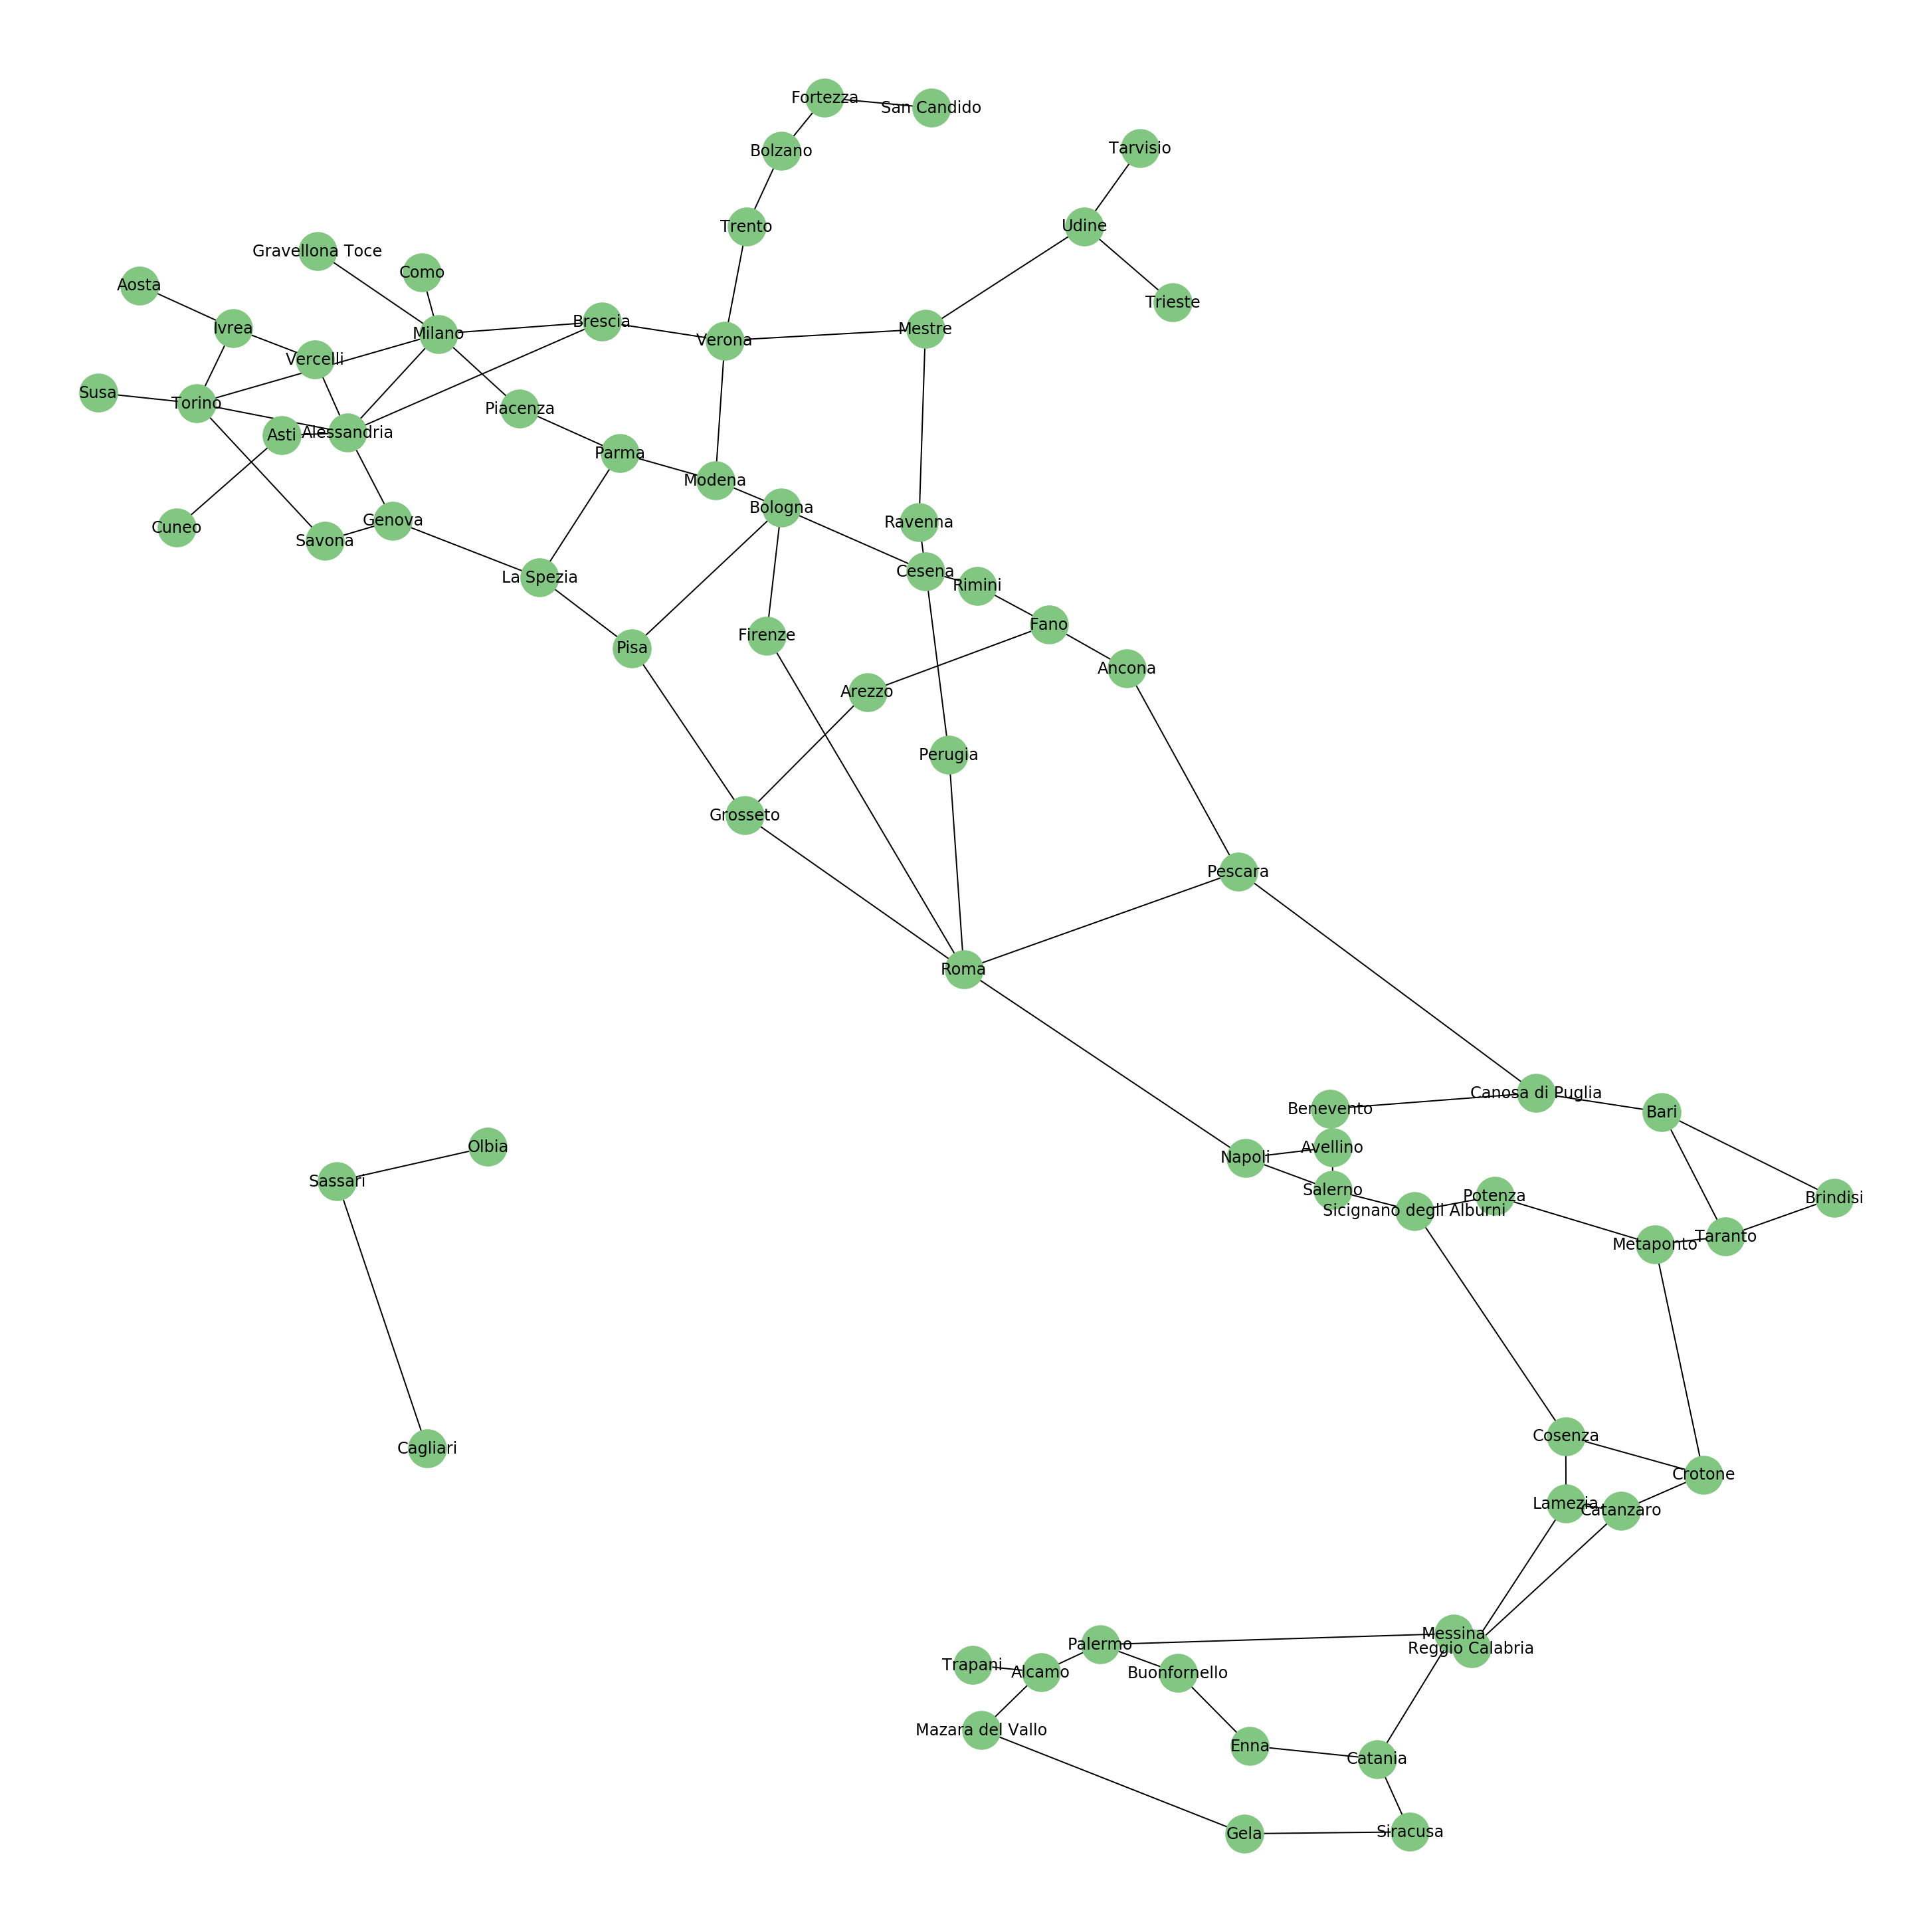

In [41]:
plt.rcParams["figure.figsize"] = (20,20)

nx.draw(eroadsG, pos=pos, with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)

<p>
Is it possible to reach every City from a random starting point (using only the E-roads)?
We can try to answer this question by looking for <b>connected components</b> in the graph. <i>(Reminder: a connected component is a subgraph, which any two vertices are connected by paths and are connected to no additional vertices of the supergraph)</i>
</p>

In [42]:
ccsubgraphseroads = list(connected_component_subgraphs(eroadsG))
ccsubgraphseroads

In [43]:
for i, g in enumerate(ccsubgraphseroads):
    for n in g.nodes():
        eroadsG.nodes[n]['subgraph'] = i

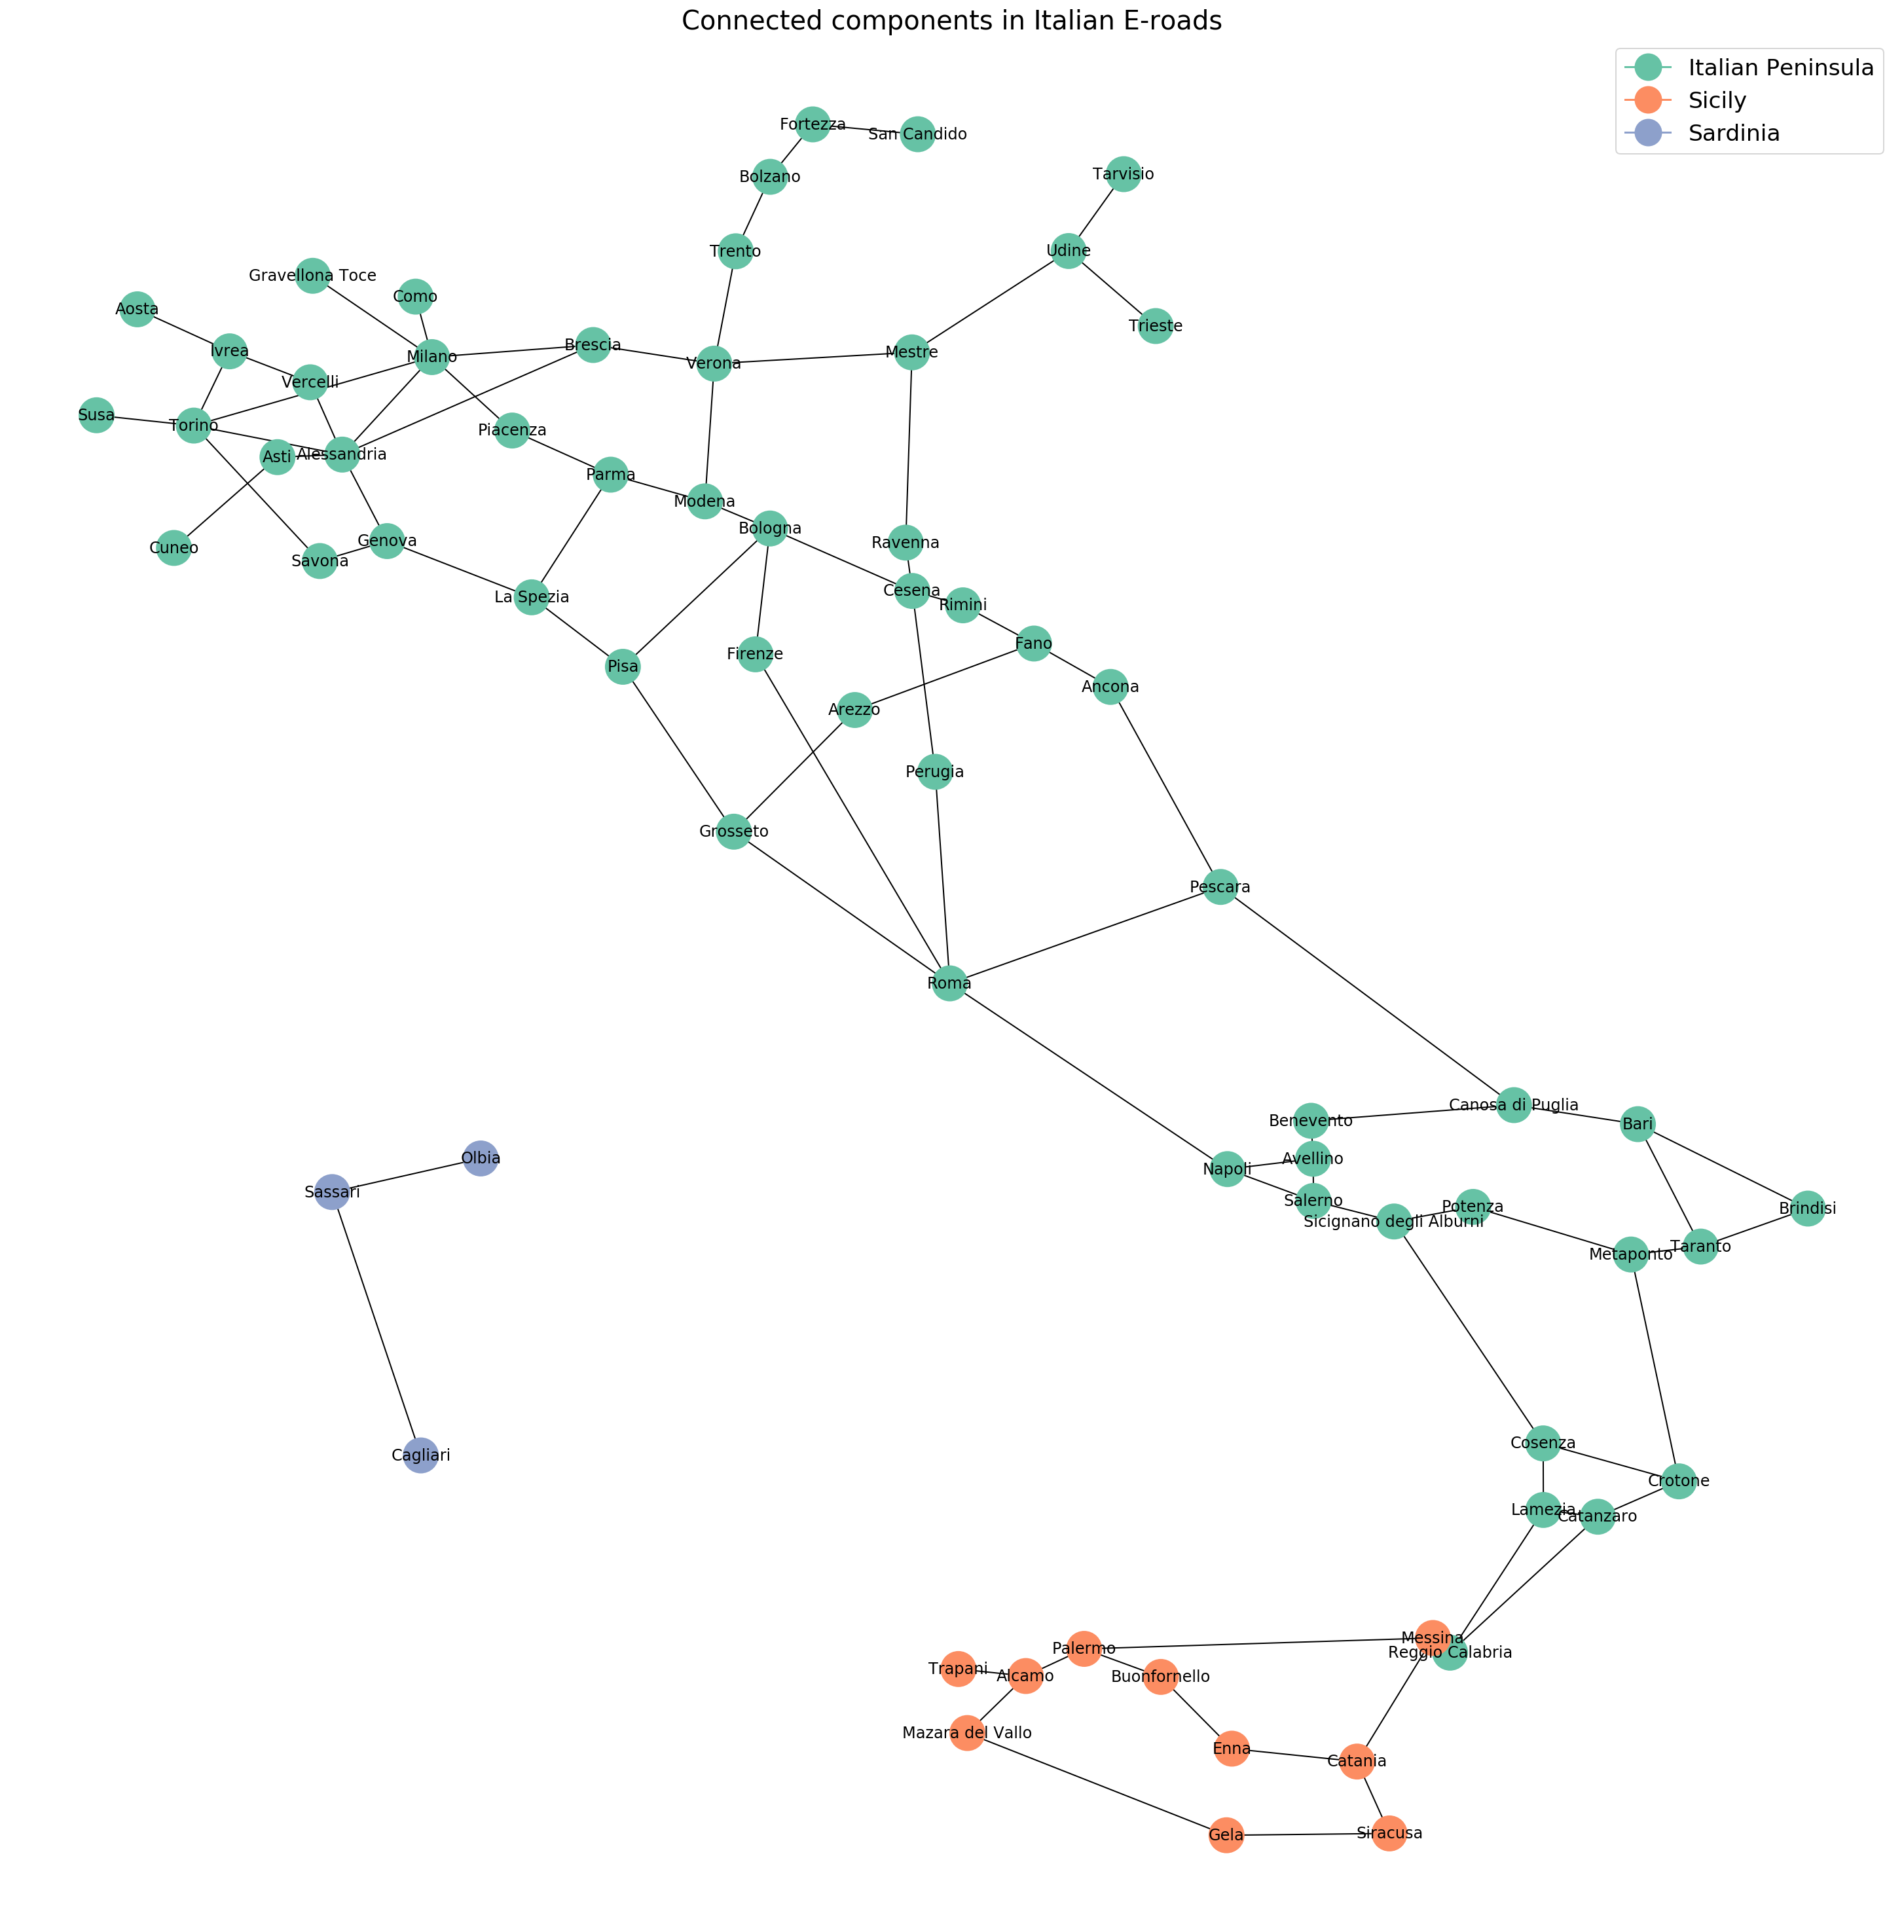

In [44]:
ercolor_map = []
for node in eroadsG:
    if eroadsG.nodes[node]['subgraph'] == 0:
        ercolor_map.append('#66c2a5')
    else:
        if eroadsG.nodes[node]['subgraph'] == 1:
            ercolor_map.append('#fc8d62')
        else:
            ercolor_map.append('#8da0cb')

# drawing with a spring layout can help visualize the communities
nx.draw(eroadsG, pos=pos, node_color=ercolor_map, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#66c2a5', label='Italian Peninsula', markerfacecolor='#66c2a5', markersize=20),
                   Line2D([0], [0], marker='o', color='#fc8d62', label='Sicily', markerfacecolor='#fc8d62', markersize=20),
                   Line2D([0], [0], marker='o', color='#8da0cb', label='Sardinia', markerfacecolor='#8da0cb', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Connected components in Italian E-roads" , fontsize=20)
plt.show()

<p>
The E-road network doesn't cover ferry connections, hence the two big Italian islands are part of separated connected components.
The Italian peninsula is part of a single, big connected component: this means that it is possible to reach any of the cities in the network starting from a random node.
</p>
<br>
<p>
A big role in the analysis of Street Networks is played by the search for routes, that translates in the search for a path in the graph.

Let's suppose that we want to go from Torino to Taranto. Which route should I choose?

Sadly the dataset doesn't contain additional info about the road, such as the length, the traffic or something else that could help us choose the "best" path.
The only thing we can do is to compute the path that goes through the lowest number of edges.

To find it we will use <code>nx.shortest_path(G, source, target)</code>, that gives us a list of nodes that exist within one of the shortest paths between the two nodes.
</p>

In [45]:
nx.shortest_path(eroadsG, 'Torino', 'Taranto')

['Torino',
 'Alessandria',
 'Genova',
 'La Spezia',
 'Pisa',
 'Grosseto',
 'Roma',
 'Pescara',
 'Canosa di Puglia',
 'Bari',
 'Taranto']

<p>
Now we can give a visualization of the path we found by plotting over the graph:
</p>

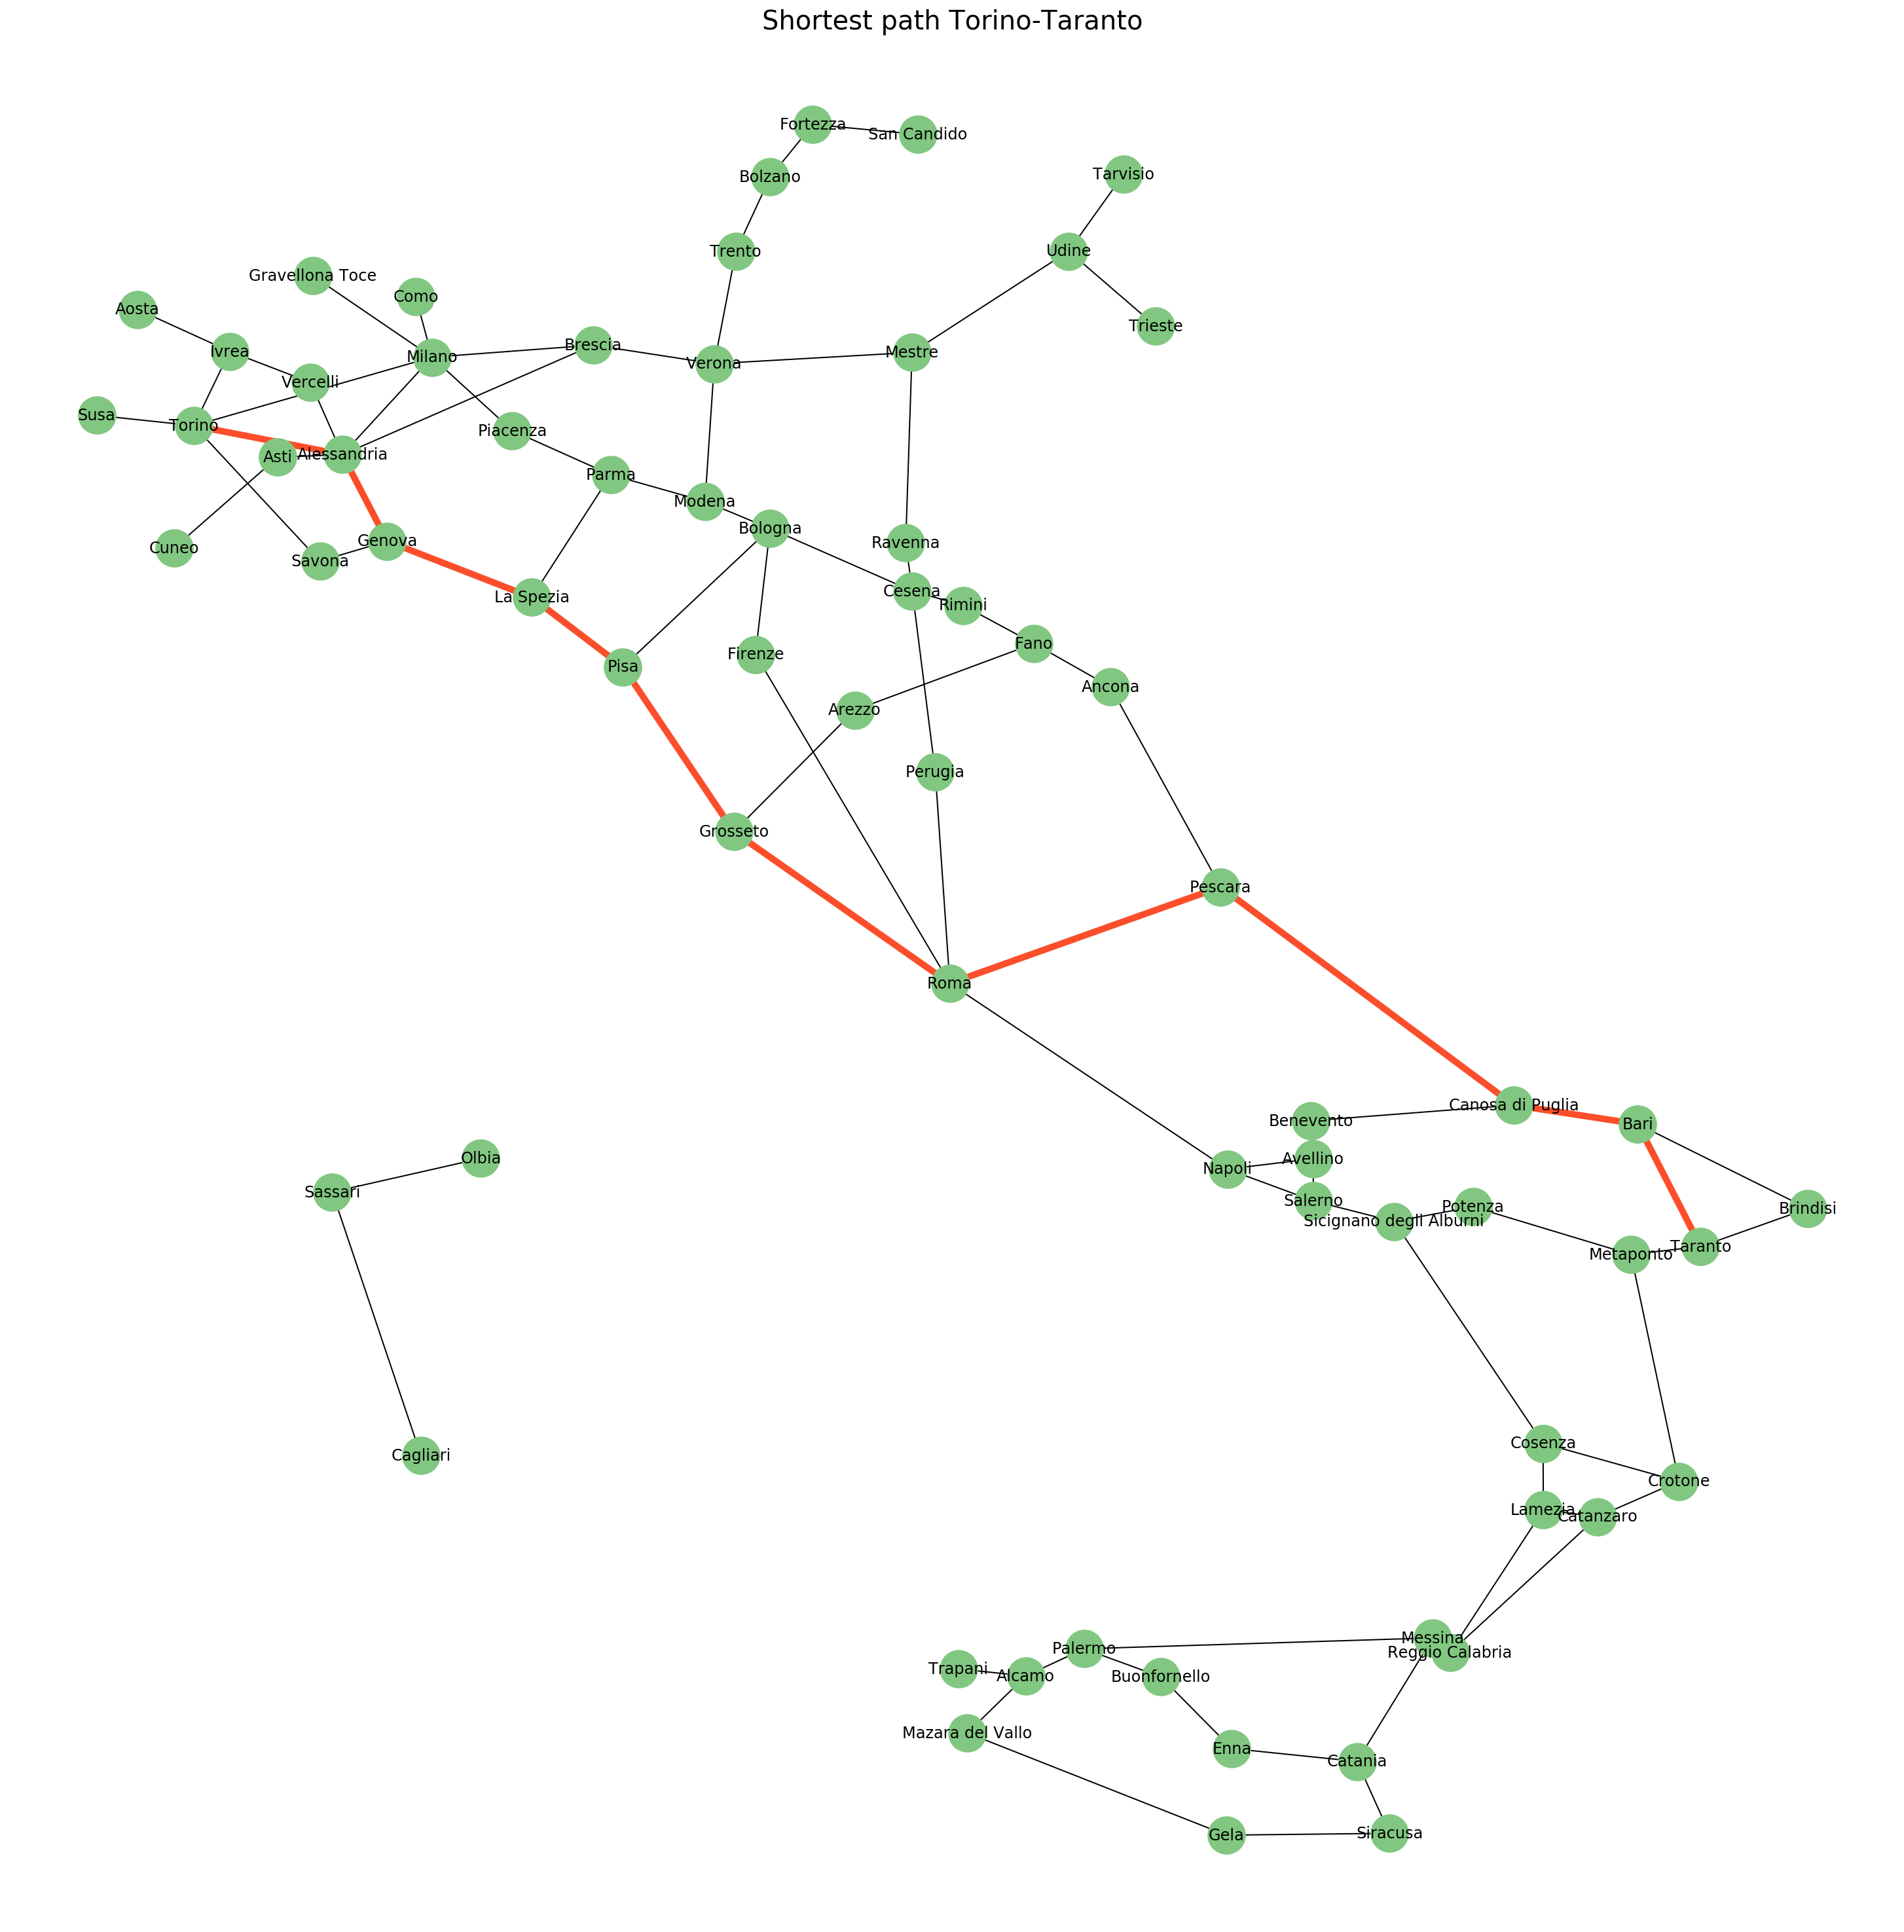

In [46]:
nx.draw(eroadsG, pos=icp.pos(), with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
pathTorinoTaranto1 = nx.shortest_path(eroadsG, 'Torino', 'Taranto')
path_edgesTT1 = list(zip(pathTorinoTaranto1 , pathTorinoTaranto1[1:]))
nx.draw_networkx_edges(eroadsG , pos=pos , edgelist=path_edgesTT1 , edge_color='#fc4e2a',width=5)
plt.title("Shortest path Torino-Taranto" , fontsize=20)
plt.show()

<p>
There could be more than one shortest path connecting two nodes: for example, if we wanted to go from Napoli to Brindisi we will find two shortest paths:
</p>

In [47]:
list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi'))

[['Napoli', 'Roma', 'Pescara', 'Canosa di Puglia', 'Bari', 'Brindisi'],
 ['Napoli', 'Avellino', 'Benevento', 'Canosa di Puglia', 'Bari', 'Brindisi']]

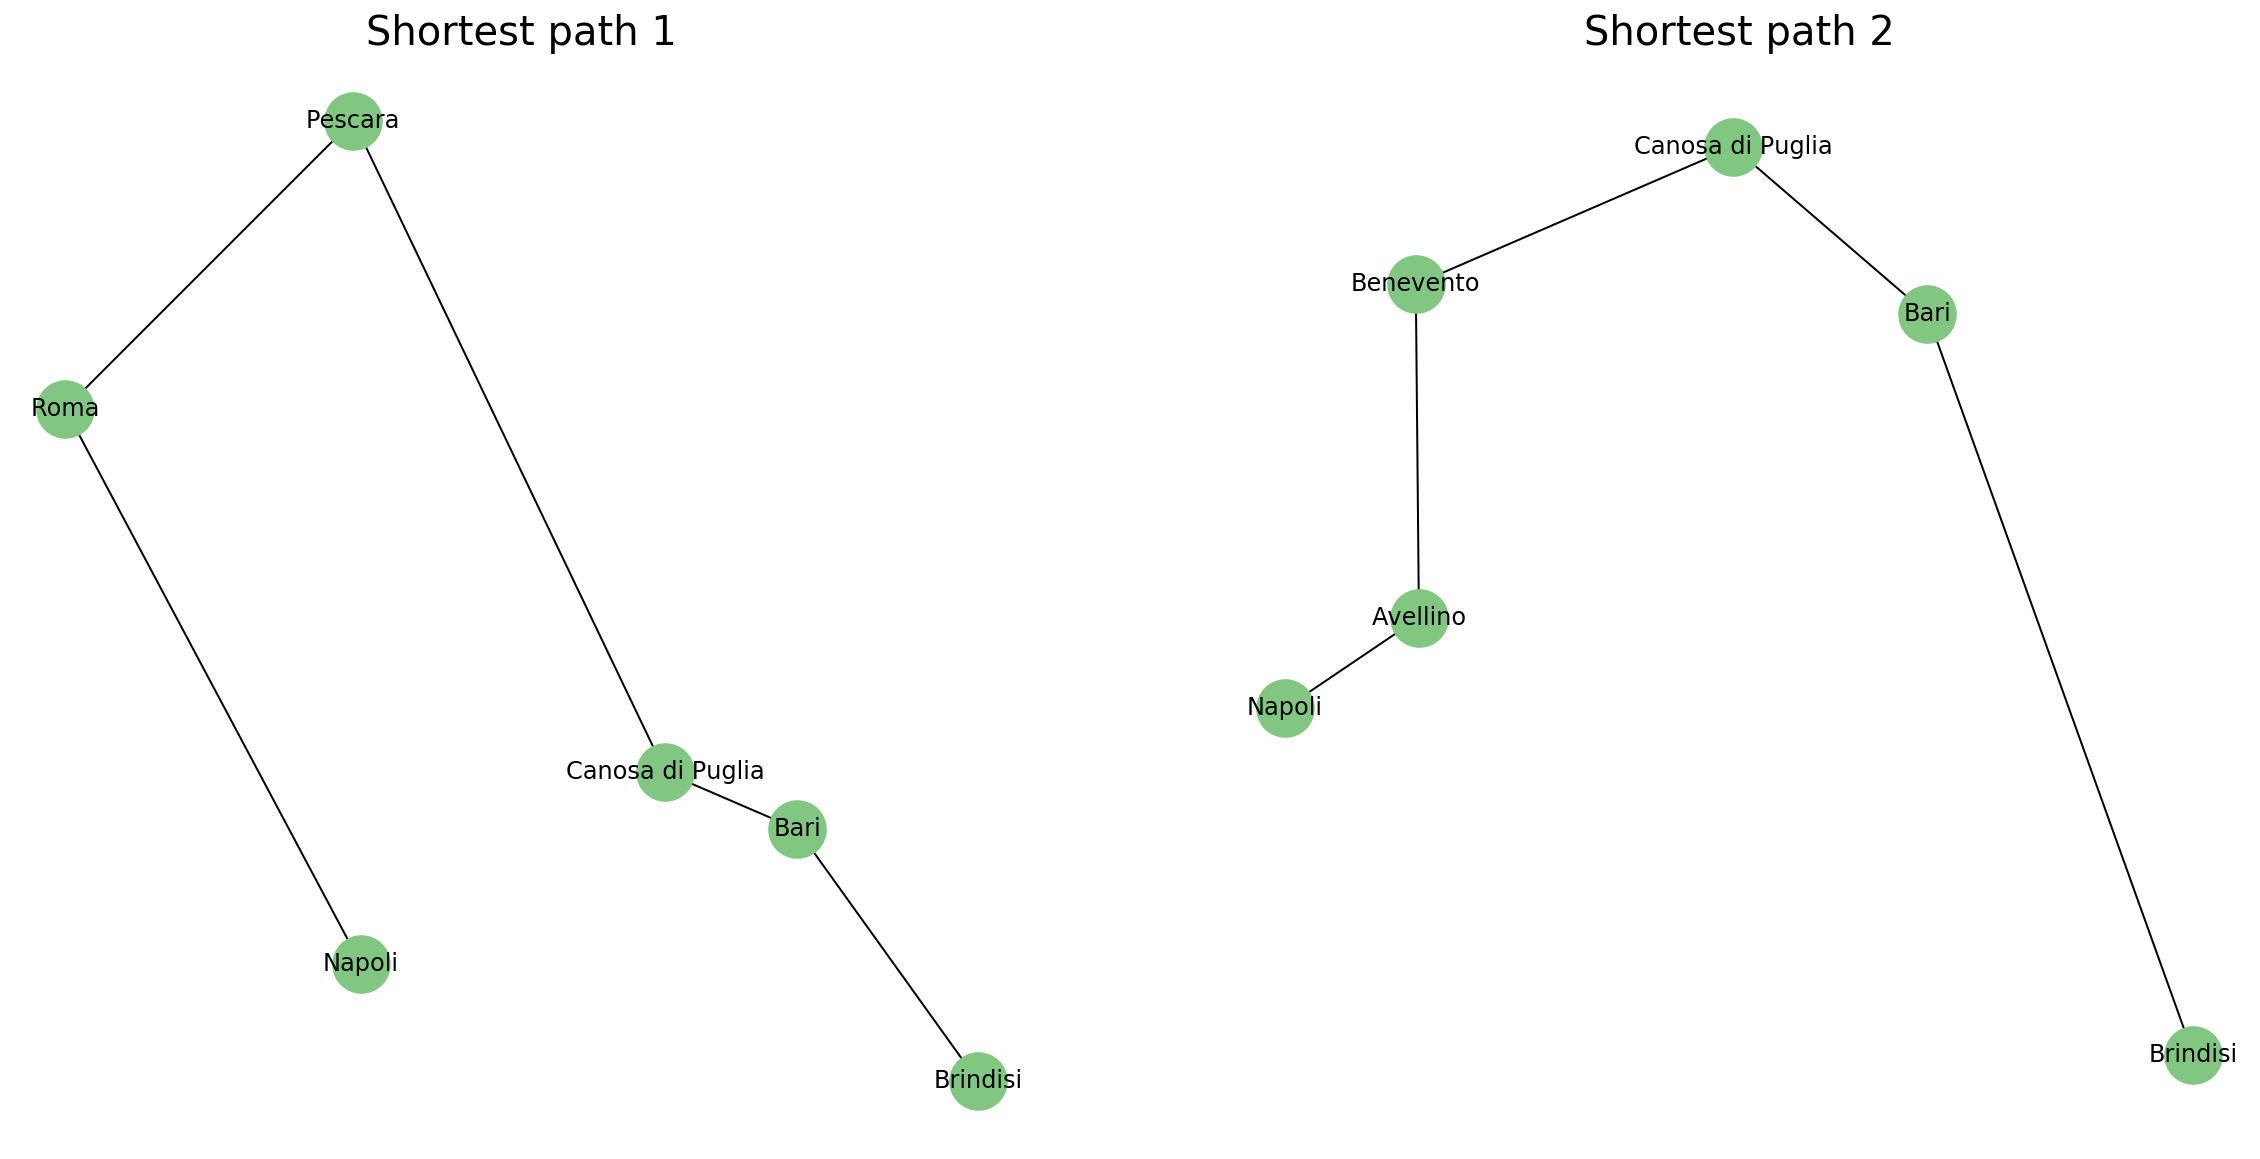

In [48]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
nodessp1 = list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi'))[0]
sp1G = eroadsG.subgraph(nodessp1)
nx.draw(sp1G,  pos=pos, with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
plt.title('Shortest path 1' ,  fontsize=20)

plt.subplot(1, 2, 2)
nodessp2 = list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi'))[1]
sp2G = eroadsG.subgraph(nodessp2)
nx.draw(sp2G,  pos=pos, with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
plt.title('Shortest path 2' ,  fontsize=20)

plt.show()

<p>
Obviously taking the first one would be a bad choice. This can serve as proof that the fewer info is available, the worse the result could be.
</p>
<br>
<p>
Is it possible to get a better result using what we have?
    We have the <b>geographic coordinate of each city</b>, we can use them to measure the <b>distance as the crow flies</b> between them.
This is not completely accurate, since the road could be taking a different path, but is much better than nothing.
</p>
<p>
To do so we will use <code>distance.geodesic(coords_1, coords_2)</code> from the <code>geopy</code> module.
</p>

<i>Setup: <li><a href="https://github.com/geopy/geopy"><b>geopy:</b></a> <code>pip install geopy</code></li><i>

In [78]:
import geopy.distance

def km_between_cities(city1 , city2):
    (lon1 , lat1) = pos[city1]
    (lon2 , lat2) = pos[city2]
    coords_1 = (lat1 , lon1)
    coords_2 = (lat2 , lon2)
    #return round(geopy.distance.vincenty(coords_1, coords_2).km)
    return round(geopy.distance.geodesic(coords_1, coords_2).km)

In [50]:
km_between_cities('Napoli' , 'Roma')

188

In [51]:
# Assign the distance as an edge attribute
for city1 , city2 in eroadsG.edges():
    eroadsG.edges[city1 , city2]["Distance"] = km_between_cities(city1 , city2)

<p>
Now that we have assigned the estimated distance as an attribute to each node, we can reevaluate the shortest path between Torino and Taranto, using <code>nx.shortest_path(G, source, target , weight_attribute)</code>:
</p>

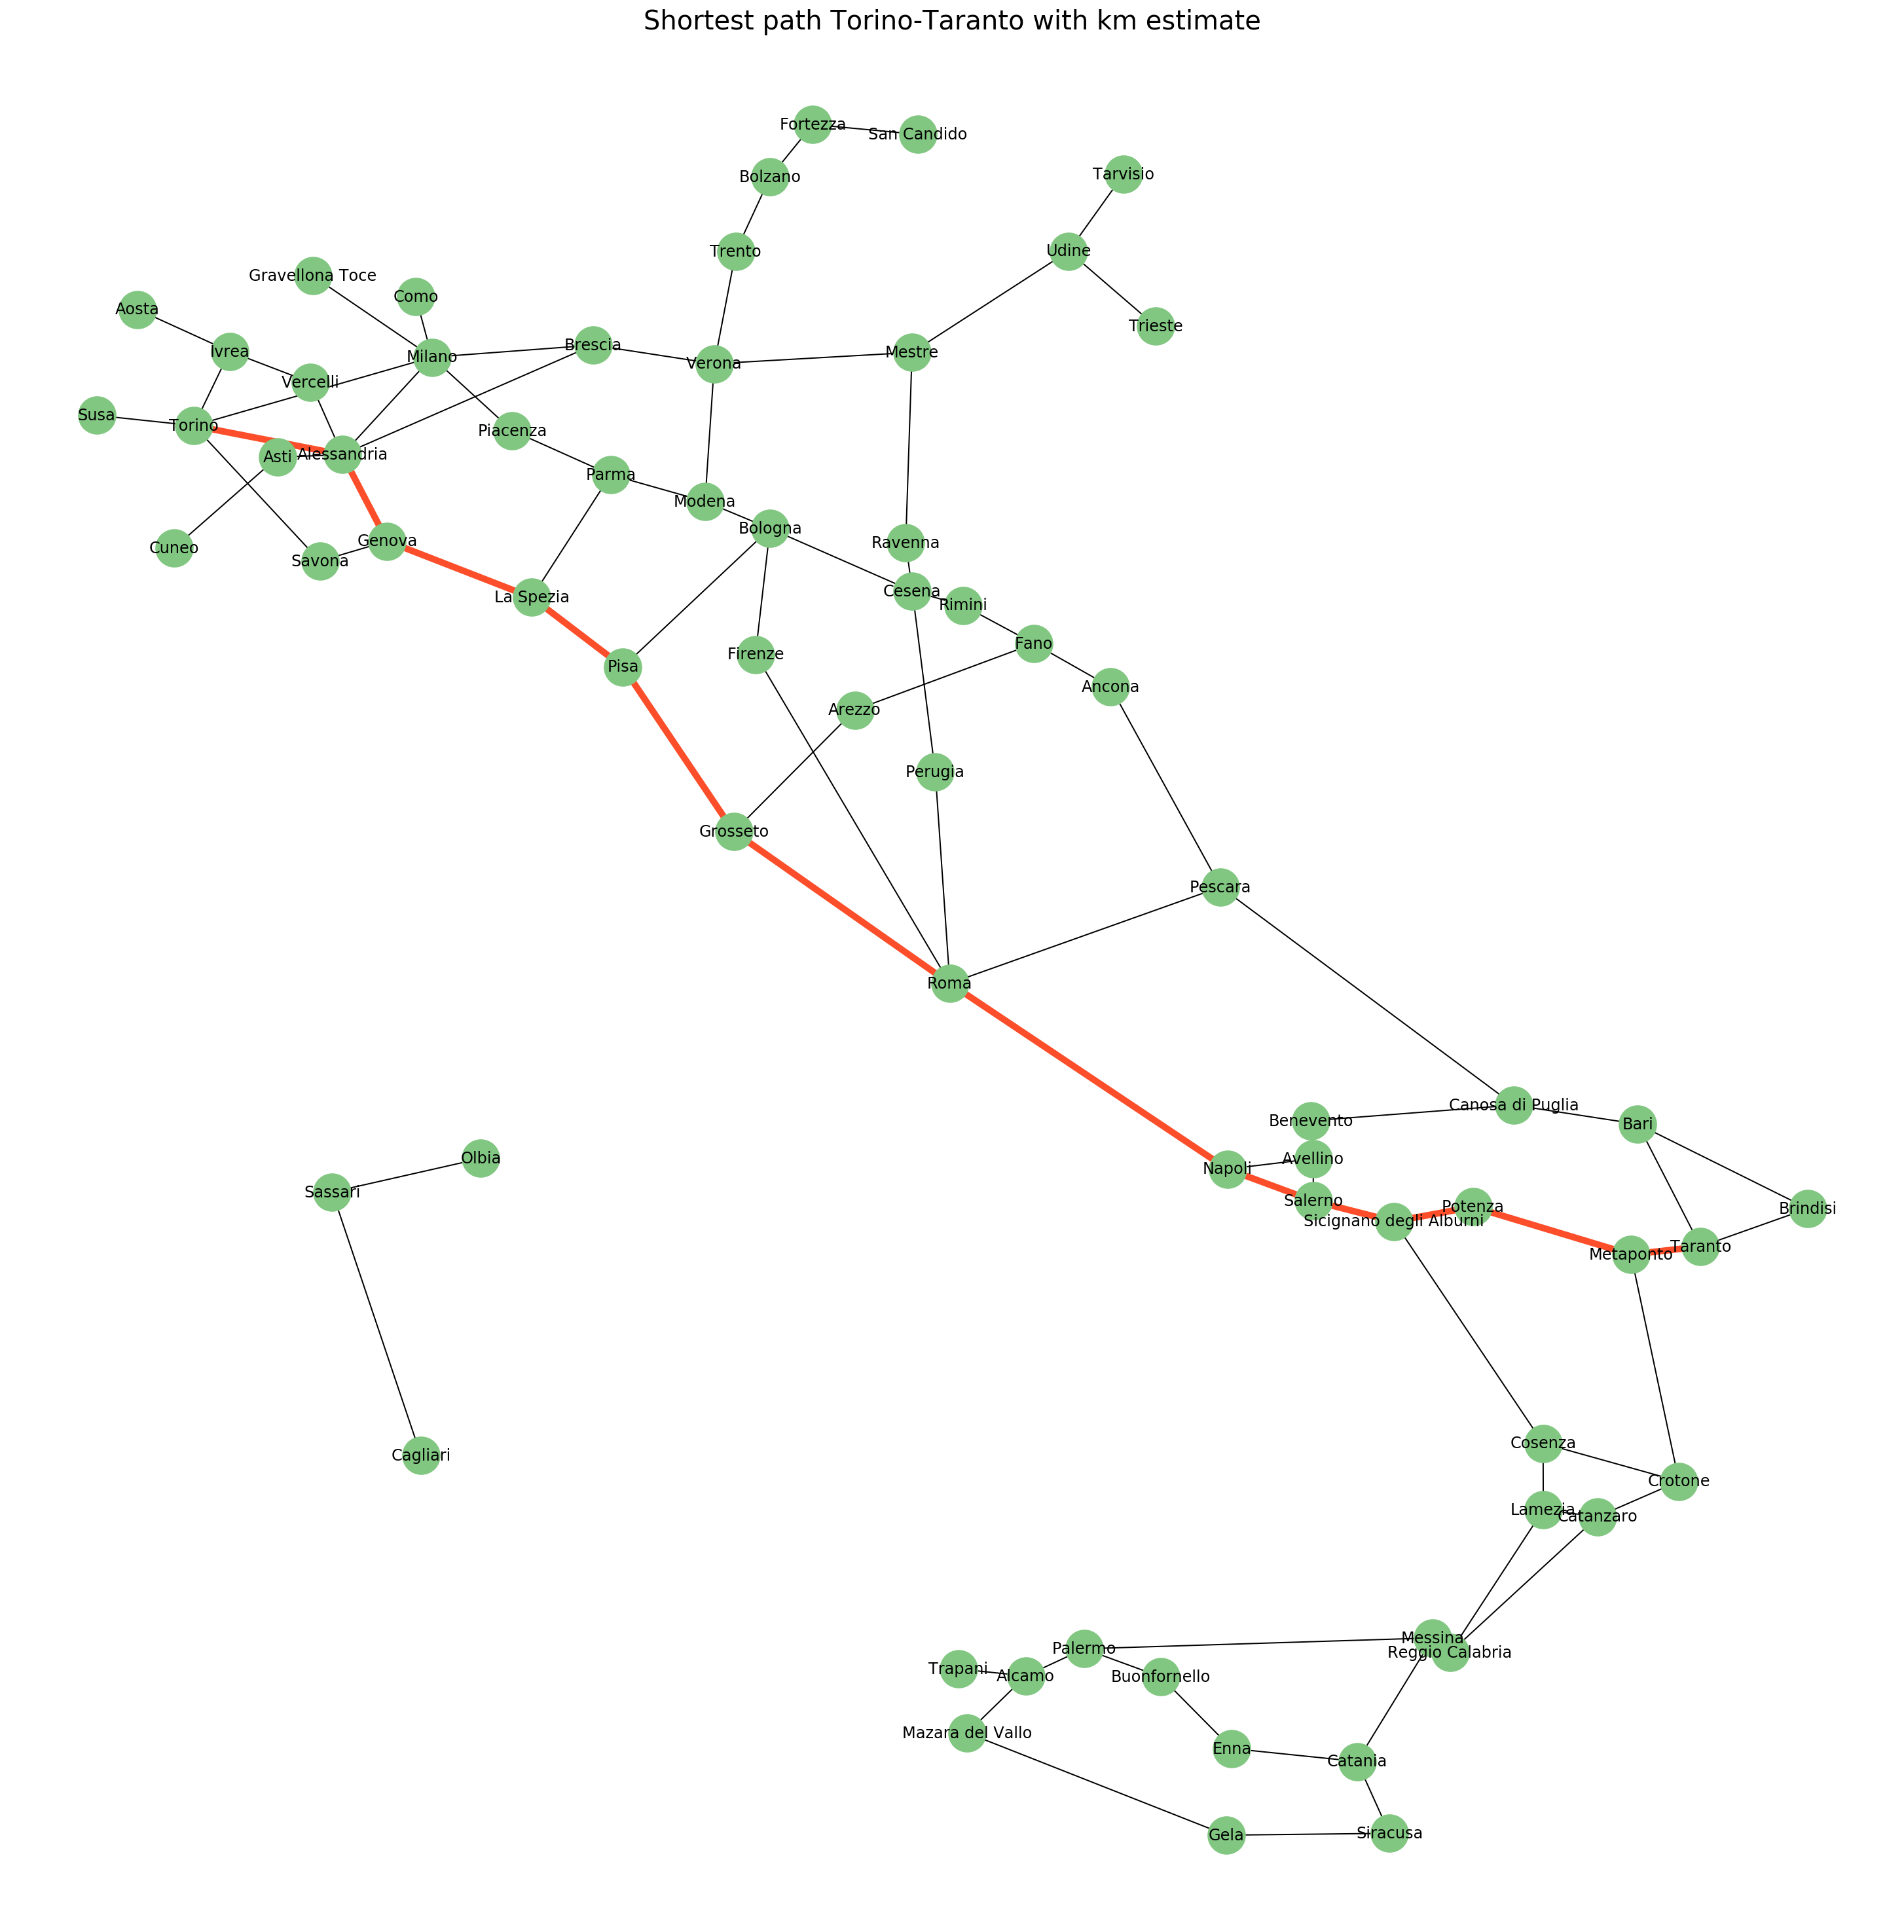

In [52]:
nx.draw(eroadsG, pos=icp.pos(), with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
pathTorinoTaranto2 = nx.shortest_path(eroadsG, 'Torino', 'Taranto' , weight="Distance")
path_edgesTT2 = list(zip(pathTorinoTaranto2 , pathTorinoTaranto2[1:]))
nx.draw_networkx_edges(eroadsG , pos=pos , edgelist=path_edgesTT2 , edge_color='#fc4e2a',width=5)
plt.title("Shortest path Torino-Taranto with km estimate" , fontsize=20)
plt.show()

<p>
The path found now makes more sense, but it's still suboptimal since we don't know the exact road layout, the mean travel time, and many other things.
</p>
<p>
We can use <code>nx.shortest_path_length(graph, source, destination , weight_attribute)</code> to calculate the total length of the path:
</p>

In [53]:
print("The total length of the newly found path is: ")
print(nx.shortest_path_length(eroadsG, 'Torino', 'Taranto' , weight="Distance"))

The total length of the newly found path is: 
1003


<p>
We can use this more precise method to solve the dilemma of the right path to take from Napoli to Brindisi: considering the estimated distance, we find a third path, that makes much more sense than the other two:
</p>

In [54]:
list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi' , weight='Distance'))

[['Napoli',
  'Salerno',
  'Sicignano degli Alburni',
  'Potenza',
  'Metaponto',
  'Taranto',
  'Brindisi']]

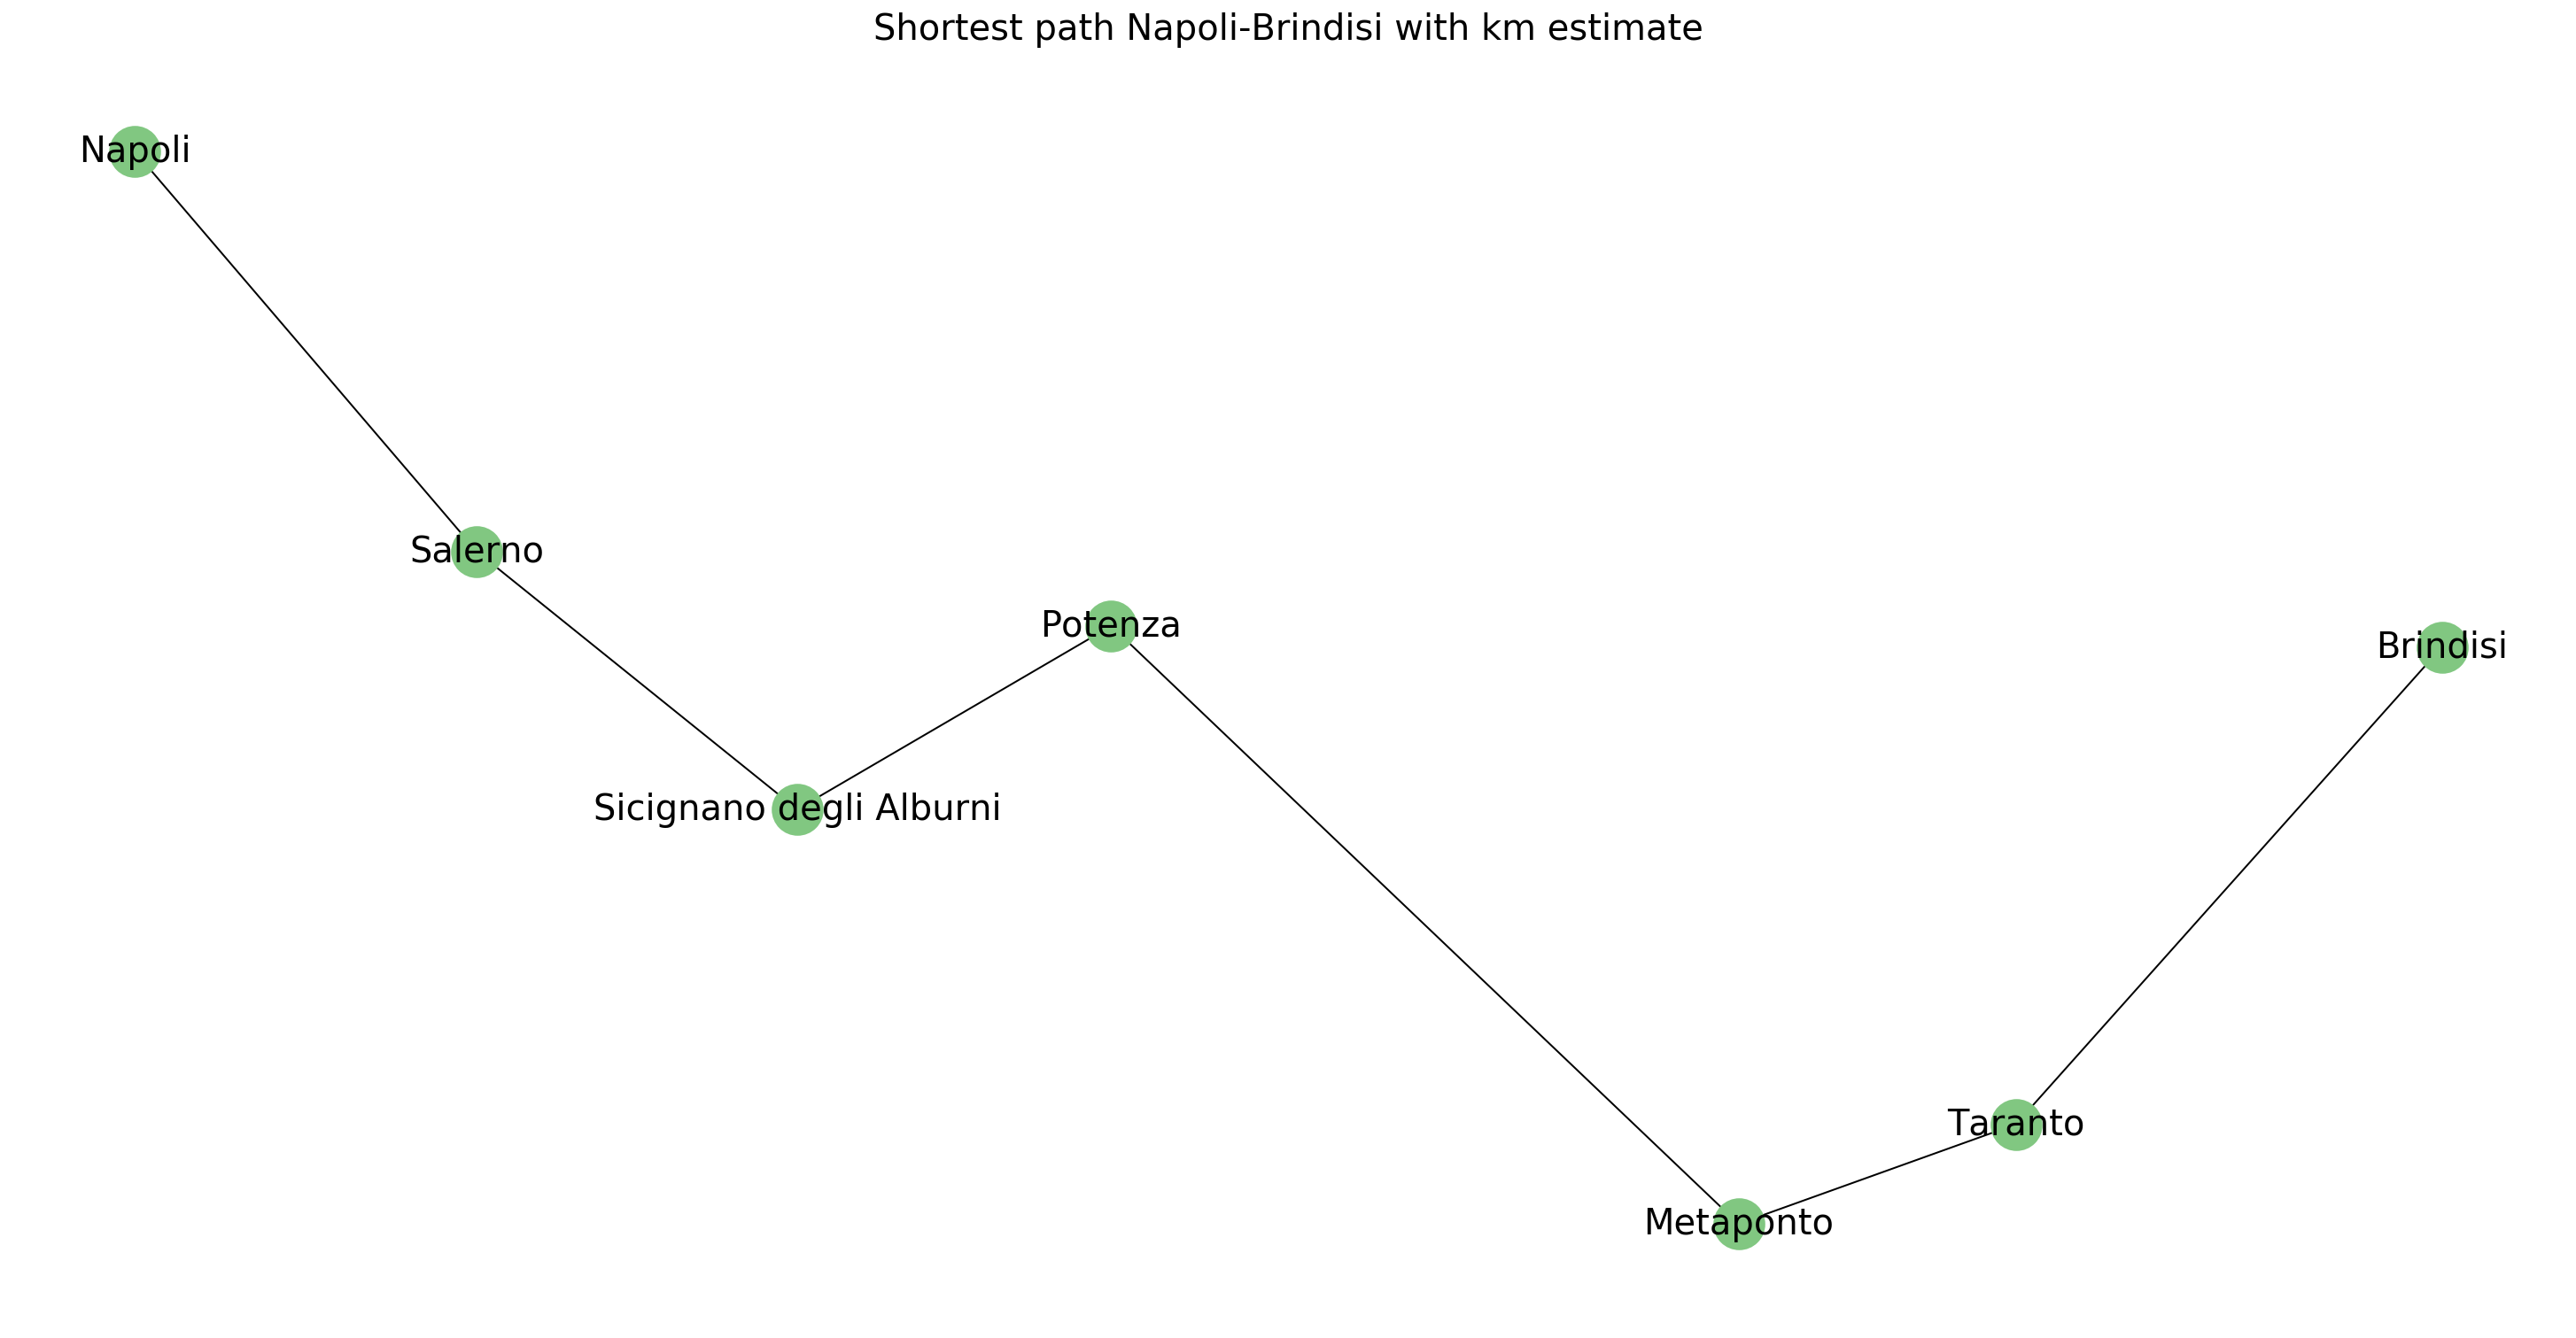

In [55]:
plt.figure(figsize=(20, 10))

nodessp3 = list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi' , weight='Distance'))[0]
sp3G = eroadsG.subgraph(nodessp3)
nx.draw(sp3G,  pos=pos, with_labels=True , node_color='#81c781' , node_size=800 , font_size=20)
plt.title('Shortest path Napoli-Brindisi with km estimate' , fontsize=20)

plt.show()

In [56]:
nx.get_edge_attributes(sp3G,'Distance')

{('Taranto', 'Brindisi'): 63,
 ('Taranto', 'Metaponto'): 38,
 ('Sicignano degli Alburni', 'Salerno'): 45,
 ('Sicignano degli Alburni', 'Potenza'): 44,
 ('Metaponto', 'Potenza'): 90,
 ('Napoli', 'Salerno'): 50}

In [57]:
print("The total length of the path is: ")
print(nx.shortest_path_length(eroadsG, 'Napoli', 'Brindisi' , weight="Distance"))

The total length of the path is: 
330


<p>
Another interesting thing that we can do is compute the <b>average length of the shortest path in a graph</b> (obviously this works only for connected graphs).
We will calculate this length for each of the three connected components that we found earlier:
</p>

In [58]:
print("Italian Peninsula average shortest path length: ")
print (nx.average_shortest_path_length(ccsubgraphseroads[0] , weight="Distance"))

print("Sicily average shortest path length: ")
print(nx.average_shortest_path_length(ccsubgraphseroads[1] , weight="Distance"))

print("Sardinia average shortest path length: ")
print(nx.average_shortest_path_length(ccsubgraphseroads[2] , weight="Distance"))

Italian Peninsula average shortest path length: 
505.82272727272726
Sicily average shortest path length: 
162.77777777777777
Sardinia average shortest path length: 
170.0


<p>
As we could expect, the average length of the shortest path connecting two nodes in the islands is much shorter than the one on the peninsula.
</p>
<br>
<p>
Last but not least, we want to find out which nodes serves as crossroads.
To do so we can use the <b>Betwenness centrality</b>, that considers the number of shortest paths passing through a node, for each city.
</p>

In [59]:
beteroads = nx.betweenness_centrality(eroadsG , weight="Distance")

dataeroads = pd.Series(beteroads).sort_values(ascending=False)[0:10]

print (dataeroads)

Roma                       0.209394
Modena                     0.200395
Bologna                    0.195786
Napoli                     0.188323
Cesena                     0.160667
Salerno                    0.158472
Sicignano degli Alburni    0.144864
Verona                     0.139816
Alessandria                0.138279
Parma                      0.117208
dtype: float64


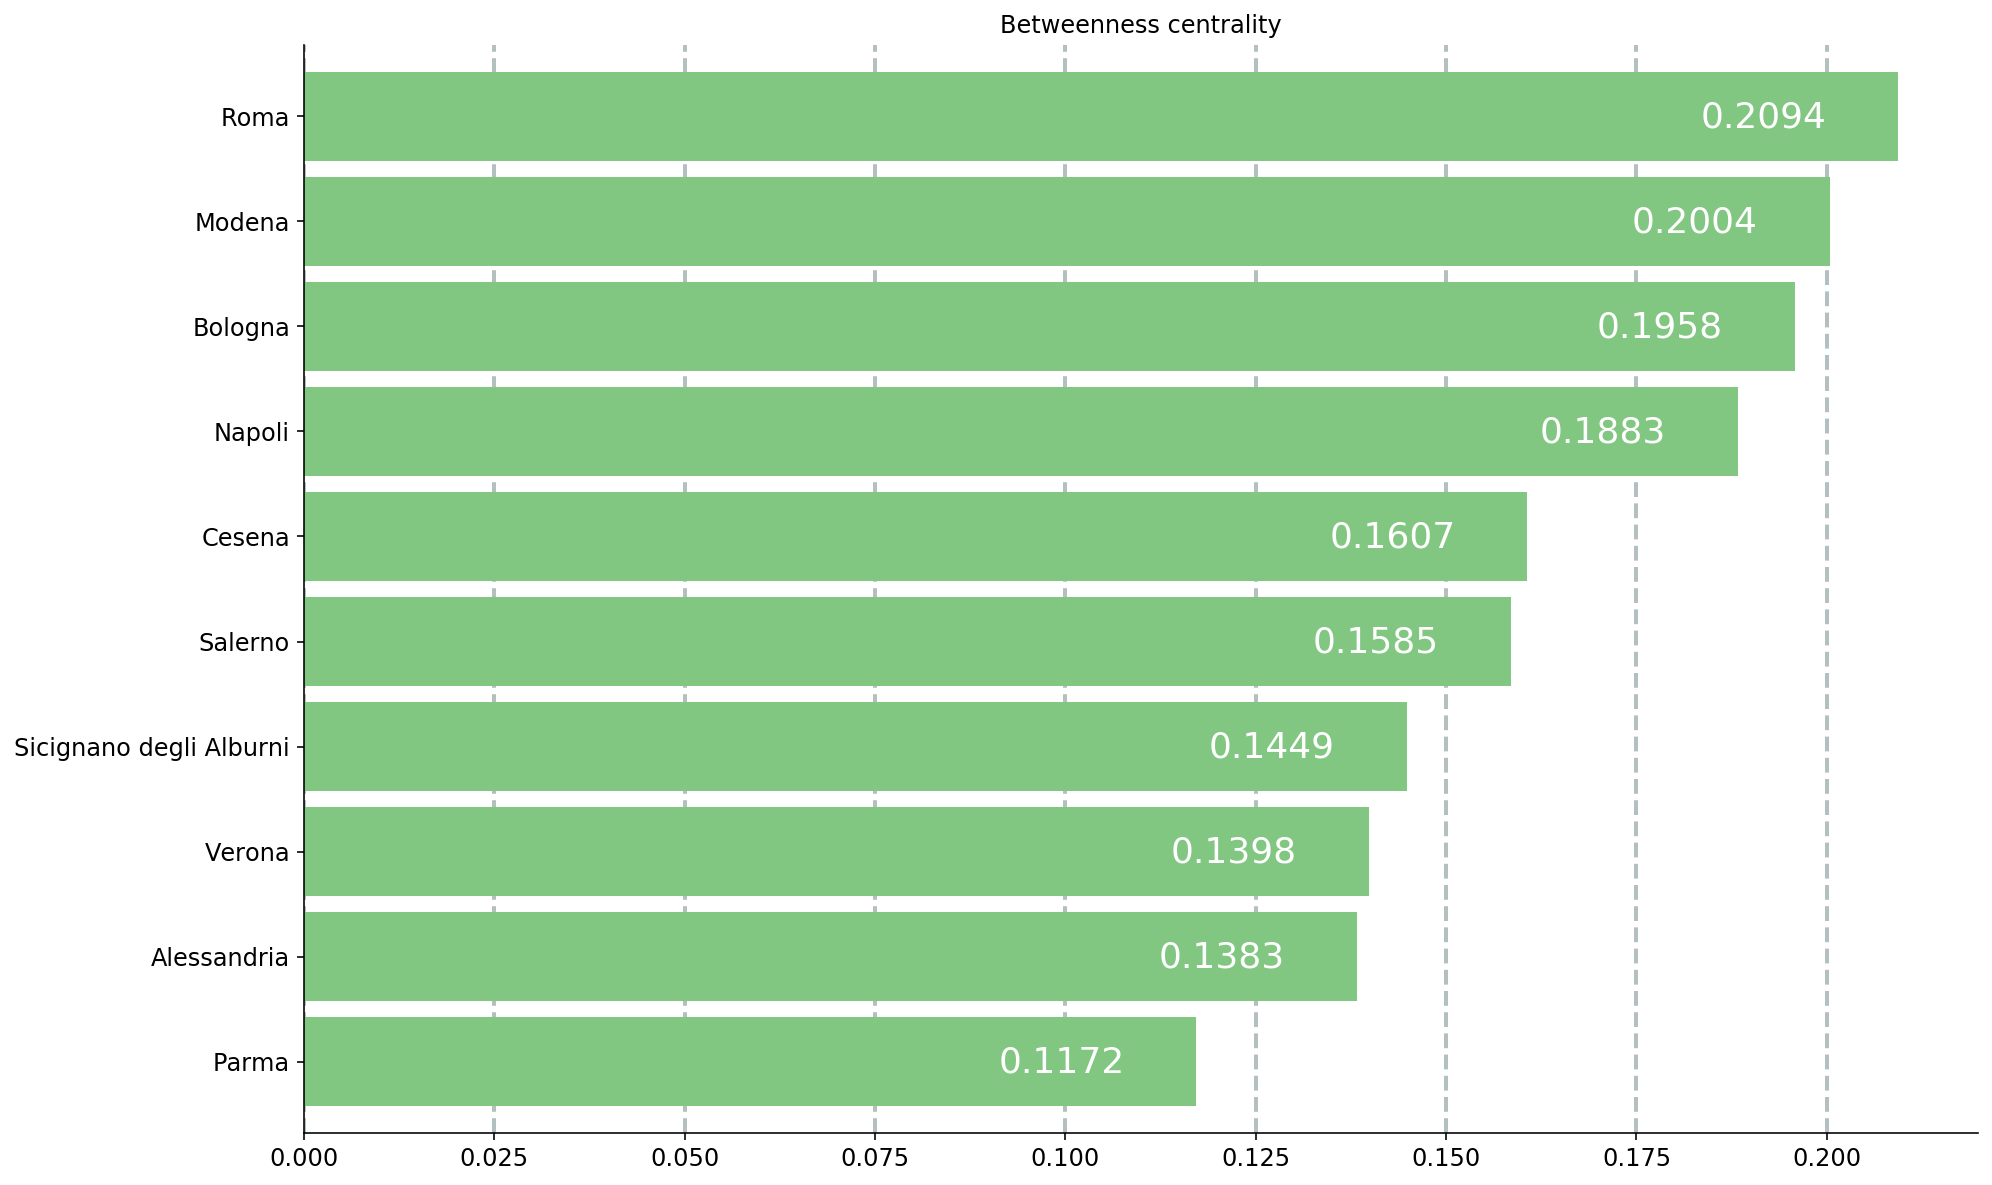

In [60]:
dataeroads = dataeroads.sort_values(ascending=True)

ax = dataeroads.plot(kind='barh', zorder=2, width=0.85, fontsize=12, color='#81c781' , figsize=(15,10) ,
               title="Betweenness centrality")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

counter = 0
for i in ax.patches:
    ax.text(i.get_width() - 0.026 , i.get_y() + 0.32 , round(dataeroads.get(counter) , 4) , fontsize=18,color='white')
    counter += 1

    
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.show()

<p>
Roma is the node with the highest betweenness centrality value (Looks like that is still true that <i>"All roads lead to Rome"</i>.), closely followed by Modena, Bologna and Napoli. All these cities are located on the Autostrada A1, the oldest European Highway and the most important in Italy.
</p>